Bueno vamos por partes:
resulta que Uber Movement ya no tiene disponibles, o ya no facilita tan facil datos de viajes. Es por ello que toco dirigirse-usar lo que hay acá

https://www.kaggle.com/datasets/ishandutta/uber-travel-movement-data-2-billion-trips?select=Travel_Times+-+Washington+DC.csv

In [ ]:
# La librería `kagglehub` es un cliente ligero
#     Un cliente ligero AKA lightweight client, suele significar, en este contexto, un programa o librería que se encarga
#     de hablar con un servicio (por ejemplo, Kaggle), pero que es simple, pequeño y con pocas dependencias. No trae
#     “toda la suite gigante” ni mil funciones extra, solo lo necesario para hacer unas tareas puntuales.
#     Más concreto:
#     * Cliente:
#       Es el “intermediario” que tú usas para comunicarte con otro sistema:
#       - Puede ser una librería (kagglehub hablando con los servidores de Kaggle).
#       - Puede ser un programa (git hablando con GitHub, el CLI de AWS hablando con AWS, etc.).
#     * Ligero porque:
#       - Tiene pocas dependencias (no te mete medio ecosistema nuevo).
#       - Es de código relativamente pequeño y simple.
#       - Hace tareas bien concretas (por ejemplo: descargar datasets/modelos) en lugar de ser un SDK enorme que
#         administre proyectos, usuarios, dashboards, etc.
#       - Normalmente es fácil de instalar (pip install kagglehub) y de usar con 1–2 funciones claves.
#
#     En contraste, un cliente “pesado” podría ser:
#     * Un SDK (Software Development Kit i,e un maletín de herramientas para programadores hecho por alguien que ofrece un
#       servicio o plataforma cuya idea es que, en vez de que tú tengas que hablar a “puro HTTP” con un servicio (armar
#       requests, manejar autenticación, errores, etc.), el SDK te da funciones más amigables) gigante que:
#       - Maneja autenticación compleja.
#       - Administra proyectos, permisos, dashboards, análisis, etc.
#       - Tiene montones de submódulos y necesita más memoria / configuración.
#
#     Conclusion: entonces cuando se dice que “La librería kagglehub es un cliente ligero…”, lo que quise se quiere
#                 usualmente decir es que es una librería chiquita y específica solo para bajar cosas de Kaggle de forma
#                 sencilla, sin todo el peso de la API completa ni configuraciones complicadas.
#
# para descargar datasets y modelos directamente desde Kaggle sin tener que manejar manualmente el API token
#     Recuerde que una API (Application Programming Interface) son los entry points-endpoints y reglas de un software (y
#     por ello,
#     en algun-cierto sentido, lo que un software per se ofrece) para que otros programas o usuarios (usualmente via
#     programas tambien xD) puedan comunicarse-interactuar con él (usarlo).
#
#     Cabe notar que usualmente dicho software que se expone u ofrece va a estar en su versión de
#     despliegue-"lanzado"-producción-lanzamiento de/en producción..... tambien puede estar incluso en etapas anteriores,
#     pero usualmente eso no tiene mucho sentido (antes vuelve vulnerable el proyecto según el caso, pero bueno idk)
#     .... eso sí, lo que sí es usual es que muchas APIs se expongan públicamente después del lanzamiento, es decir,
#     cuando estan en produccion (lanzamiento en produccion).
#
#     En todo caso, luego, se sigue-tenemos que el API token (o token de autenticación) es básicamente una llave digital
#     única que se usa para identificar y autorizar a un usuario, aplicación o servicio que quiere usar una API.
#      - Es como una contraseña temporal (a veces permanente) que te da el derecho de hacer peticiones a una API.
#      - Sirve para controlar el acceso y registrar quién está usando qué.
#      - Ejemplo: si usas la API de OpenAI, te dan un api_key que te permite hacer llamadas al modelo GPT.
#
#     👉 En resumen:
#         Un API token es un identificador único que te autoriza a interactuar con una API de forma segura.
#
# ni las URLs de descarga. Internamente, `kagglehub`:
#   - Se conecta al repositorio de Kaggle correspondiente (en este caso, el dataset público
#     "uber-travel-movement-data-2-billion-trips" subido por el usuario `ishandutta`).
#   - Descarga la última versión disponible del dataset.
#   - Descomprime los archivos (si es necesario) y los deja guardados en una carpeta de caché local (por defecto algo
#     como:
#       ~/.cache/kagglehub/datasets/<usuario>/<dataset>/versions/<n>/ ).
#       o /kaggle/input/uber-travel-movement-data-2-billion-trips
#
#     de modo que la próxima vez que llames dataset_download(...), primero mira esa carpeta (su ruta), y si ya está el
#     dataset, no descarga nada: solo te devuelve el path; y si no está, lo vuelve a bajar y lo guarda ahí. Todo esto
#     es posible precisamente porque se usa una caché local: un espacio de almacenamiento en disco de la máquina donde
#     corre el programa (en este caso, el computador virtual de Colab, no en internet por ej, de alli el "local"),
#     que es pensado para reutilizar datos (tener cosas guardadas para reusar despues) y evitar trabajo repetido
#     (descargas, cómputo, etc.), que está en la misma máquina donde corre el programa (en este caso, el computador
#     virtual de Colab), no en internet. Esa es la gracia de la caché (o el motivo por el cual guardar cosas en la
#     misma): acelerar el acceso a información que se usa muchas veces sin tener que volver a descargarla o recalcularla.
#     Por ejemplo, un navegador guarda imágenes en caché; por eso, cuando abrís una página por segunda vez, carga más
#     rápido porque no toca bajar todos los recursos otra vez. De forma similar, muchos modelos de IA se descargan una
#     sola vez a ~/.cache/... para no tener que bajarlos en cada ejecución (y evitar gastar un montón de tiempo, por
#     ejemplo, en descarga o procesado, sobre todo si son archivos pesados). Eso es exactamente lo que kagglehub hace
#     con los datasets.
#       👉 En resumen el disco normal (los archivos que guardas tú en /content, C:\Users..., etc.) es almacenamiento
#           general, donde guardas lo que quieras sin una semántica especial de “esto es para acelerar cosas”. En cambio,
#           la caché también es almacenamiento (en disco o en RAM), pero con un propósito específico: reusar cosas que
#           se van a necesitar varias veces, permitir acceso más rápido o evitar repetir trabajo costoso. Por eso suele
#           tener estructura y reglas propias, como limpieza o reemplazo de datos.
#           En cuanto al procesado, depende de qué metas en la caché. Si cacheas solo el archivo descargado (como hace
#           kagglehub), te ahorras el tiempo de red al no tener que bajarlo otra vez, pero igual tienes que volver a
#           hacer pd.read_csv(...) cada vez que corres el notebook. En cambio, si decides cachear algo ya procesado
#           —por ejemplo, un DataFrame pre-limpiado guardado en .parquet, un tensor de PyTorch preprocesado o un modelo
#           ya entrenado—, entonces sí te estás ahorrando también tiempo de procesado.
#           La caché literalmente guarda cosas, pero la idea central es que guarda copias de cosas que ya se obtuvieron
#           o calcularon, para tenerlas listas para usar de nuevo más rápido. O sea, no es “otra memoria mágica”, sino
#           un lugar donde se deja algo “ready to go” para no repetir el trabajo costoso, como descargar, descomprimir
#           o calcular. En el caso de kagglehub, la primera vez descarga el dataset desde internet y lo escribe en disco
#           en ~/.cache/..., y la próxima vez simplemente detecta que ya está ahí y te da la ruta sin volver a descargar
#           nada. Ahí la caché está ahorrando tiempo de descarga, no tanto de procesado.
#           Palabras mas palabras menos: la caché es un espacio donde guardamos copias de datos ya obtenidos o calculados
#           para tenerlos listos y evitar volver a descargar o procesar lo mismo una y otra vez.
#   - Devuelve la ruta absoluta a esa carpeta, de modo que luego podamos construir paths completos a los archivos .csv y
#     leerlos con pandas.


# Importamos la librería `kagglehub`
import kagglehub

# Download latest version -(del dataset de Uber Movement desde Kaggle... usamos parte del link para ello):-
path = kagglehub.dataset_download("ishandutta/uber-travel-movement-data-2-billion-trips")  # usamos a
                                                                        # `dataset_download(...)`, que fuerza la descarga
                                                                        # (o reutiliza la caché si ya existe) del dataset
                                                                        # "ishandutta/uber-travel-movement-data-2-
                                                                        #  billion-trips".
                                                                        # La función retorna en `path` la ruta local
                                                                        # donde quedaron todos los archivos del dataset
                                                                        # (por ejemplo, los CSV de tiempos de viaje de
                                                                        # diferentes ciudades).

print("Path to dataset files:", path)  # Imprimimos esa ruta para poder inspeccionarla o usarla después al
                                       # listar archivos y cargar el CSV específico que nos interesa
                                       # ... y en general para verla xD, pues porque igual la usamos via path pues
                                       # ahi queda guardada

100%|██████████| 1.61M/1.61M [00:00<00:00, 54.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ishandutta/uber-travel-movement-data-2-billion-trips/versions/1


In [ ]:
# inspeccionemos que hay dentro de la siguiente manera:
import os

print("Archivos dentro del dataset:")
for fname in os.listdir(path):
    print(" -", fname)

# tambien se puede mirar en "Archivos" en la carpeta con los dos puntos '..' .... pero luego para salir de ahi, idk,
# entonces creemos una copia y pongamoslos al mismo nivel de la carpeta '..' o 'sample_data'

Archivos dentro del dataset:
 - Uber Movement - Travel Times Methodology.pdf
 - Travel_Times - Boston.csv
 - Travel_Times - Washington DC.csv
 - Travel_Times - Paris.csv
 - Travel_Times - Manila.csv
 - Travel_Times - Bogota.csv
 - Travel_Times - Sydney.csv
 - datapackage.json
 - Travel_Times - Johannesburg and Pretoria.csv


In [ ]:
#------------Creacion de Copia------------

# Crear la carpeta destino (si no existe)
!mkdir -p /content/uber-travel-movement-data-2-billion-trips

# Copiar TODO lo que descargó kagglehub a esa carpeta
!cp -r "$path"/* /content/uber-travel-movement-data-2-billion-trips/


# **Verificacion de datos**



So far, ya tenemos los datos, entonces estamos ready to verificar en primera instancia en relacion con el paper, lo vamos a medio explorar-mirar para verificar cosas con el paper, y ya una vez confiramdo que tenemos y que no, pasaremos a mirar el de bogota para asi ver que tiene ese vs el que tenemos aca de Washington DC y asi empezar hacer el analisis descriptivo de este, ya despues.

## **Washington DC**

In [ ]:
import pandas as pd
import os

base = "/content/uber-travel-movement-data-2-billion-trips"
dc_path = os.path.join(base, "Travel_Times - Washington DC.csv")  # o el nombre exacto que veas

df_dc = pd.read_csv(dc_path)
df_dc

,Origin Movement ID,Origin Display Name,Origin Geometry,Destination Movement ID,Destination Display Name,Destination Geometry,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",1,"5400 Arnold Avenue Southwest, Southwest Washin...","[[-77.048009,38.841266],[-77.047969,38.841267]...","07/31/2016 - 08/28/2016, Every day, Daily Average",830,563,1221
1,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",2,"1400 Juniper Street Northwest, Northwest Washi...","[[-77.051623,38.987145],[-77.051769,38.987244]...","07/31/2016 - 08/28/2016, Every day, Daily Average",1660,1313,2097
2,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",3,"4800 Canal Road Northwest, Northwest Washingto...","[[-77.119751,38.93435],[-77.118861,38.935356],...","07/31/2016 - 08/28/2016, Every day, Daily Average",1296,974,1724
3,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",4,"2700 Unicorn Lane Northwest, Northwest Washing...","[[-77.071647,38.971786],[-77.07125,38.972087],...","07/31/2016 - 08/28/2016, Every day, Daily Average",1694,1331,2154
4,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",5,"4500 Q Place Northwest, Northwest Washington, ...","[[-77.100859,38.911209],[-77.099577,38.911988]...","07/31/2016 - 08/28/2016, Every day, Daily Average",1082,776,1507
...,...,...,...,...,...,...,...,...,...,...
545,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",554,"1300 North Beauregard Street, Alexandria West,...","[[-77.131607,38.82535],[-77.131284,38.825514],...","07/31/2016 - 08/28/2016, Every day, Daily Average",873,631,1206
546,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",555,"5900 Atteentee Road, Springfield","[[-77.218782,38.792764],[-77.218725,38.792767]...","07/31/2016 - 08/28/2016, Every day, Daily Average",1328,1031,1709
547,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",556,"7800 Montvale Way, McLean","[[-77.233023,38.934171],[-77.232986,38.934439]...","07/31/2016 - 08/28/2016, Every day, Daily Average",1547,1193,2005
548,186,"20001, Northwest Washington, Washington","[[-77.033645,38.897345],[-77.033644,38.898314]...",557,"8400 Fenwood Drive, West Springfield","[[-77.241731,38.789962],[-77.241124,38.790403]...","07/31/2016 - 08/28/2016, Every day, Daily Average",1427,1105,1841


In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Origin Movement ID                         550 non-null    int64 
 1   Origin Display Name                        550 non-null    object
 2   Origin Geometry                            550 non-null    object
 3   Destination Movement ID                    550 non-null    int64 
 4   Destination Display Name                   550 non-null    object
 5   Destination Geometry                       550 non-null    object
 6   Date Range                                 550 non-null    object
 7   Mean Travel Time (Seconds)                 550 non-null    int64 
 8   Range - Lower Bound Travel Time (Seconds)  550 non-null    int64 
 9   Range - Upper Bound Travel Time (Seconds)  550 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 4

In [ ]:
df_dc.describe()

,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
count,550.0,550.000000,550.000000,550.000000,550.000000
mean,186.0,279.070909,1292.481818,960.096364,1744.727273
std,0.0,161.962679,410.921492,336.307377,506.137679
min,186.0,1.000000,212.000000,83.000000,444.000000
25%,186.0,138.250000,1016.250000,723.000000,1408.750000
50%,186.0,279.500000,1316.500000,979.500000,1756.500000
75%,186.0,419.750000,1563.750000,1197.000000,2097.750000
max,186.0,558.000000,2390.000000,1798.000000,3303.000000


In [ ]:
# ¿Cuántos orígenes distintos hay realmente?
df_dc["Origin Movement ID"].nunique(), df_dc["Origin Movement ID"].unique()[:10]

(1, array([186]))

In [ ]:
# ¿Cuántos destinos hay y algunos ejemplos?
df_dc["Destination Movement ID"].nunique(), df_dc["Destination Movement ID"].head()

(550,
 0    1
 1    2
 2    3
 3    4
 4    5
 Name: Destination Movement ID, dtype: int64)

* Primer punto a favor: en el paper dicen que manejan un solo origen y varios puntos de destino, aca vemos que esta pasando lo mismo. Y no solo eso, vemos que lo que recuperamos en el kaggle con lo que dice en el paper esta bien, porque en el paper dijeron "The travel was started from the city center. The ID of the city center census tract is 186." y pille que aca ese el dato y unico dato del primer campo "Origin Movement ID" para todos sus registros..... tambien note que la direccion ZIP 20001 Northwest Washington, Washington esta bien, porque literalmente esa direccion es-corresponde a una zona central de Washington DC (cubre barrios como Shaw, Chinatown, Mount Vernon Triangle, Bloomingdale, etc., todos en el NW central). Entonces por ese lado, todo right

* Punto negativo: pille las fechas DDDDDD: .............. en el paper esa gente abarca varios años creo, como lo son 2017 y 2018 (ni idea si cogieron de 2016 xD que es lo que solo tenemos parece ser) vamos a verificar:

In [ ]:
df_dc['Date Range'].value_counts()

,count
Date Range,
"07/31/2016 - 08/28/2016, Every day, Daily Average",550


si manito, bueno, ahi en ese detalle estamos pailas, pero bueno, ahi vemos que hacemos

## **Bogota**

## **DataSet basico i,e lo mero mero del Kaggle i,e aun no incluimos datos-campos de clima o densidad de vias o disponibilidad de railways/subways o la distancia entre origen e inicio per se**

In [ ]:
import pandas as pd
import os

base = "/content/uber-travel-movement-data-2-billion-trips"
bogota_path = os.path.join(base, "Travel_Times - Bogota.csv")  # o el nombre exacto que veas

df_bogota = pd.read_csv(bogota_path)
df_bogota

,Origin Movement ID,Origin Display Name,Origin Geometry,Destination Movement ID,Destination Display Name,Destination Geometry,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",4,"PALO BLANCO, 005501 (4)","[[-74.093533,4.681014],[-74.094808,4.682092],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",2296,1639,3215
1,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",6,"BANCO CENTRAL, 007208 (6)","[[-74.071786,4.642472],[-74.071543,4.64383],[-...","07/30/2016 - 08/27/2016, Every day, Daily Average",1619,1057,2478
2,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",8,"LA ESTANZUELA, 004104 (8)","[[-74.091623,4.597399],[-74.091398,4.598253],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",159,75,334
3,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",9,"LAS NIEVES, 003102 (9)","[[-74.073802,4.60692],[-74.073202,4.60801],[-7...","07/30/2016 - 08/27/2016, Every day, Daily Average",754,423,1342
4,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",11,"BARCELONA SUR, 001424 (11)","[[-74.102284,4.567164],[-74.102104,4.566895],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",738,506,1076
...,...,...,...,...,...,...,...,...,...,...
491,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",1155,"NORMANDIA OCCIDENTAL, 005606 (1155)","[[-74.109049,4.679112],[-74.108997,4.679065],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",1664,1109,2494
492,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",1156,"LA SERENA, 005613 (1156)","[[-74.093294,4.711442],[-74.093285,4.711427],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",2531,1817,3524
493,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",1157,"LA GRANJA, 005610 (1157)","[[-74.097758,4.700558],[-74.097577,4.700411],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",2363,1592,3506
494,183,"SANTA INES, 003107 (183)","[[-74.081141,4.595074],[-74.081746,4.595449],[...",1158,"NIZA SUBA, 009112 (1158)","[[-74.083592,4.717013],[-74.083147,4.716918],[...","07/30/2016 - 08/27/2016, Every day, Daily Average",2871,1909,4317


In [ ]:
df_bogota.describe()

,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
count,496.0,496.000000,496.000000,496.000000,496.000000
mean,183.0,582.298387,1524.314516,1011.830645,2310.622984
std,0.0,342.048652,658.931282,472.870700,934.892663
min,183.0,4.000000,91.000000,34.000000,241.000000
25%,183.0,289.750000,1010.000000,643.000000,1562.750000
50%,183.0,584.500000,1509.000000,982.500000,2311.000000
75%,183.0,892.500000,2029.500000,1363.250000,3029.000000
max,183.0,1160.000000,3361.000000,2327.000000,4853.000000


In [ ]:
df_bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Origin Movement ID                         496 non-null    int64 
 1   Origin Display Name                        496 non-null    object
 2   Origin Geometry                            496 non-null    object
 3   Destination Movement ID                    496 non-null    int64 
 4   Destination Display Name                   496 non-null    object
 5   Destination Geometry                       496 non-null    object
 6   Date Range                                 496 non-null    object
 7   Mean Travel Time (Seconds)                 496 non-null    int64 
 8   Range - Lower Bound Travel Time (Seconds)  496 non-null    int64 
 9   Range - Upper Bound Travel Time (Seconds)  496 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 3

In [ ]:
( df_bogota["Destination Movement ID"] == 183 ).any()

np.False_

Básicamente esto nos dice:

* Misma estructura que Washington DC:
    - 10 columnas, mismos nombres.
    - Origin Movement ID constante = 183.
    - Origin Display Name = "SANTA INES, 003107 (183)" → barrio céntrico del centro-centro de Bogotá, súper razonable como “city center”.
    - Date Range = 07/30/2016 - 08/27/2016, Every day, Daily Average para todas las filas.
    - 496 filas → un origen (183) → 496 destinos.

* Los stats (describe) confirman:
    - Origin Movement ID siempre 183.
    - Destination Movement ID va de 4 a 1160.
    - Mean Travel Time (Seconds) ~ 1500 s de media (25 min aprox), con mínimo 91 s y máximo 3361 s.
    - Lower/upper bound dan el rango habitual de tiempos.


**Cabe notar que:**
- El Movement ID es el ID asociado a un Census Tract, note entonces que tenemos Origin's Movement ID y unos Destination's Movement ID
- Ahora bien, el Display Name es el nombre del- de los Census Tract's, de modo que al igual que los ID's, tendremos Display Name's de los origines (Origin Display Name) y los
Display Name's de los destinos (Destination Display Name)
- Por utlimo esta la Geometry, que en realidad son unos Geometry Polygons (poligonos de la geometria), los cuales son los nodos que se especifican en los-el borde-limite de un Census Tract-Census Zone particular-dado. De modo, que al igual que los ID's y los Display Name's, tendremos Geometry's de los origines (Origin Geometry) y Geometry's de los destinos (Destination Geometry)

Ya el resto de campos no los explico porque los considero lo suficentemente calros per se y previamente explicados, simplmente tenga en mente que ese promedio y sus cotas son los nomales (no los geometricos i,e no hay nada raro o extra destras, lo geometrico creo que viene luego i,e lo hacemos nosotros)

Bueno, el caso, es que al seguir leyendo, me encontre con esto

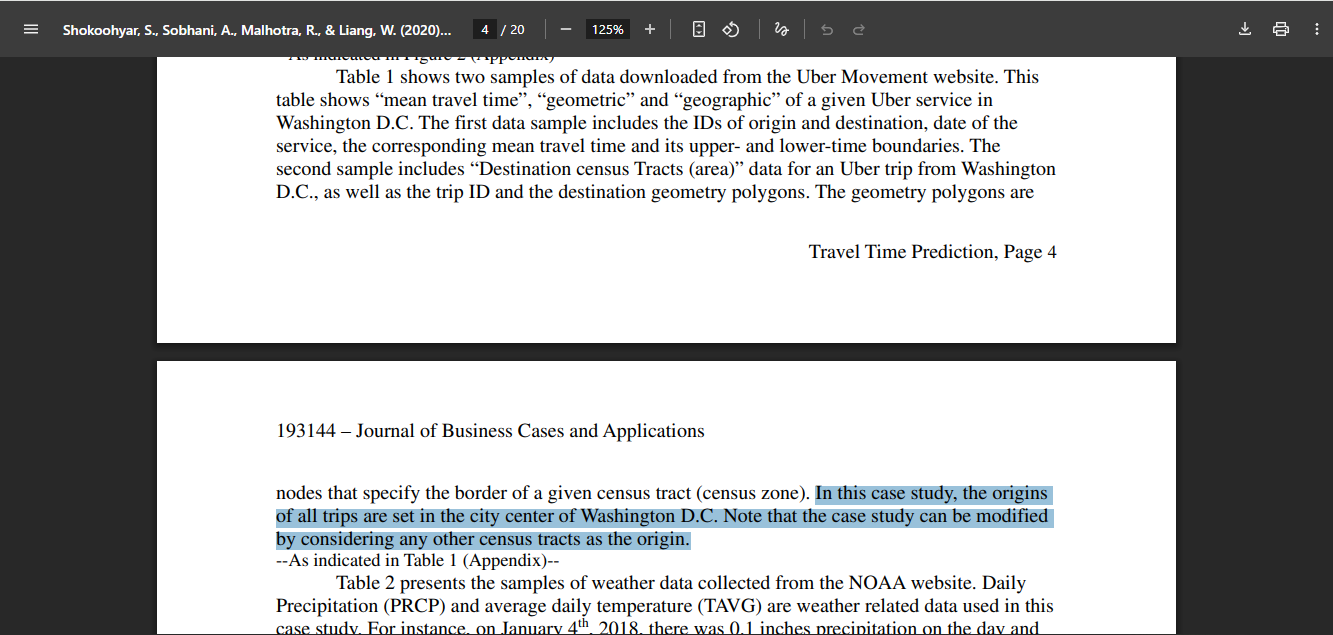

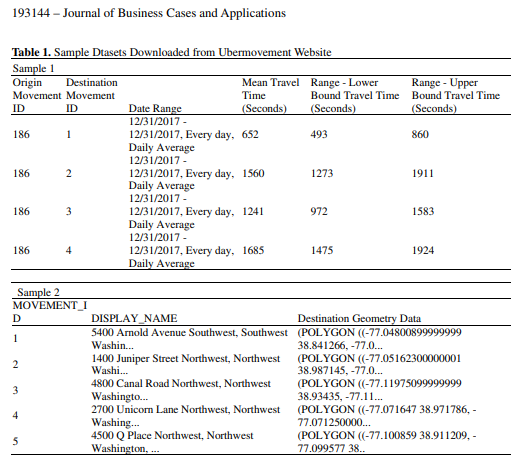

lo que quiere decir, que lo que encontramos en Kaggle esta incluso eso armado, i,e yo entiendo que esos datos vienen por separado, segun como lo comentan en el paper, pero nosotros, partimos con esas cosas nopor separado, sino que todo esta en el .csv ........... es por ello, que porpongo revizar que si este bien armado i,e que para cada ID se relacione el mismo display name y la misma geometry i,e note que para un ID hay un unico de esos dos, entonces revisemos que en efecto asi este en la tabla

In [ ]:
#Note lo siguiente
by_oid = df_bogota.groupby("Origin Movement ID")
by_oid["Destination Movement ID"].unique()

,Destination Movement ID
Origin Movement ID,
183,"[4, 6, 8, 9, 11, 12, 13, 14, 23, 29, 33, 35, 3..."


In [ ]:
by_oid["Destination Movement ID"].unique().explode()

,Destination Movement ID
Origin Movement ID,
183,4
183,6
183,8
183,9
183,11
...,...
183,1155
183,1156
183,1157


In [ ]:
#Por ello, partamos con los datos de orgine y considere:
by_oid = df_bogota.groupby("Origin Movement ID")
by_oid["Origin Display Name"].unique().explode()

,Origin Display Name
Origin Movement ID,
183,"SANTA INES, 003107 (183)"


In [ ]:
by_oid["Origin Geometry"].unique().explode()

,Origin Geometry
Origin Movement ID,
183,"[[-74.081141,4.595074],[-74.081746,4.595449],[..."


In [ ]:
#ahora miremos los de destino:
by_did = df_bogota.groupby("Destination Movement ID")
by_did

In [ ]:
# ver la lista (única) de nombres/geom por ID
by_did["Destination Display Name"].unique().explode()

,Destination Display Name
Destination Movement ID,
4,"PALO BLANCO, 005501 (4)"
6,"BANCO CENTRAL, 007208 (6)"
8,"LA ESTANZUELA, 004104 (8)"
9,"LAS NIEVES, 003102 (9)"
11,"BARCELONA SUR, 001424 (11)"
...,...
1155,"NORMANDIA OCCIDENTAL, 005606 (1155)"
1156,"LA SERENA, 005613 (1156)"
1157,"LA GRANJA, 005610 (1157)"


In [ ]:
by_did["Destination Geometry"].unique().explode()

,Destination Geometry
Destination Movement ID,
4,"[[-74.093533,4.681014],[-74.094808,4.682092],[..."
6,"[[-74.071786,4.642472],[-74.071543,4.64383],[-..."
8,"[[-74.091623,4.597399],[-74.091398,4.598253],[..."
9,"[[-74.073802,4.60692],[-74.073202,4.60801],[-7..."
11,"[[-74.102284,4.567164],[-74.102104,4.566895],[..."
...,...
1155,"[[-74.109049,4.679112],[-74.108997,4.679065],[..."
1156,"[[-74.093294,4.711442],[-74.093285,4.711427],[..."
1157,"[[-74.097758,4.700558],[-74.097577,4.700411],[..."


In [ ]:
#Bueno, entonces todo parecio haber salido bien, igual en orden de ser rigurosos, tenemos que mirar cosa por cosa
# para ver que no solo se cumpla en lo que se ve-en lo impreso i,e
# chequeo duro: ¿todos los IDs tienen 1 nombre y 1 geometría?
ok_name = (by_did["Destination Display Name"].nunique() == 1).all()   # note que by_did["Destination Display Name"].nunique() == 1 devuleve un Data Frame GroupBy
                                                                      #  booleano y el .all() verifica si todos los valores son True dentro de ese DFGB
                                                                      #  aaaahhhh bueno, y ese ,nunique() cuenta cuantos valores unicos hay (a diferencia de
                                                                      #  .unique() que solo los devuelve). De modo que al aplicarlo sobre un campo normal
                                                                      #  cuenta el numero de valores unicos en el campo-columna, pero cuando se aplica
                                                                      #  despues de agripar, devuelve el numero de valores unicos que hay en el campo-columna,
                                                                      #  pero por grupo (i,e hace lo mismo, pero lo hace por cada grupo.... como en general
                                                                      #  tambien actua cualquier otra operacion sobre algo, un DF, agrupado como lo hace
                                                                      #  pues por ejm count o mean o etc i,e es comosi el GB volviera un DF en mini_DF's
                                                                      #  y la operacion se ejerce no sobre todo sino sobre los minis de manera independiente
                                                                      #  i,e la op y el resultado de la op sobre un df no afecta lo de otro df i,e
                                                                      #  "son independientes entre si, casi que en el mismo sentido de variables independientes
                                                                      #   por asi decirlo y sin ni idea de a posteriores i,e sin mucho rigor demostrado al menos
                                                                      #   xD")
ok_geom = (by_did["Destination Geometry"].nunique() == 1).all()

print("¿Cada dest_id tiene 1 nombre?:", ok_name)
print("¿Cada dest_id tiene 1 geometría?:", ok_geom)

¿Cada dest_id tiene 1 nombre?: True
¿Cada dest_id tiene 1 geometría?: True


In [ ]:
# Inversa: ¿cada nombre/geometría corresponde a 1 solo ID?
ok_name_inv = (df_bogota.groupby("Destination Display Name")["Destination Movement ID"].nunique() == 1).all()
ok_geom_inv = (df_bogota.groupby("Destination Geometry")["Destination Movement ID"].nunique() == 1).all()
ok_name_inv, ok_geom_inv  # ambos deberían ser True

(np.True_, np.True_)

In [ ]:
# Sin valores faltantes en las columnas clave (esto no es necesario, porque anteriormente ya verificamos esto con el describe y que wow, pero quiero dejarlo)
df_bogota[["Destination Movement ID","Destination Display Name","Destination Geometry"]].isna().sum()

,0
Destination Movement ID,0
Destination Display Name,0
Destination Geometry,0


Realizado lo anterior, revisemos por encima como estan las correlaciones entre campos, especialmente la del mean travel time con los campos que tenemos:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_bogota.select_dtypes(include='number')

# Calcular la matriz de correlación
corr = numeric_df.corr()
corr

,Origin Movement ID,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
Origin Movement ID,NaN,NaN,NaN,NaN,NaN
Destination Movement ID,NaN,1.000000,0.052201,0.056138,0.044599
Mean Travel Time (Seconds),NaN,0.052201,1.000000,0.988698,0.983456
Range - Lower Bound Travel Time (Seconds),NaN,0.056138,0.988698,1.000000,0.945696
Range - Upper Bound Travel Time (Seconds),NaN,0.044599,0.983456,0.945696,1.000000


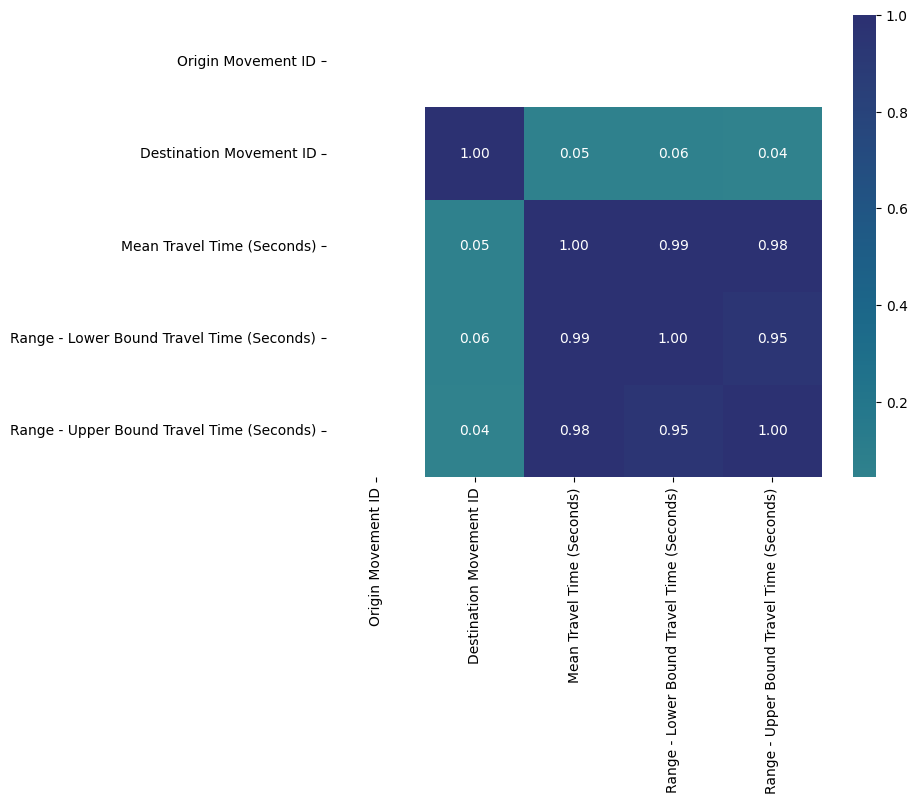

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True, cmap='crest', center=0, fmt=".2f")
plt.show()

Xd, toca quitar el Origin..... pues o es buena idea quitarlo, porque pues vea que da NaN, porque el calculo de la correlacion de Pearson entre una variables-campo X y otra(o) Y es la covarianza entre vairables-campos dividido la desv estand de X y la de Y, y pues note que Origin es cte en todos sus registros i,e la covarianza da cero y la desv estd da cero entonces tenemos 0/0 i,e desde el incio se supone que debi y cualquier persona que sepa un poquito preveria que ahi no va haber una correlacion bien definida pues el calculo queda mal definido pero conceptualmente podremos decir que simplemnete la correlacion es cero pues si el campo-variable no varia, pues entonces va a su bola y es independiente....... en todo caso, por eso lo ideal es quitar esto, pues es ruido

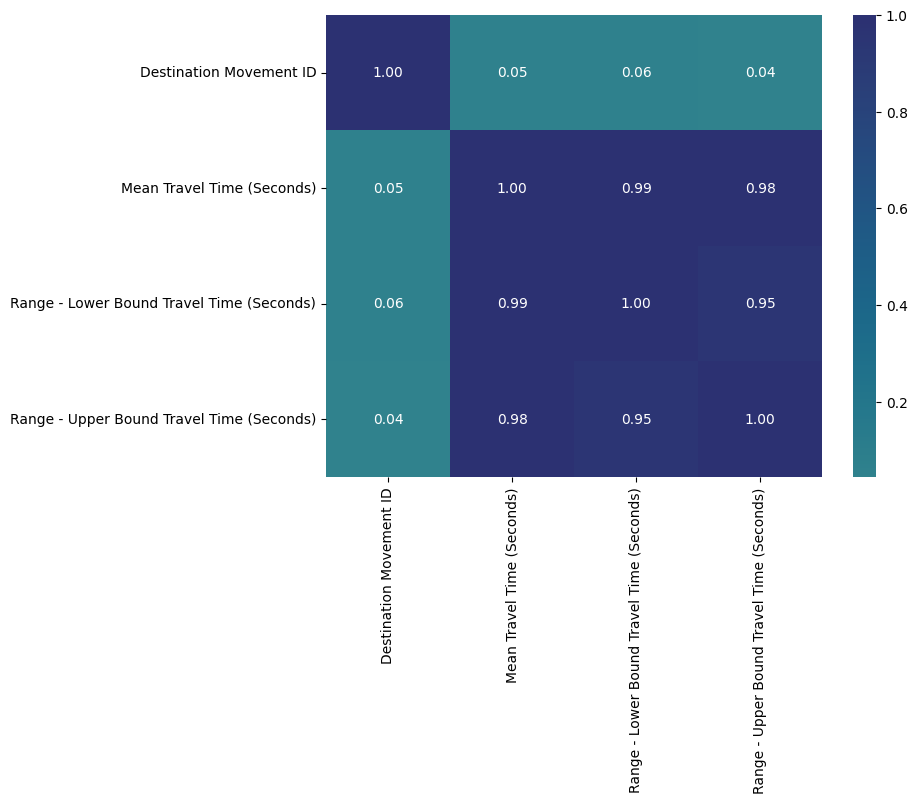

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_bogota.select_dtypes(include='number')
numeric_df.drop('Origin Movement ID', axis=1, inplace=True)

# Calcular la matriz de correlación
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True, cmap='crest', center=0, fmt=".2f")
plt.show()

observamos que estamos medio llevados xD, haber:
- primero que todo, obvio hay correlacion entre la media y sus cotas, para entender esto facilmente piense el siguiente ejm hipotetico y de juguete: suponga que usted mide que el tiempo que se demora es 2 segundos, y que el error es de +/-1, de modo que tendriamos 2, 1, 3. Ahora digamos que medimos algo que demoro 11 segundos y tiene el mismo error de +/-1, de modo que tendriamos 11, 10, 12....... note asi pues como a medida que el tiempo medido es mas grande, tambien los numeros-rango que lo limitan, y no tanto porque aumente el error necesariamente. Es por ello, que para analizar bien eso, tendriamos que sacar ya sea el absoluto, o el porcentual

- segundo que todo, casi no hay correlacion entre el tiempo de viaje promedio y el punto-Census Tract de destino DDDDDD: ............. me imagino que por eso es que toca meter otros datos que aca aun no tenemos, como lo es el clima train/railways y densidad de vias.

Solucionemos pues esto entonces:

In [ ]:
numeric_df = df_bogota.select_dtypes(include='number')
numeric_df.drop('Origin Movement ID', axis=1, inplace=True)

numeric_df['Range - Lower Bound Travel Time (Seconds)'] = numeric_df['Mean Travel Time (Seconds)'] - numeric_df['Range - Lower Bound Travel Time (Seconds)']
numeric_df['Range - Upper Bound Travel Time (Seconds)'] = numeric_df['Range - Upper Bound Travel Time (Seconds)'] - numeric_df['Mean Travel Time (Seconds)']

numeric_df

,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,4,2296,657,919
1,6,1619,562,859
2,8,159,84,175
3,9,754,331,588
4,11,738,232,338
...,...,...,...,...
491,1155,1664,555,830
492,1156,2531,714,993
493,1157,2363,771,1143
494,1158,2871,962,1446


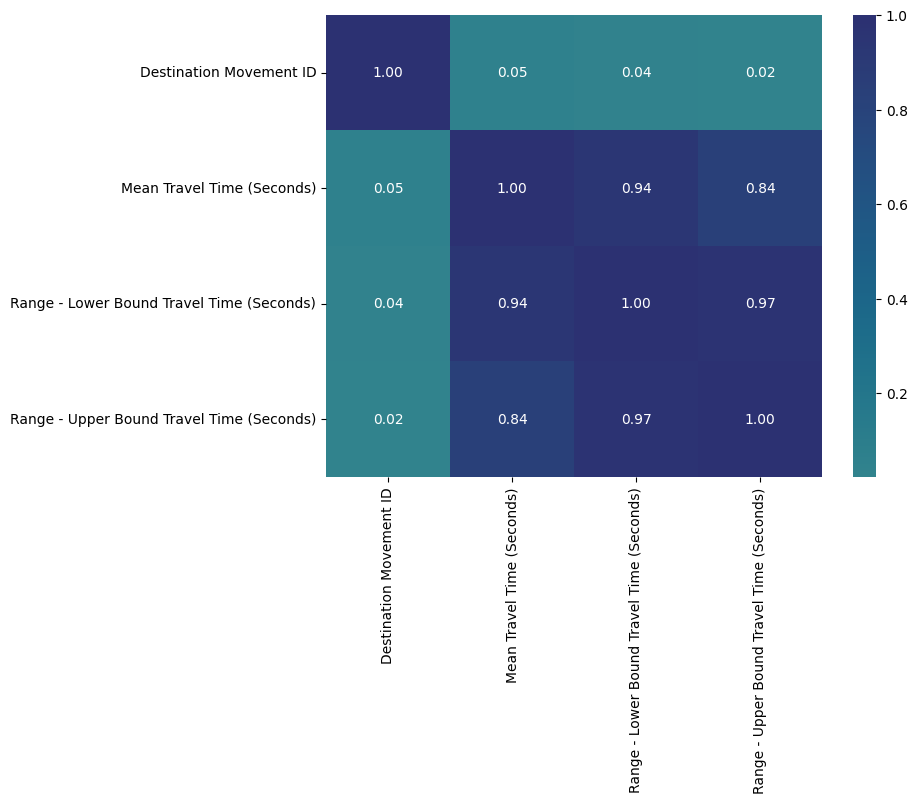

In [ ]:
# Calcular la matriz de correlación
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True, cmap='crest', center=0, fmt=".2f")
plt.show()

Se ve asi pues como "mejoro" i,e como cayo la correlacion al mirar el error absoluto.... aun asi, note que se preserva una correlacion alta. Podriamos sospechar que eso se debe a una preservacion de una propagacion del error por asi decirlo. Ejemplo: volvamos a nuestras dos mediciones imaginarias de 2+/-1 y 11+/-1.... note, que esta simulacion o situciones hiptetica imaginaria, a medida que tenemos tiempos mas altos, nuestros aparatos de medicion conservan la misma precision por asi decirlo y en general nada le pasa al sistema como para que suba el error por la subida del valor que se mide..... Entendido esto, mire entonces que en nuestro caso particular, si pasan cosas que hacen que la estimacion si sea mas alta o menos precisa i,e a mas tiempo toma un viaje el error absoluto teiende a aumenta tambien i,e su magnitud afecta el error. Para ver que si sean efectos de magnitud y no que haya otros factores que hagan que el error suba, hagamos el error porcentual y miremos que tal:

In [ ]:
numeric_df['Range - Lower Bound Travel Time (Seconds)'] = numeric_df['Range - Lower Bound Travel Time (Seconds)'] / numeric_df['Mean Travel Time (Seconds)']
numeric_df['Range - Upper Bound Travel Time (Seconds)'] = numeric_df['Range - Upper Bound Travel Time (Seconds)'] / numeric_df['Mean Travel Time (Seconds)']

numeric_df

,Destination Movement ID,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,4,2296,0.286150,0.400261
1,6,1619,0.347128,0.530574
2,8,159,0.528302,1.100629
3,9,754,0.438992,0.779841
4,11,738,0.314363,0.457995
...,...,...,...,...
491,1155,1664,0.333534,0.498798
492,1156,2531,0.282102,0.392335
493,1157,2363,0.326280,0.483707
494,1158,2871,0.335075,0.503657


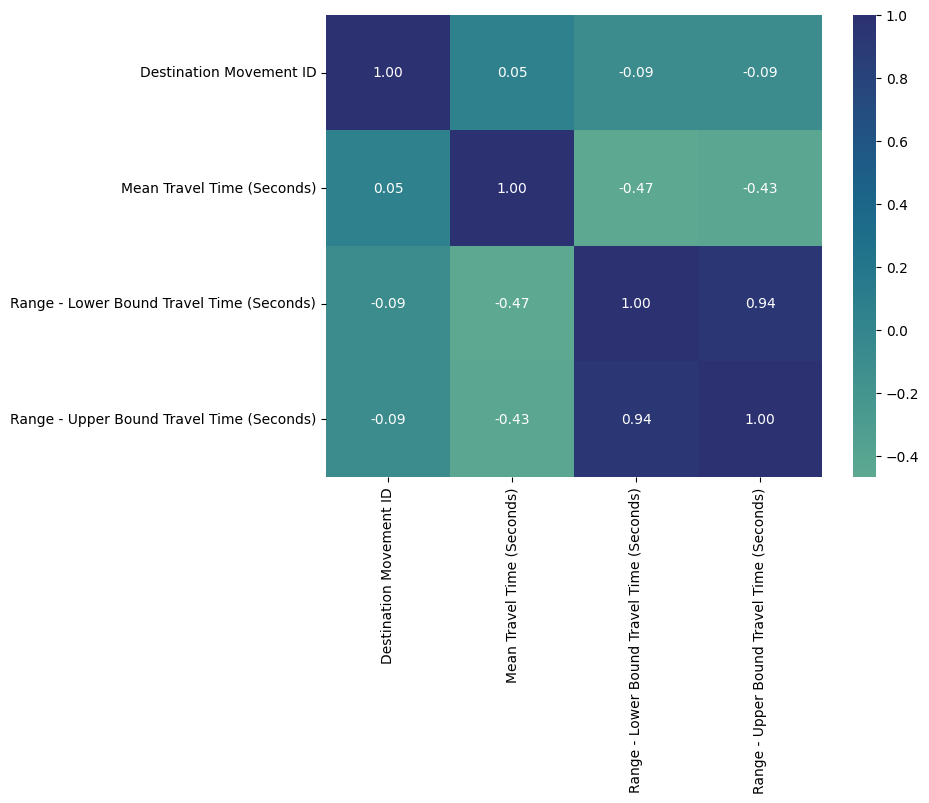

In [ ]:
# Calcular la matriz de correlación
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True, cmap='crest', center=0, fmt=".2f")
plt.show()

Bueno, excelente, se demostro que en efecto el incremento del error, se debia a un efecto de magnitud y de hecho, se demuestra que el error no aumenta en las mediciones i,e se mantiene casi constante en el sentido de que note que las correlaciones ahora aparecen negativas i,e a mas pequeño el tiempo promedio del viaje medido, mayor es el error, lo cual tiene sentido desde una buena practica de mendicion en cuanto la precision del instrumento de medicion sufre no para valores grandes, sino para pequeños

Y lo segundo se solucionara en la siguiente seccion xD

....

Haber manito, hablando con gpt de lo obtenido (de los mapas de correlacion), y de lo que razone al respecto, el dice lo siguiente:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_bogota.select_dtypes(include='number')
numeric_df.drop('Origin Movement ID', axis=1, inplace=True)

In [ ]:
# ====== Figura A: Original / Error absoluto / Error relativo ======

# A1) Original
cfg_orig = numeric_df.copy()

# A2) Error absoluto
err_low_abs = numeric_df["Mean Travel Time (Seconds)"]                - numeric_df["Range - Lower Bound Travel Time (Seconds)"]
err_up_abs  = numeric_df["Range - Upper Bound Travel Time (Seconds)"] - numeric_df["Mean Travel Time (Seconds)"]
cfg_abs = pd.DataFrame({
    "Destination Movement ID": numeric_df["Destination Movement ID"],
    "Mean Travel Time (Seconds)": numeric_df["Mean Travel Time (Seconds)"],
    "LB_abs": err_low_abs,
    "UB_abs": err_up_abs,
})

# A3) Error relativo (% del mean)
mean_tt = numeric_df["Mean Travel Time (Seconds)"].replace(0, np.nan)  # por si acaso -no necesario porque ya mire que no habian NaN's pero ok-
cfg_rel = pd.DataFrame({
    "Destination Movement ID": numeric_df["Destination Movement ID"],
    "Mean Travel Time (Seconds)": numeric_df["Mean Travel Time (Seconds)"],
    "LB_pct": err_low_abs / mean_tt,
    "UB_pct": err_up_abs  / mean_tt,
})

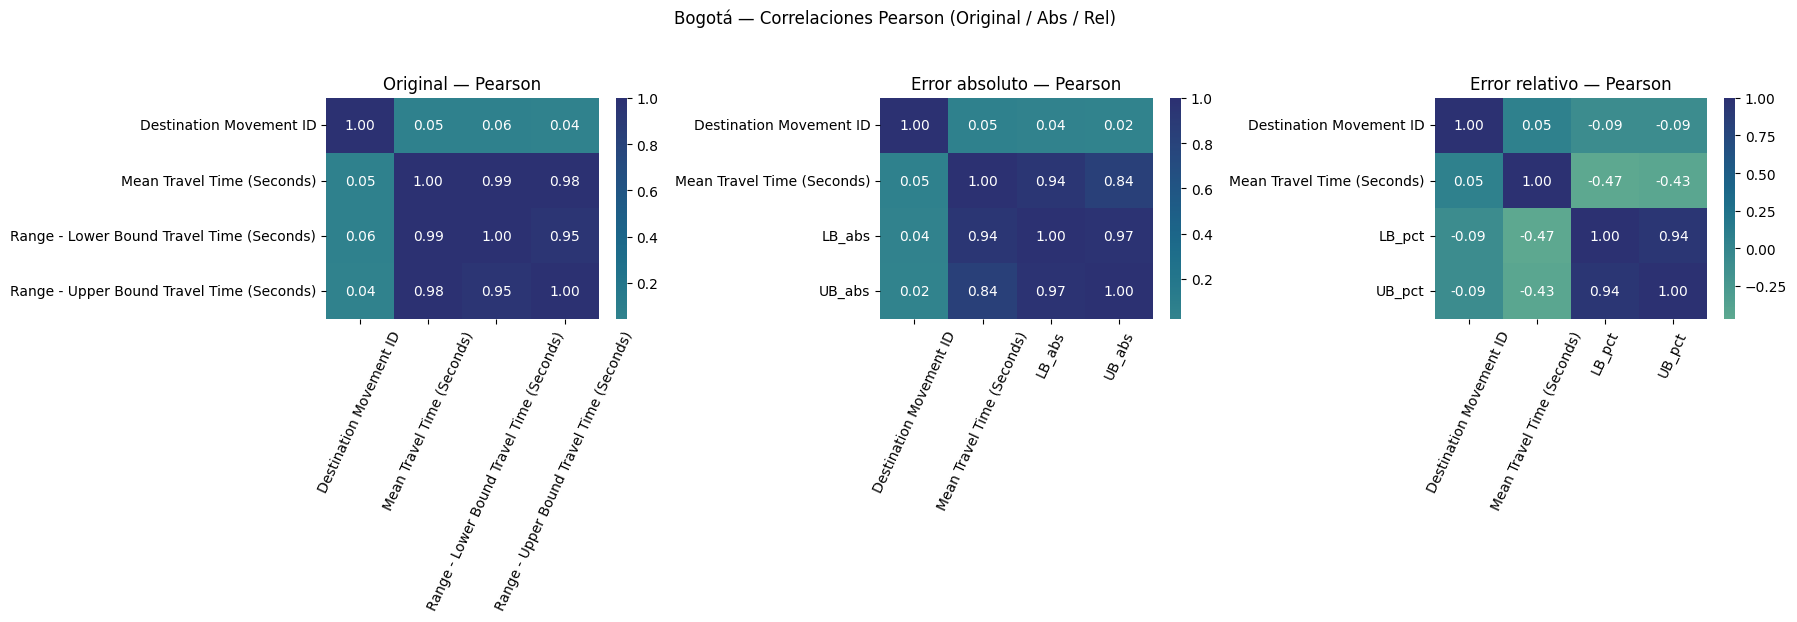

In [ ]:
# @title
# ====== 2) FIGURA A — PEARSON (Original / Abs / Rel) ======
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

c1 = cfg_orig.select_dtypes("number").corr()
sns.heatmap(c1, ax=axes[0], annot=True, fmt=".2f", cmap="crest", center=0)
axes[0].set_title("Original — Pearson"); axes[0].tick_params(axis="x", rotation=65)

c2 = cfg_abs.select_dtypes("number").corr()
sns.heatmap(c2, ax=axes[1], annot=True, fmt=".2f", cmap="crest", center=0)
axes[1].set_title("Error absoluto — Pearson"); axes[1].tick_params(axis="x", rotation=65)

c3 = cfg_rel.select_dtypes("number").corr()
sns.heatmap(c3, ax=axes[2], annot=True, fmt=".2f", cmap="crest", center=0)
axes[2].set_title("Error relativo — Pearson"); axes[2].tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Correlaciones Pearson (Original / Abs / Rel)", y=1.03)
plt.tight_layout(); plt.show()

Entonces pille, de las graficas pues, primero que todo el me aterriza algo, y es **¿Qué representan realmente esos “bounds”?** entonces haber, obvio, como habiamos dicho, son errores pues en el sentido de que te da "un intervalo de confianza" por asi decirlo (desde ya, decir que no lo es, pues es empirico y no hacemos ninguna inferencia) del tiempo que se realizo, el problema, es que cuando estaba argumentando-pensando entorno a ello yo daba ejemplos de "error intruemntal" y pensaba pues que habin unos errores fenomenologicos, pero no tenia tan claro cuales en particular y como afectaban..... y pues gpt me lo puntualizo o me aterriza diciendome: ey recorda que esos limites no son tanto o solo en el sentido de que son un “error del instrumento con que se mide”, sino que en Uber Movement, el Lower/Upper son cuantiles-percentiles empíricos (p.ej. algo tipo P5–P95) de la distribución de tiempos de viaje para ese OD (Origin–Destination) y ventana temporal-el dia-campo Date Range (i,e es un rango percentílico o rango inter-percentil empirico que tiene por objetivo principal dar razon de-medir la variabilidad del trafico, no solo la incertidumbre de un aparato.). De modo que expresan variabilidad del tráfico y de las rutas (i,e si se atraveso un niño y tuve que frenar xD o semaforos o un derrumbe o cualquier cosa), no incertidumbre de medición, o al menos no solamente eso (ni tampoco seria tanto su punto central).

Una vez reconocido eso, procede entonces a decir lo siguiente por cada mapa de calor de la correlaciones de pearson entre variables:

1. En cuanto al primer mapa i,e sin hacer operaciones, los datos en bruto tal cual y originales: la media y los cuantiles vienen de la misma distribución → es normal ver ~0.98–1.00 entre mean vs lower/upper. No dice mucho per se.

2. En cuanto al segundo mapa i,e calculo de los errores absolutos, un paso ideal: pasar a desviación absoluta (|mean−lower|, |upper−mean|) reduce la correlación con la media (el argumento que dimos, de que tiempos mas altos limites mas altos, y que una forma de matar eso sacando el absoluto) pero sigue alta → heteroscedasticidad: viajes más largos acumulan más variación (más tramos susceptibles a congestión/semáforos, mayor dispersión de rutas, etc).

3. En cuanto al tercer mapa i,e pasar a porcentual (desviación-absoluto/mean): es la forma correcta de chequear si la dispersión crece solo por escala o no (lo que deciamos antes de heteroscedasticidad, a mas tiempo se acomulan mas problemas en la via-viaje).

    De modo que sirve para ver o comparar instantaneamente que Origin–Destination es mas caotica que otra i,e nos permite comparar rutas cortas-tomaron poco tiempo con rutas largas-tomaron largo tiempo, y cuales de las dos son mas conflictivas i,e tiene mas semaforos o tiene mas niños atravesandose o tiene mas derrumbes. Y asi pues, es teniendo en cuenta la anterior lectura, que el que baje fuerte la correlación (y hasta se vea algo negativo), cuadra: la variación relativa tiende a ser más estable e incluso mayor en viajes cortos (pequeños cambios son gran %) i,e la “negativa” que ves en el tercer mapa no prueba “mejor o peor instrumento”; solo indica que, relativamente, los viajes cortos pueden tener mayor dispersión porcentual

    >(un par de semáforos o giros cambian bastante el % i,e el tiempo de llegada i,e piense que si el vaije es una calle y que en la mitad de la calle hay un semaforo, entonces hay situciones donde llegamos super rapido y unas donde llegamos super lento i,e suponga que las distancia nos demoramos 1 minuto en recorrerla si no paramos y no hay nada atravesandose y etc, pero, digamos, que el semaforo que hay en la mitad de la calle se demora 10 minutos en cambiar, luego, van haber ocasiones en que nuestro viaje demore 1 minutos, y otras en que demore 11 minutos.... piense que si el viaje dura 2 horas = 120 minutos, entonces 10/120 ≈ 8%),
    
    mientras que en viajes largos el ruido relativo “se diluye” (relativo a la magnitud del viaje).

Conclusion: las calles de bogota no son tan caoticas (podria ser peor), simplemente la incertidumbre del tiempo de viaje promedio sube porque se suman eventualidades, pero la suma de esas evetualidad no crece en la misma proporcion que el tiempo del veiaje sino que la tendencia es contraria i,e en un vaije corto puede dar mas la imprecion de que hubieron muchos problemas por segundo que en uno largo, aun asi, en total, es decir, toooodo un viaje, en viajes largos hay mas eventualidades que en cortos i,e en un viaje largo puedne haber 10 eventualidades en total y en uno corto solo 3, pero en el largo digamos habian 0.2 por segundo y en el corto habian 1 por segundo..... entonces es eso, uno es tiempo de esperas totales en el viaje y uno tiempos de espera relativos..... tmabien podria decirse que andar mas tiempo no te expone mas asi super after sino que hay una cantidad de exposion n y ese n incrementa de a muy poquitos a medida que se anda mas.

En Bogotá, la variabilidad absoluta del tiempo crece con el tiempo medio (viajes largos acumulan más dispersión), pero la variabilidad relativa tiende a ser menor en viajes largos porque una parte importante de la variación parece aditiva (overhead fijo-casi fijo: arranque, espera, semáforos clave) que domina-pesa mas en recorridos cortos y pierde peso proporcional-se diluye a medida que el viaje se alarga.

Por ultimo el dice:
>Perfecto tu comentario, Destination Movement ID es categórico, así que Pearson con la media no tiene sentido. Ese ID no codifica distancia; para que pinte, mete features geométricas (distancia Haversine, por ejemplo).

>(Importante para el modelo) No uses lower/upper como features para predecir la media: son derivados del mismo fenómeno en la misma ventana → fuga de información. El paper usa exógenas (clima, densidad vial, etc.), y geométricas. Empieza por la distancia (centroides + Haversine) y verás correlación mucho más razonable.















Ahora bien, dicho-finalizado lo anterior, el propone que hagamos ademas de la correlacion de Pearson la de Spearman, que es monotonica, y por ello, menos sensible a outliers (i,e mientras que Pearson revisa si una dispersion sigue una linea recta y penaliza todo aquello que vaya en contra de esa forma de linea recta, Spearman es mas relajado, tambien va de -1 a 1 y penaliza todo aquello que no se monotono, creiente o decreciente, de modo que si una distribucion sigue una tendencia hacia arriba pero luego se revela y coge para abajo, eso lo refleja Spearman de modo que ya no nos daria 1 sino menos.... pero por ejm si sigue una tendencia creciente que no sea una recta i,e x^2 o exponencial o etc vea que esos son monotos crecientes o decrecientes, de modo que daria 1 o cercano a siempre que la dispersion siga esa forma y no cambie su monotonia, por eso es robusto a outliers, pero outliers que sigan la tendencia xD).....

palabras mas, palbras menos, haremos Spearman para al comparar con Pearson detectar cosas en la dispersion de nuestra variabilidad de tiempo de viaje promedio (recuerde que la variabilidad se relaciona intimamente con nuetsro fenomeno, entonces saber cosas entorno a esta, o como se comporta, no habla del fenomeno per se y por tanto luego nos da hints para hacer un modelo, que cosas pesan mas, que menos, y en general que esta pasando, y donde buscar nuestras features y que posiblmente ayudarian a describir i,e describirian).

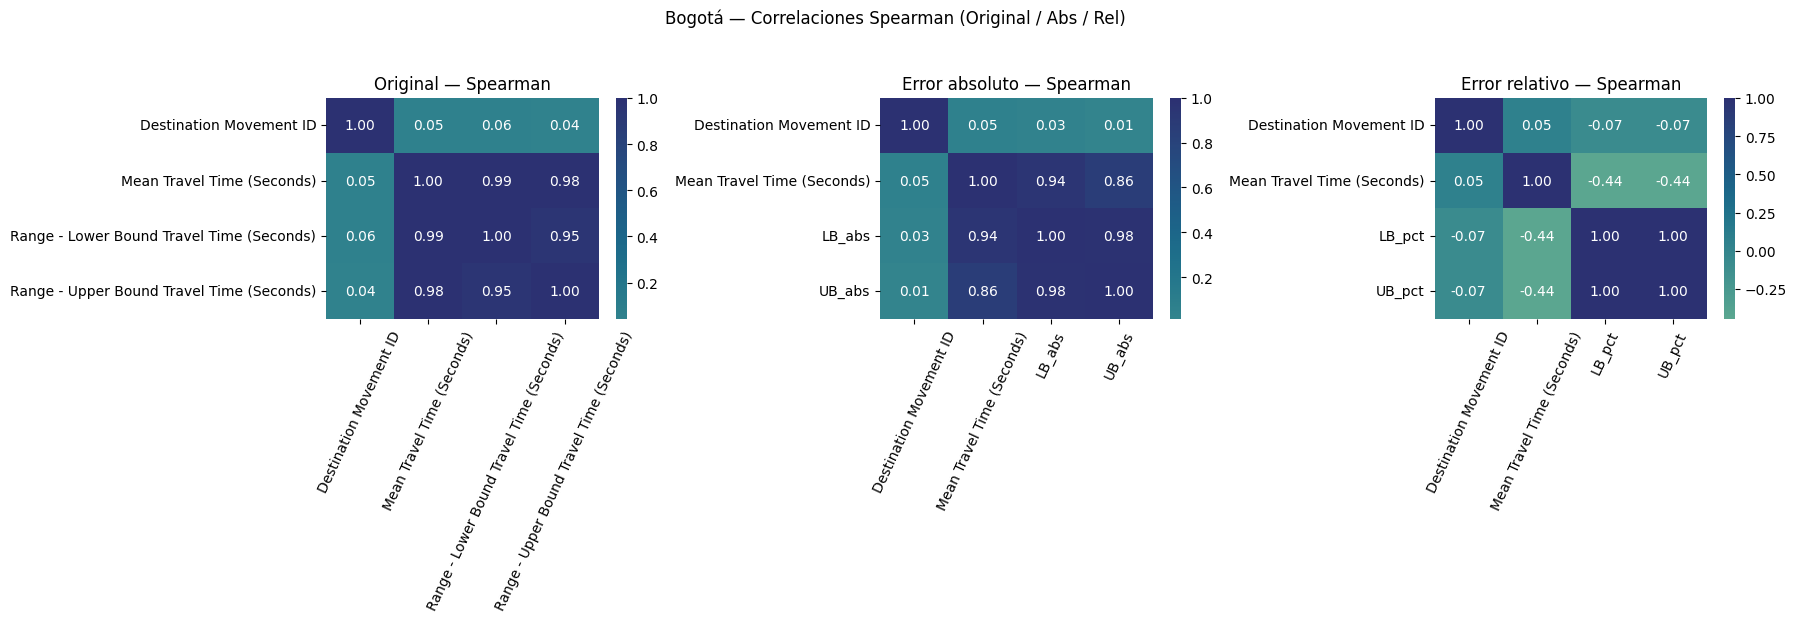

In [ ]:
# @title
# ====== 3) FIGURA B — SPEARMAN (Original / Abs / Rel) ======
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

c1s = cfg_orig.select_dtypes("number").corr(method="spearman")
sns.heatmap(c1s, ax=axes[0], annot=True, fmt=".2f", cmap="crest", center=0)
axes[0].set_title("Original — Spearman"); axes[0].tick_params(axis="x", rotation=65)

c2s = cfg_abs.select_dtypes("number").corr(method="spearman")
sns.heatmap(c2s, ax=axes[1], annot=True, fmt=".2f", cmap="crest", center=0)
axes[1].set_title("Error absoluto — Spearman"); axes[1].tick_params(axis="x", rotation=65)

c3s = cfg_rel.select_dtypes("number").corr(method="spearman")
sns.heatmap(c3s, ax=axes[2], annot=True, fmt=".2f", cmap="crest", center=0)
axes[2].set_title("Error relativo — Spearman"); axes[2].tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Correlaciones Spearman (Original / Abs / Rel)", y=1.03)
plt.tight_layout(); plt.show()

De donde vea que podemos concluir, en relacion con lo visto en Pearson, que:
- Patrón base se confirma. Con los datos originales (mean, lower, upper), Spearman también arroja correlaciones ~1 entre media y percentiles. Esto confirma que comparten la misma distribución subyacente; el resultado es poco informativo por construcción.

- Heterocedasticidad en absoluto. Con errores absolutos (|mean−lower|, |upper−mean|), Spearman sigue alto (≈0.86–0.94), igual que Pearson. Esto robustece la lectura de heterocedasticidad: a mayor tiempo medio, mayor dispersión total (los viajes largos acumulan mas variación fenomenologicoas.... i,e no estamos en el caso en que para un error fijo de +/-1 las cotas solo suben porque el tiempo de viaje promedio sube i,e para un tiempo de 2 las cotas son 1,3 y para uno de 11 las cotas son 10,12 i,e subieron para un error fijo.... ese no es nuestro caso i,e dentro de nuestra fenomenologia hay cosas que suben el error a medida que le tiempo de viaje promedio es mayor, lo cual en el fondo es coherente con la propia fenomenologia i,e ir manejando y que pasen o no pasen cosas que cambien nuestro tiempode llegado para bien como para mal..... y funciona como primer indicio de una componente aditiva en el error, algo como por ejm Aditivo: 𝑇 = 𝜇 + 𝜀 con 𝜀 de escala fija, entonces los “bounds” serían ±c independientes de 𝜇, lo que implicaria que el error absoluto sería casi constante y el error relativo 𝑐/𝜇 caería al aumentar μ..... note que en efecto esas graficas-resultados se poseen, a continuacion en el siguiente punto se acotara en ello).

- Relativo baja y puede volverse negativa. Con errores relativos (abs/mean), Spearman cae (≈−0.44), muy en línea con Pearson. Conclusión: la variabilidad proporcional tiende a disminuir con el tiempo medio; de modo que hay evidencia de un componente aditivo (overhead fijo: arranques, esperas puntuales, semáforos) que pesa más en viajes cortos y “se diluye” en viajes largos (i,e sospechamos que la relacion entre el tiemp.viaj promed y el error abs crece de manera aditiva y no multiplicativa, o o o que como minimo es muy probable que haya una componente aditiva, ya la multiplicativa toca verificarla luego con otras cosas..... eso tanto para UB como LB i,e eventos retrasatorios como adelantantes).

- Rank-robustness. El hecho de que Spearman (insensible a outliers y sólo dependiente del orden) repita la historia de Pearson indica que las relaciones no son un artefacto lineal ni de valores extremos: son monótonas y estables, en otras palabras, las relaciones son monótonas y robustas, no dependen de una supuesta linealidad ni de un par de outliers locos, eso si, aunque la dispersion no depdene de una suposicion de que siguen una linea recta para ser modelados monotonos i,e decir que siguen una tendencia, por los valores altos y similares que dan los coeficientes, parece ser que la forma que siguen si es una recta o cercano a ella (y no una exponencial o una potencia o etc... aunque igual toca analizarlo un poco mas luego para descartar 100% seguros con graficos de dispersion y ajustes).

- ID de destino no es explicativo. La (casi nula) correlación del Destination Movement ID con el resto persiste en Spearman. Recalca que es categórico, no magnitud física → no usarlo como feature numérica..... es decir, Destination ID es categórico, el número no significa “más lejos” ni nada -(o al menos no logra traducirse a si mismo asi aqui.... para capturar el efecto de la distancia o la posición, será necesario incorporar features geométricas (por ejemplo, distancias Haversine) y variables exógenas (clima, red vial, etc.) por lo que no presenta asociación significativa con los tiempos ni sus derivados y qued relegado es a ser un identificador categórico)- → correlación de Pearson ahí no es -(muy)-interpretable -(o sucepotible-sugerible a ello, mas facil luego vemos cuando traducamos eso a distancias literales haber si sigue igual o no)-.

>Correlaciones (Pearson y Spearman). Al analizar la matriz de correlaciones con Pearson y repetir con Spearman (robusta a outliers), encontramos el mismo patrón cualitativo: (i) en los datos originales, la media y los percentiles de tiempo están fuertemente correlacionados (≈1) por provenir de la misma distribución; (ii) al pasar a errores absolutos, la correlación con la media sigue alta, evidenciando heterocedasticidad (viajes largos acumulan mayor dispersión total); y (iii) al normalizar por la media (errores relativos), la correlación cae e incluso se torna levemente negativa, lo que sugiere un componente aditivo (overhead casi fijo) que pesa proporcionalmente más en viajes cortos y se diluye en recorridos largos. Dado que Spearman confirma este comportamiento, concluimos que las relaciones son monótonas y robustas, no producto de -suposicion- linealidad o outliers. Adicionalmente, el identificador de destino no presenta asociación significativa (es categórico), por lo que no debe usarse como predictor numérico. Estos hallazgos motivan: (a) trabajar con features geométricas (p. ej., distancia Haversine) y exógenas (clima, red vial), (b) considerar transformaciones logarítmicas o modelos robustos/ponderados para manejar heterocedasticidad, y (c) evitar usar los percentiles como features del target para prevenir data leakage.



**Insumo necesario para lo que sigue en el analisis:** note que tenemos
$[LB, mean_{tt}]$ U $[mean_{tt}, UB]$, luego

* **Pearson vs. Spearman: ¿por qué cambian un poco?**
  - Original: 0.99 / 0.98 en ambos → relación casi perfecta y (casi) lineal/monótona.

  - Error absoluto: Pearson (0.94, 0.84) vs Spearman (0.94, 0.86). <br>Esa subidita de UB en Spearman indica curvatura/outliers en la cola alta: el vínculo sigue monótono, pero no tan lineal (Pearson baja más).

  - Error relativo: Pearson (−0.47, −0.43) vs Spearman (−0.44, −0.44). <br>Aquí la historia es monótona y bastante simétrica entre LB_pct y UB_pct; Pearson capta una leve curvatura que lo hace diferenciar −0.47 vs −0.43.



* **Patrón sistemático LB vs. UB**
  - En todas las vistas (original, error absoluto, error relativo) tanto para Pearson como Spearman sale que la relación con la media es ligeramente más fuerte para LB que para UB (p. ej. 0.94 vs 0.84 en Pearson; 0.94 vs 0.86 en Spearman).

  - Lectura de eso:
    - 1ro: note que las correlaciones son positiva en ambos casos i,e en ambos casos se dice que a mayor tiempo de viaje promedio mayor variabilidad-incertidumbre en llegar tanto mas tarde como mas temprano i,e se tiende a llegar mas tarde o temprano con mayor facilidad-mayor incertidumbre-variabilidad fenomenologica (por eventos-escenarios que se den durante el viaje, lo cual coherente pues a mas tiempo mas nos exponemos a)
    - 2do: Pearson cae más que a Spearman (drop: Spearman 0.86 → Pearson 0.84.... igual note que es un drop chiquito) para UB_abs que para LB_abs en, y dichas caidas solo son posibles o suceden porque Pearson sufre con no linealidades/outliers; Spearman solo mira rangos.
    - 3ro: por 1 y 2, se sigue, que el drop sucedio por datos anomalos i,e tenemos una tendencia que siguen los intervalos UB_abs pero empiezan haber datos en que hubieron eventos-escenarios que los tiraron mucho para arriba o para abajo de esa tendencia (se abre como un abanico, la cosa sera luego verificar si el abanico abre para arriba o para abajo o de igual manera xD, pero si abriera de igual manera.... idk, no bajaria Pearson sino Spearman no?).
    
      Entonces piense, que lo mas probable, es que si se daña la linealidad i,e si se daña la correlacion de UB_abs, lo mas probable es que sea por datos que estan por arriba que por abajo por dos motivos:
      - un dato se puede ir pa cuenca sin ningun problema por arriba, pero como por debajo esta acotado en algun sentido por el tiempo viaje promedio (si cae debajo de este yo no seria de la clase-conj UB) entonces para poderse ir a cuenca para abajo es porque en general los intervalos UB_abs estan en promedio muy por arriba i,e son muy grandes de modo que lo anomalo seria ser pequeño (pero eso no es lo mas probable porque al final del dia no es comun los hiper retrasos de modo que retrasos pequeños sea lo anomalo).
      - piense que si fuese por datos que estuvieran mas abajo podriamos eso signficaria un decrimento en linealidad y en monotonia y coincidirian los indices (aunque igual este motivo no es tan fuerte porque a la final no se diferencian tanto uno del otro xD, pero eso, keep it in mind)

    Asi pues, concluimos (con 100% de seguridad que-sin temor a equivocarnos): que los datos de UB son mas caoticos i,e mas desorganizados-fluctuantes-dispersados en relacion con su tendencia por asi decirlo que los datos LB (los LB son mas organizados) i,e hay mas eventos-escenarios anomalos en los viajes que afectan a UB que a LB t.q rompen con su tendencia....
    - tanto porque la correlacion de LB es mas alta que la de UB (para ambos coeficientes)..... son super o mas monotonos y lineales
    - como por el drop que sufre UB y no sufre LB..... no hay outliers que rompan su linealidad

    y de hecho note que por eso ultimo uno ve que los LB son no solo mas, sino super organizados por asi decirlo i,e siguen una cotidianidad i,e no hay eventos raros que rompan su tendencia i,e es mas facil estimar correctamente cuanto usted se va ahorrar en el viaje (no pasan cosas inesperadas que cambien lo que se esperaria que usted se ahorre, ya sea que super ahorre o ahorre menos de lo esperado) antes que estimar cuanto usted se va retrasar en el viaje (puede que un dia se retrase muchisimo o que se retrase no tanto... mayor variabilidad en ese sentido).........
    
    Y ademas como ya habiamos hablado, tambien note que eso significa que UB_abs va pesar entonces mas o menos de uno de sus lados (asimetria i,e que cambia su peso a algo no equilibrado), a mas, a menos, no sabemos (depende si hay mas ouliers o inliers xDDDD, mentiras outlier a izquierda), pero en uno de esos dos escenarios de desequilibrio debemos de estar, o si no, el que bajaria seria Spearman diria uno mientras Pearson queda estable si abriese pues el abanico de igual manera para arriba como para abajo i,e de manera equilibrada.... recalco, que no es que cambie el peso hombre, porque no es como que haya un antes y un despues consigo mismo i,e que person cambiara, sino que estamos comparando respecto a algo balanceado i,e sin outliers, que es la version que ofrece Spearman i,e estamos comparandolo consigo mismo....... aunque aunque auque, tambien srive comparado con LB i,e hemos estado hablando de la asimetria dentro de los propios UB_abs y LB_abs, pero tambien o otra cosa que veremos y que importa es la asimetria entre UB-abs y LB_abs y no solo dentro de ellos, eso nos dice si los tiemp.viaj promed la incertidumbre-variabilidad esta mas pesada a izquierda o derecha y pues donde es mas pesado es donde hay mas variabilidad, en particular, se espera que UB, lado derecho, sea mas pesado pues como ya vimos es mas variable.... note que si pesaran lo mismo, tendrian la misma correlacion o cercanas, y en el fondo, tambien implicaria que no abria un drop insinuando que hay mas dispersion en UB que en LB, aunque esto ultimo toca cogerlo con cuidado, porque pille que si ambas estan desequilibradas internamente a derecha e izquierda respectivamente en la misma proprocion, entonces entre UB_abs y LB_ab no se veria-habria desequilibrio i,e se compensarian aun asi en nuestro caso particular esto es imposible porque sabemos que uno de los lados esta mas dispersado que el otro, sino que segun como este el lado dispersado por dentro puede luego dar la impresion de que entre UB_abs y LB_ab el lado derecho sea mas pesado (oulaiers-outliers a derecha por dentro-abanico hacai arriba en UB_abs) o el lado derecho sea el mas liviano dando la impresion de izqierdo mas pesado (inlaiers-outliers a izquierda por dentro-abanico pa abajo en UB_abs)..... ey otra cosa que quiero acotar es que eso no es suficiente i,e puede que dentro este desbalanceado a izquierda pero maybe sea tan disperso que aun asi no haga que LB_abs se vea mas pesado, aun asi no se por ejm que tan plausible sea esto porque igual los coeficientes son altos y se parecen..... hemos especulado mucho :,( sabiendo que esta bobada la podemos despejar mas facil con graficos xD y otros calculos

    Ahora bien, por propositos argumentativos, para asi dar un ejemplo de la fenomenologia que podria implica esos desbalances i,e el drop-la perdida de linealidad y que LB tenga coeficientes de mayor valor que UB,  adelantemosnos a los hecho y hagamos un guess xD, supongamos que en UB_abs el abanico abre para arriba i,e que para alla esta la asimetria i,e:  
    que dichos eventos-escenarios anomalos probablemente son súper retrasos por la naturaleza de UB (que el mean esta abajo y funje como contraint y la tendencia y monotonia) i,e la cola superior (UB) es más “sueltica” porque captura picos de congestión/eventos raros ⇒ más asimetría hacia arriba i,e bajo dicho escenario de outliers por super esperas, el lado mas pesado seria UB y no LB (por el drop y por correlacion menor)....... un evento raro que rompa con la cotidianidad de UB es mas probable que sea algo retrasante que algo poco retrasante i,e que en ese viaje o dia se esperaba ciertas cantidades de retraso pero de manera extraña el retraso existio pero fue menor de lo esperado-retrasos pequeños (eso igual no es imposible ni muy rebuscado)

    I,e los eventos que aportan a que usted se demore menos tiran menos y son menos raros i,e son mas frecuentes y menos outliers que los que hacen que usted llegue tarde (ey recuerde que para LB_abs tambien aplica lo de que un atipico puede ser un conductor que le rinda mucho o que le rinda muy poquito, menos de lo esperado segun la tendencia.... el caso, es que ambos casos son poco comunes aca y que el segundo es mas complicado que el primero por el mismo razonamiento de acotamiento y etc....... Again, POR PROPOSITOS ARGUMENTATIVOS podriamos suponer que el evento anomalo mas comun es aquel el que te hace llegar re tarde, que aquel que te hace llegar super temprano (abanico abrierto hacia abajo para LB_abs i,e asimetrico para ese lado, aunque recuerde que la asimetria es muy leve o casi nula pues no hay drop y los coeficientes son aun mas altos))
    
    El caso es que volviendo-recalcando y como conclusion, lo que podemos decir de manera segura (con 100% de prob), lo que te hace llegar temprano funciona muy estable y usual, esta ahi siempre apoyandote xD eso si, no te hace milagros pero tampco super perjuicios (el abanico se abre de igual manera para arriba como para abajo, entonces hay igualdad de chances de tener oportunidades de recortar mucho o recortar poco, aunque ya sea que a uno le toque uno u otro, la diferencia no va ser excesiva o mucha), contrario a lo que te hace llegar tarde (mas disperso y eventos mas agreste por lo de que se daña la linealidad i,e que haya abanico pa arriba o abajo, cosa que deberemo de verificar.... note que segun el abanico, entonces tendremos que las chances de obtener retrardos grandes o pequeños para arriba indicarias hay mas chances de obtener retrasos grandes y si abre pa abajo hay mas chances de tener retrasos pequeños).



  

* **Relativo vs Absoluto y Relativo_Pearson vs Relativo_Spearman junto Absoluto_Pearson vs Absoluto_Spearman: una radiografia sobre una componente de error aditiva y una componente de error multitplicativo**

  - **insumo, que es error aditivo y que seria un error multiplicativo:**
    - Qué sería “aditivo” y qué sería “multiplicativo”:

      Aditivo: algo que suma un pedazo independiente del nivel de la variable.
      Ejemplo con tiempo de viaje:

      T = (overhead fijo) + (lo que depende de la ruta) + ruido

      Ese overhead fijo puede ser cosas como: tiempo de arranque, esperar que el carro salga, un semáforo inicial, etc.

      Multiplicativo: algo que escala con el nivel.
      Ejemplo de variabilidad que crece proporcional al tiempo medio:

      sigma(T) ≈ k * mean(T)

      o un modelo del estilo:

      T = t0 + (1 + ε) * mean(T),

      donde ε es un porcentaje aleatorio (ruido relativo).

    - Cómo pueden convivir

      Nada impide que la varianza total (o el “error”) tenga las dos cosas a la vez.
      Un modelo típico sería algo así:

      Var(T | mean) = sigma0^2  +  (k * mean)^2


      Para viajes cortos (mean pequeño): domina sigma0^2 → el error relativo es grande (un semáforo largo te cambia todo).

      Para viajes largos (mean grande): domina el término (k * mean)^2 → el error absoluto crece, pero el porcentual puede incluso bajar, porque el “overhead fijo” se diluye.

      Eso es muy parecido a lo que estás viendo en tus datos:

      En términos absolutos, la dispersión crece con el tiempo medio → parece haber un componente que depende de la magnitud (multiplicativo o ligado a la escala).

      En términos relativos, la dispersión porcentual es mayor en viajes cortos → evidencia de un componente aditivo importante que pesa más cuando el viaje es pequeño.

      Conclusión: tu lectura de “hay algo como un overhead fijo (aditivo) + algo que crece con el tiempo del viaje (multiplicativo/ligado a la escala)” es muy razonable. No tienes que escoger uno solo; lo más natural es un mix donde uno domina en cierto rango y el otro en otro rango.

    - Bonus: conexión con potencias/exponentes

      Cuando escribimos algo tipo:

      error ∝ mean^α


      Si α = 0 → puro aditivo (constante, no depende de mean).

      Si α = 1 → puro proporcional (multiplicativo simple).

      Si pones algo como:

      error^2 = a^2 + b^2 * mean^2
      
      estás mezclando en la misma expresión un término con α = 0 y otro con α = 1 en el modelo de varianza.


  - Entonces, anterioremente habiamos hablado de que para UB y LB, a mas larga la ruta, van haber mas oportunidades de acortar (ya sea acortamientos pequeños o grandes pero ambos subcasos con igual chances de aconteser y con efectos no muy diferentes segun lo ultimito hablado) como de retrasarse (ya se retrasos pequeños o grandes pero ambos subcasos con diferentes chances de aconteser y con efectos que pueden ser muy diferentes-mas agrestes segun lo ultimito hablado), eso señala los coeficientes absolutos. (Heterocedasticidad: que en el fondo es un primer indicio de componente multiplicativa) -cabe notar que no sabemos si hay mas chances tampoco de acortar que de adelantarse o viceversa i,e que cola pesa mas entre UB y LB i,e toca tambien ver esa asimetria-
  
    Pero pero pero note que si quitamos magnitudes i,e sacamos errores porcentuales (de modo que podemos comparar entre viajes sus instantes), cambia la tendencia tanto en Pearson como para Spearman, en el sentido de que pasa de positiva-creciente y alta, a negativa-decreciente y no muy alta, de modo que para viajes-tiemp.viaj promed cortos por instante hay mas variabilidad-oportunidades de acortar o retrasarse que para aquellos mas largos, de modo que sospechamos de que hay evidencia de un componente aditivo (overhead fijo: arranques, esperas puntuales, semáforos) que pesa más en viajes cortos y “se diluye” en viajes largos (lo que da fe de que error ~ cte de modo que error/mean ~ cte/mean con mean creciendo tira a cero i,e monotonia decreciente y eso es lo que efectivamente vemos)    

  - Bueno, ahora bien, lo anterior por un lado, por otro lado tenemos que ademas en el error porcentual hay un drop i,e el drop del absoluto para UB no se quito solo se ateuo a lo sumo, y no solo eso, sino que surge en LB tambien un drop, pero dicho drop no va de Spearman → Pearson sino de Pearson → Spearman y ademas es mas fuerte que el de UB i,e en resumen tenemos que:

    drop LB: Pearson  (-0.47) → Spearman (-0.44)

    drop UB: Spearman (-0.44) → Pearson  (-0.43)
  
    En todo caso, recuerde que los drops suceden porque se rompe la linealidad entre los eleemntos, es decir, eso refuerza la idea de que la variabilidad-incertidumbre no es lineal del todo ni para LB ni para UB con respecto al tiemp.viaj promd pues incluso para LB_abs/tiemp.viaj y UB_abs/tiemp.viaj no hay una relacion lineal respecto a tiemp.viaj i,e conseguimos evidencia de que hay una componente multiplicativa para la incertidumbre-variabilidad fenomenologica.

- Y, como ñapa, en relacion con los drops, otra cosa que podemos notar es que cuando usamos Spearman notamos que el limite superior e inferior quedan igual [que puedo concluir de eso ? puedo concluir que por ello los eventos de acorte y de demora parten en una misma cantidad... yo creo que no xD, si que ambos tienen aditivo, pero no se si igual..... lo que puedo decir es que ambos presentan una monotonia pareciada-casi igual i,e ambas colas responden de forma parecida al mismo mecanismo base y sha], pero como deciamos, hay una pequeña diferencia con el caso absoluto y es que nace un drop para LB que es mas fuerte que el de UB y va en sentido contrario xD ¿Esto que quiere decir?: esto quiere decir que la dispersion de LB_abs de manera instantanea se abre como un abanico pero de manera equilibrada i,e ni para arriba solamente ni para abajo solamente de modo que no daña la linealidad pero si la monotonia a diferencia de UB. El caso, es que esto indica que para viajes cortos los eventos acortantes se vuelven tambien mas caoticos pero sin darle preferencia a acortamientos pequeños o acortamientos grandes, eso si, desde luego hay mayor variabilidad-incertidumbre ¿hay mayor incertidumbre-variabilidad fenomenologica en LB que en UB? por el drop uno podria pensar que si, pero para estar seguros, lo mejor seria revisar asimetria para ver que cola pesa mas, e igual se podria ver asimetria dentro de UB_abs porcentual y LB_abs porcentual para asi ver pa donde abre el primero y que el segundo abre de manera no desequilibrada o no tanto (toca revisarlo luego)..... en todo caso, note entonces que por esa apertura en abanico simetrica uno podria pensar que luego la componenete multplicativa en LB no es tan fuerte (mas porque dio -0.44 igual que UB), lo cual es congurente pues en eror absoluto i,e viendo a los vaijes como un todo y no por instantes, los datos de LB se vuleven ordenados o mas ordenados que los de UB y eso tambein es congruente con que luego UB_abs tenga-sea una cola mas pesada que LB_abs (que es lo que consideramos mas probable, pero que igual toca mirar asimetria para tmabien verificar)...... el caso es que el ejemplo que di previamente de "para un viaje de 1 minuto la ausencia o presencia de un semafora o dentencion de 11 minutos por instante tiene mas impacto que vs un viaje que dure 120 minutos" lo cual se lleva bien con que nos dio una correlacion alta para ambos coefcientes entre UB_abs porcentual y LB_abs porcentual..... y en el fondo estamos viendo que para viajes que duran poco tiempo los recortes marcan mas la diferencia que para los largos

    conclusion: LB en un instante de una ruta con un tiemp.viaj promed mas corto es mas caotica que un instante de una mas larga i,e parece ser que la cte aditiva con que arranca LB podria ser mas alta (por el drop mas brusquito que medio propone mayor dispersion, igual tocaria calcular) que con la que arranca UB pero luego la componente multitplicativa crece mas lento pues en absolutos LB es super odenada, no caotica (i,e su parte caotica no prevalece sino que se elimina y sabemos que eso sucede en un regimen en que ya se diluye lo aditivo y domina el termino multiplicativo, de ahi que diga que lo multiplicativo en LB es mas lento o no es tan fuerte como en ´por ejm UB i,e en viajes largos → UB acumula retrasos proporcionales más agresivos, LB se alisa porque no puede “acortar infinito" i,e una espera puede ser infinita en un viaje i,e uno nunca llegar, pero uno no puede acortar infinito i,e acortar t.q llegue en cero segundos o en 1, hay limites fisicos literales que mas fuertes para lo segundo que para lo primero).

        En palabras de gpt (cuando intento resumir lo que dije):
       * En un instante (escala relativa) y para rutas cortas, LB es más caótica que en rutas largas.
       * Parece haber una constante aditiva fuerte en LB en esos escenarios cortos.
       * Pero cuando miramos LB en términos absolutos y en rutas largas, se ve bastante ordenada, mientras que UB acumula retrasos proporcionales mucho más agresivos (no puedes acortar infinito, pero sí te puedes retrasar muchísimo).


    Por propositos argumentativos, supongamos que sabemos que UB pesa mas que LB, luego:
    el primero crece mas rapido que el segundo segun los absolutos i,e a mas se alarga la ruta hay mas oportunidades de atraso que de recorte, y las de atraso se vuelven mas agresivas y te pueden retrasar de verdad xD mientras que las de recorte son mas homogeneas i,e es muy raro que suceda algo que te permita recortar un monton con un... y pues eso, UB mas pesado que LB i,e mas outliers excentricos).... en el siguiente punto estan las cifras claras que sustentan lo argumentado aca.... esos si, para viajes cortos, la cosa cambia y las oportunidades de recorte se vuleven mas agresivas pero de manera equilibrada i,e se dan mas oportunidades de recortar muchisimo o recortar poquisimo xD  

    Veamos un o unos ejemplito, pues creo que queda bien en este punto un ejemplito, hace rato no damos ejemplitos:


    1. Ejemplo juguete: dos rutas, mismo “mundo”, comportamientos distintos
    
        Imaginemos dos recorridos entre origen–destino:
        
        * Ruta Corta (RC): trayecto de barrio a barrio, pocos kilómetros.
        * Ruta Larga (RL): cruce de media ciudad, con tramos de autopista.

        Supongamos el siguiente modelo mental para el tiempo total de viaje T

        T = t_base + t_overhead + t_prop + t_eventual + t_fast

        con:
        - t_base: tiempo “en movimiento” sin interrupciones (depende de la distancia y condiciones cinematicas por asi decirlo, no tanto de movilidad por asi decirlo xD).
        - t_overhead: componente aditiva casi fija (salir del parqueadero, primer semáforo del barrio, arrancar, etc.).
        - t_prop: componente multiplicativa / proporcional (congestión “normal” que escala con la ruta).
        - t_eventual: eventos raros (accidentes, cierre de vía) que sólo aumentan el tiempo (afectan sobre todo $UB$).
        - t_fast: modela esos casos de “todo se alineó perfecto” (onda-luz verde, cero tráfico inesperado, el conductor coge todas las decisiones óptimas, etc.). Componente “rápido” (solo puede acortar, y está físicamente limitado)

        los cuales ademas fiajremos-particularizaremos (Parámetros juguete) con:
        - t_overhead (aditivo fijo): 3 min (aplica igual a ambas rutas).
        - t_prop (multiplicativo): congestión "normal" proporcional a la base, para cada viaje, añadimos un término proporcional a t_prop ∼ Unif(0, 0.3t_base​)
        - t_eventual (solo retrasos, afectan principalmente a UB): Eventos raros, con probabilidad pequeña (digamos 5%), ocurre un evento con retraso fijo: +15 min  si hay evento que es-tiene baja probabilidad, caso contrario t_eventual = 0.
        - t_fast (componente “rápido”): solo puede acortar, y está físicamente limitado, con probabilidad 10% hay un evento “súper favorable” tq
        t_fast = -2 min (pero nunca dejamos que T < t_min), con probabilidad 90% t_fast = 0.

        ademas definamos-puntualicemos que:
        - Ruta Corta (RC): t_base^(RC) = 1 min (una sola calle larga, como el ejemplo de antes)
        - Ruta Larga (RL): t_base^(RL) = 20 min (varias calles largas)

        de modo que imponemos un límite físico:
        
        T >= 1 min (no se puede llegar en 0 segundos ni teletransportarse).

        Físicamente esto significa: No puedes acortar infinito, sólo puedes raspar un máximo de 2 minutos. Para una ruta ultra corta, -2 min es casi todo el viaje; para una ruta larga, -2 min es un suspiro.

        **Ruta Corta (RC) con “súper acortes” -(ignoremos lo de super xD, pues si pero no, no en cuento no se muestra pequeño acorte o gran acorte, y lea pa que vea porque si)-:**

        - Sin evento raro ni onda-luz verde:

          - t_base^(RC) = 1
          - t_overhead = 3
          - t_prop ~ Unif(0, 0.3 * t_base^(RC)) = Unif(0, 0.3 * 1) = Unif(0, 0.3)
          - t_eventual = 0
          - t_fast = 0

          Entonces:

          T ≈ 4 + Unif(0, 0.3)  → entre ~4.0 y 4.3 min.

        - Con onda verde pero sin evento raro:

          tenemos que t_fast = -2 (pero truncamos en 1 min si hace falta) de modo que:

          T ≈ 4 + Unif(0, 0.3) - 2  → entre ~2.0 y 2.3 min.


        - Con evento raro de retraso (+15) y sin onda verde:

          T ≈ 4 + Unif(0, 0.3) + 15  → entre ~19.0 y 19.3 min.


        (Para no enredarnos, ignoramos la combinación “evento raro + onda verde”, o la dejamos como muy poco probable.)

        Asi pues, pintado lo anterior, preguntemosnos ¿Qué pinta LB y UB en RC (a nivel conceptual, con muchos viajes)?:

        La mayoría de viajes estarán entre ~2 y 4.3 min.

        Unos pocos viajes raros estarán entre ~19 y 19.3 min.

        Podríamos tener algo como:

        LB^(RC) ≈ 2.1 min

        mean_tt^(RC) ≈ 5–6 min

        UB^(RC) ≈ 18–19 min


        Entonces:

        LB_abs^(RC) ≈ mean - LB ≈ 6 - 2.1 = 3.9 min

        UB_abs^(RC) ≈ UB - mean ≈ 18 - 6 = 12 min


        Y en relativo:

        LB_pct^(RC) ≈ 3.9 / 6 ≈ 65%

        UB_pct^(RC) ≈ 12 / 6 ≈ 200%  -(no me trama que sea tan alto pero ok, me da locha jugar con las cifras actuales, pero seria jugar con el 15 y con la distribucion uniforme incluso al argumento sumarle algo-un termino que sea cero si t es camino corto y diferente de cero si es el largo i,e que de base se propaga como 0.3t pero si el camino es lo suficientemente largo, que se porpague como 0.3t + algo de modo que ese algo se podria pensar como evento de transito por sobre estar ahi y da pie a que el multiplicativo de vaijes largos sea de facto mas grande-creca mas rapido que el de viajes cortos... incluso un aditivo diferente por caso tmabien se podria copiar con el aditivo de cortos un roce mas grandes, pero bueno idk)-


        Aquí se ve algo clave para tu especulación:

        En la ruta corta, LB puede bajar bastante (2 min vs media 6 min), así que:

        - LB_abs no es despreciable,

        - LB_pct es grande → hay bastante caos relativo en “llegar antes” cuando el viaje es muy corto (una sola esquina + overhead).

        Al mismo tiempo, UB explota todavía más en porcentaje → la cola de retrasos es mucho más loca.

        A nivel instantáneo (escala de viajes cortos), LB en una ruta corta es mucho más sensible a “buena suerte” que en una ruta larga (o a que esa buena suerte tenga luego un efecto fuerte).


        **Ruta Larga (RL) con “súper acortes”:**

        Para RL:

        - t_base^(RL) = 20
        - t_overhead = 3
        - t_prop ~ Unif(0, 0.3 * 20) = Unif(0, 6)
        - t_eventual = +15 con prob baja
        - t_fast = -2 con prob 10%, y 0 el resto

        Asi pues, se seguiria que:

        - Sin evento raro ni onda-luz verde:

          T ≈ 23 + Unif(0, 0.3t_base^(RL)) = 23 + Unif(0, 0.3*20) = 23 + Unif(0, 6)  → entre ~23 y 29.

        - Con onda verde pero sin evento raro:

          T ≈ 23 + Unif(0, 6) - 2  → entre ~21 y 27.

        - Con evento raro (+15) sin onda verde:

          T ≈ 23 + Unif(0, 6) + 15 → 38 a 44.

        Aquí, la onda verde de -2 min es relativamente pequeña comparada con 20–30 min totales.

        Imaginemos que de la distribución completa salen algo como:

        LB^(RL) ≈ 22 min

        mean_tt^(RL) ≈ 28 min

        UB^(RL) ≈ 40 min


        Entonces:

        LB_abs^(RL) ≈ 28 - 22 = 6 min

        UB_abs^(RL) ≈ 40 - 28 = 12 min

        En términos relativos:

        LB_pct^(RL) ≈ 6 / 28 ≈ 21%

        UB_pct^(RL) ≈ 12 / 28 ≈ 43%


        Comparando con RC:

        LB_abs crece (3.9 → 6), pero:

        - en RC: 3.9 min es casi “todo el viaje” (mean ~6),

        - en RL: 6 min vs mean ~28 ya no es tan dramático.

        LB_pct cae mucho (65% → 21%):

        - rutas cortas → llegar 3–4 min más rápido es un cambio brutal,

        - rutas largas → llegar 6 min antes es un “nice to have”, pero relativamente moderado.

        UB_abs sigue siendo grande en ambos casos;

        UB_pct cae de ~200% a ~43%, pero sigue siendo más alto que LB_pct.

        **Cómo refleja esto tu especulación sobre LB “caótico en corto” pero “ordenado en largo”**

        Tu idea era algo así:

        - En un instante (escala relativa) y para rutas cortas, LB es más caótica que en rutas largas.
        - Parece haber una constante aditiva fuerte en LB en esos escenarios cortos.
        - Pero cuando miramos LB en términos absolutos y en rutas largas, se ve bastante ordenada, mientras que UB acumula retrasos proporcionales mucho más agresivos (no puedes acortar infinito, pero sí te puedes retrasar muchísimo).

        Con este ejemplo:

        - En rutas cortas (RC):

          El overhead + la onda verde de -2 min hacen que:

          - LB pueda ser muy bajo en relación con la media.

          - LB_pct sea alto (~65%).

          Es decir, en un viaje corto, “llegar mucho antes” es porcentualmente muy dramático: pequeños cambios absolutos tienen impacto gigante en el porcentaje.

        - En rutas largas (RL):

          La misma onda verde de -2 min y la misma lógica de recorte:

          - apenas mueven la aguja en porcentaje (LB_pct ~21%).

          A escala de todo el viaje, LB se ve más estable y alineada con la tendencia general, menos “caótica” que en la ruta corta.

        - Mientras tanto, UB:

          Sigue teniendo una contribución fuerte del evento raro (+15 min), que

          - en RC revienta brutalmente la ruta (UB_pct ~200%),

          - en RL sigue siendo un retraso grande (UB_pct ~43%), pero sobre todo tiende a acumularse con más agresividad conforme crece la ruta (por congestión proporcional + posibilidad de más tramos complicados).

        - Conexión con tu lenguaje de aditivo/multiplicativo:

          En LB:

          - la parte “rápida” está físicamente limitada (no puedes bajar de cierto mínimo),

          - la componente multiplicativa en LB es relativamente menos dominante que en UB (especialmente para viajes largos),

          por eso, en escala absoluta y en rutas largas, LB termina viéndose bastante bien comportada.

          En UB:

          - la componente multiplicativa + los eventos raros pueden seguir “sumando” tiempo sin límite práctico (en teoría puedes tardarte muchísimo),

          - esto refleja la idea de que:
            “una espera puede ser casi infinita, pero no puedes acortar infinito”.

        Resumen
        ilustra tu intuición de que LB es más caótica porcentualmente en rutas cortas, pero se alisa en rutas largas,
        mientras que UB es el lado que termina cargando con los retrasos proporcionales más agresivos y con la cola gorda hacia arriba.

        - Este ejemplo juguete extendido ilustra tus intuiciones:
        - Mezcla aditiva + multiplicativa en el tiempo de viaje.
        - UB con una cola más pesada hacia arriba (retrasos extremos).
        - Viajes cortos muchísimo más frágiles porcentualmente frente a eventos fijos (tanto retrasos como acortes).
        - Viajes largos más “estables” relativamente, pero más dispersos en absoluto.
        - LB muy caótica porcentualmente en rutas cortas, pero mucho más ordenada y pegada a la tendencia en rutas largas, mientras que UB sigue cargando con los retrasos más agresivos.

    2. ADITIVO vs. MULTIPLICATIVO (TIEMPOS DE VIAJE) — RESUMEN:

       **Partamos Por Recordar-Reforzar:**

       - **Qué predeciría un modelo ADITIVO**
          - Modelo: T = μ + ε, con ε de escala fija (independiente de μ).
          - Bounds (p. ej. percentiles P5–P95): son ±c respecto a μ (i,e μ±c) y NO dependen de μ.
          - Implicación:
            • El "error" absoluto (UB_abs = UB − μ, LB_abs = μ − LB) ≈ constante.
            • El "error" relativo (UB_pct = UB_abs/μ = c/μ, LB_pct = LB_abs/μ = c/μ) DISMINUYE al crecer μ (el +c puede diferir del -c).
          - Tus datos muestran lo contrario: el "error" absoluto CRECE con μ y el relativo es mucho más ESTABLE-decrece, pero no decrece tanto → por lo que no cuadra con un modelo puramente aditivo.

       - **Qué implica un modelo MULTIPLICATIVO**
          - Modelo: T = μ · R, con R un multiplicador aleatorio (congestión, semáforos, desvíos…).
          - En log: log T = log μ + log R. Si Var(log R) es ~constante, en log todo es “lineal”.
          - Consecuencias:
            • Los cuantiles (LB, UB) escalan PROPORCIONALMENTE con μ.
            • El "error" absoluto (UB_abs, LB_abs) CRECE con μ.
            • El "error" relativo (UB_pct, LB_pct) se mantiene APROX. CONSTANTE (misma fracción).

          **Mecánica del tráfico (por qué ocurre)**
           - Un viaje largo suma muchos tramos. Cada tramo puede “multiplicar” el tiempo (p. ej., +20% por atasco, +10% por semáforo).
           - Encadenar varios factores > 1 produce un EFECTO PRODUCTO; en log, la suma de efectos → distribuciones tipo log-normal / leyes de potencia y COLA DERECHA-en nuestro caso partic UB mas pesado.
              - Distribución log-normal (cuando el logaritmo es normal)

                Qué es:
                - Una variable T > 0 es log-normal si log(T) es normal (gaussiana).

                Por qué aparece (intuición de producto de factores):
                - Si el tiempo total T es el producto de muchos factores (semaforitos, tramos con +x%, desvíos…):

                    T = T0 * Π_i (1 + ε_i)  con i cada evento

                  entonces

                    log T = log T0 + Σ_i log(1 + ε_i)

                  y por el “efecto suma” (CLT-Central Limit Theorem) log(T) tiende a normal (distrb, normal). Resultado: T ~ log-normal.

                Señales prácticas para detectarla:
                - El histograma de log(T) se parece a una campana (normal)
                - El Q-Q plot de log(T) es casi una recta.
                - Asimetría a la derecha en T (cola positiva), pero menos pesada que Pareto.

                Implicación en tiempos de viaje:
                - La variación relativa (porcentaje) tiende a ser más estable.
                - Los "errores" absolutos (UB_abs, LB_abs) crecen con la magnitud del viaje.
                - La cola superior (llegar tarde) suele ser más “suelta” que la inferior (llegar antes).
               
                mini-resumen: aparece cuando los tiempos se multiplican por factores (muchos tramos). log(T) ~ normal; el "error" relativo es más estable y el "error" absoluto crece con el nivel.
              - Ley de potencia (power law, “scale-free”)

                Qué es:
                - Una variable X tiene cola de ley de potencia si
                
                  P(X > x) ~ C * x^(-alpha), para x grande, p. ej. Pareto.
                - En escala log–log del CCDF (1 - CDF), eso se ve como una recta con pendiente -alpha (recuerde que CDF = Cumulative Distribution Function y CCDF = Complementary CDF).

                Señales prácticas para detectarla:
                - Linealidad clara en log–log del CCDF solo en la cola (no necesariamente en todo el rango).
                - Colas muy pesadas: algunos momentos pueden divergir (p.ej., varianza infinita si alpha <= 2).

                Ojo importante en este caso:
                - En nuestros gráficos hablamos de “ley de potencia” sobre relaciones de escala entre variables
                  (por ejemplo, UB_abs ~ mean^alpha). Eso es distinto de decir que la distribución completa de T
                  tenga cola Pareto.
                - En movilidad real, log-normal / gamma / Weibull suelen ajustar mejor la distribución total que
                  un Pareto puro. Aun así, es común que relaciones entre magnitudes sigan una potencia
                  (pendiente ~1 => proporcionalidad).

                Implicación en tiempos de viaje:
                - Si realmente hubiese una cola power-law en T, los eventos extremos serían mucho más probables
                  que bajo log-normal. Lo típico es observar log-normal o mezclas, no Pareto puro.

                mini-resumen: cola que decae como x^(-alpha), recta en log–log del CCDF; en tráfico no suele describir todo T, pero es común que relaciones entre magnitudes sigan potencias (p.ej., error ~ mean^beta).  
              - Cómo distinguir en tus datos (tests exprés)

                - ¿Log-normal?
                  * Mira histograma y Q-Q plot de log(T). Ajusta lognorm y compara AIC/BIC vs. gamma/Weibull.
                - ¿Ley de potencia en la cola?
                  * Grafica CCDF en log–log para T y observa si la cola es recta. Estima alpha y compáralo con alternativas (en serio: método de Clauset–Shalizi–Newman).
                - ¿Relación de escala tipo potencia entre métricas (error vs mean)?
                  * Regresa en log–log: log(Y) = a + beta*log(X). Si beta ~ 1 (en general diferente de cero) => proporcionalidad (multiplicativo).
                
           - Por eso la cola superior es más “suelta” (picos de congestión) y típicamente UB_abs > LB_abs.

       **Ejemplo mini (números fáciles)**
       - Supón dos factores de congestión: +20% y +10%.
         • Base 10 min: T = 10 × 1.2 × 1.1 = 13.2 → desvío absoluto = 3.2 min (≈32%).
         • Base 40 min: T = 40 × 1.2 × 1.1 = 52.8 → desvío absoluto = 12.8 min (≈32%).
         → El desvío ABSOLUTO sube (3.2 → 12.8), el RELATIVO se mantiene (~32%) ⇒ multiplicativo (de alli que nuestro caso podria no ser puramente multiplicativo pues nuestro relativo no es tan constante, cae con la media, pero tocaria ver porque i,e verificar bien la causa pues puede que sea el propio ruido, pero no creo xD).
       - Comparación aditiva con ±5 min:
         • 10 ± 5 → ±50% vs. 40 ± 5 → ±12.5%.
         → El porcentaje CAE con la media ⇒ patrón aditivo (esto si lo vemos en parte en los datos de modo que savemos que nuetro caso tampoco es puramente aditivo porque no es tan agresivo y el absoluto crece con la media).
       
       **Cometario extra GPT-Qué hacer con esto en modelado**
       - Trabajar en LOG (o con métricas RELATIVAS: LB_pct, UB_pct) para estabilizar varianza y linealizar relaciones.
       - Si te quedas en escala lineal, usar WLS/robusto; y añadir FEATURES exógenas (clima, red vial, hora/día) para explicar la parte multiplicativa restante.

       _**Lo anterior, crucialicimos, ve que literal no solo con esto ultimo sino en general en este ejemplo, logramos pintar porque del analisis de nuestros errores-incertidumbres-variabilidad fenomenologica, se deriva que luego en el modelado toca hacerle log a la feture mean (logramos deducir eso y por ejm yo no se si en el paper siquiera se explica porque o si solo dicen "asuma")....... pero eso, note como desde la variabilidad fenomenologica estamos aprendiendo del modelo, luego cuandoterminemos de revizar asimetrias, tambien lanzare otra conclusion entorno a los features o porque se escogen esas features y no otros y como realmente los errores again nos guian en ello i,e nos sapean que debemos buscar y como hacer las cosas (que es pues eso de añadir fetures como clima y etc, pero ahi se responde ¿por que esas y no otras y entre ellas cuales priorizar? como adelanto, decir que vea que en el fenomeno pesa -lo que mas hace variar los tiempos- es mas aquello que congestiona que adelanta, de ahi que las features que se buscan vayan a ser de ese tipo y no de otro y pille que la relacion tiempo con cosas de congestion posiblmente seria multiplicativa de alli el paso a log tambien)**_.... ah pero bueno, mas que decir eso, quiero dejar aca anotado que tengo que parlar con gpt si es que lo de log tmabien es importante porque WSL y robust trabajan mejor con features relacionados lineales o no o si es mas por interpretabilidad o idk, pero primero voy a querer leer todo el paper
       
    3. TRES MODELOS DE VARIACIÓN DEL TIEMPO T
    
       **Aditivo (ruido fijo)**
       - Modelo: T = μ + ε, con ε independiente de μ.
       - Bounds (p. ej., percentiles P5–P95):
           LB = μ + q5,   UB = μ + q95
       - "Error" absoluto:
           UB_abs = UB − μ = q95  (constante)
           LB_abs = μ − LB = −q5  (constante)
       - "Error" relativo:
           UB_pct = q95 / μ,  LB_pct = −q5 / μ  → DISMINUYEN al crecer μ.

       **Multiplicativo (ruido proporcional)**
       - Modelo:
         La relación general se define como
          - UB_abs ∝ mean^α
          - LB_abs ∝ mean^β

         Caso α = 1 (y/o β = 1):
         - Proporcionalidad exacta:

             UB_abs = c_U * mean

             LB_abs = c_L * mean
         - Los errores relativos son constantes:

             UB_pct = c_U

             LB_pct = c_L
           (No dependen de mean)
         
         Esto es el caso canónico MULTIPLICATIVO:

         Si T = μ · R (ruido multiplicativo) y R no depende-independiente de μ, entonces:
          - Bounds:

              LB = μ · q5,   UB = μ · q95
          - "Error" absoluto:

              UB_abs = UB - μ = μ · q95 - μ = μ (q95 − 1)

              LB_abs = μ - LB = μ - μ · q5  = μ (1 − q5)
            ⇒ CRECE en proporción a μ (∝ μ) y α = β = 1  (proporcionalidad).
          - "Error" relativo:

              UB_pct = (q95 − 1),  LB_pct = (1 − q5)  → CASI CONSTANTES (misma fracción).

         ¿CUÁNDO NO SERÍA MULTIPLICATIVO?

         Mundo ADITIVO (ruido de escala fija):
         - Intuición de exponente: α ≈ 0 (y/o β ≈ 0).
         - El "error" absoluto (UB_abs, LB_abs) cambia poco con mean (casi constante).
         - El "error" relativo cae como 1/mean.
         
         SI α, β ≠ 1 (PERO CERCA)
         
         - α < 1 o β < 1:
           El error relativo disminuye lentamente con mean (menos que proporcional).
         - α > 1 o β > 1:
           El error relativo aumenta con mean (más que proporcional).
         
         En la práctica, “multiplicativo” sigue siendo una buena descripción cuando los exponentes están cerca de 1.

       **Mixto (offset + proporción)**
       - Modelo: T = μ · R + A.
       - Bounds aproximados:
           UB_abs ≈ A + μ (q95 − 1),
           LB_abs ≈ A + μ (1 − q5)
         → Recta con INTERCEPTO (componente aditiva A) + pendiente proporcional (componente multiplicativa).
       
       **EJEMPLO NUMÉRICO MINI (misma “congestión”, distintos μ)**

       Supón:
       - Caso multiplicativo: P5 = 0.9, P95 = 1.3
       - Caso aditivo: P5 = −3 min, P95 = +8 min
       
       1) Viaje corto: μ = 10 min
          - Aditivo:
              UB_abs = 8  (80% relativo)
              LB_abs = 3  (30%)
          - Multiplicativo:
              UB_abs = 10 × 0.3 = 3  (30%)
              LB_abs = 10 × 0.1 = 1  (10%)
       
       2) Viaje largo: μ = 40 min
          - Aditivo:
              UB_abs = 8   (20% relativo)
              LB_abs = 3   (7.5%)
          - Multiplicativo:
              UB_abs = 40 × 0.3 = 12  (30%)
              LB_abs = 40 × 0.1 = 4   (10%)

       **CLAVES**
       - En el modelo ADITIVO:
         • El "error" ABSOLUTO (en minutos) casi no cambia con μ.
         • El "error" RELATIVO (en %) CAE al crecer μ.
       - En el modelo MULTIPLICATIVO:
         • El "error" ABSOLUTO crece ∝ μ.
         • El "error" RELATIVO se mantiene APROX. CONSTANTE.



Asi pues, para aclarar todas las posibilidades planteadas miremos:
- Simetria entre UB_abs y LB_abs y simentria dentro del propio UB_abs y dentro de LB_abs...... y mirar eso mismo para sus versiones porcentuales
- Intentar estimar mas o menos la componente aditiva y la mulitplicativa
- Mirar en base eso el log-log de las correlaciones ?
  - ¿Relación de escala tipo potencia entre métricas (spread vs mean)?
    * Regresa en log–log: log(Y) = a + beta*log(X). Si beta ~ 1 => proporcionalidad (multiplicativo).
  - ¿Log-normal?
    * Mira histograma y Q-Q plot de log(T). Ajusta lognorm y compara AIC/BIC vs. gamma/Weibull.
  - ¿Ley de potencia en la cola?
    * Grafica CCDF en log–log para T y observa si la cola es recta. Estima alpha y compáralo con
      alternativas (en serio: método de Clauset–Shalizi–Newman).
  
Opinion de gpt sobre esos datos planteados:
> **Qué sí puedes hacer con este dataset y qué no**
>
>  Con el CSV actual solo tienes, por fila:
>  - un mean (promedio de tiempos en esa ventana y OD),
>  - dos cuantiles (LB, UB).
>   
>  No tienes los tiempos de viaje individuales (cada trayecto), sino un resumen ya agregado.
>   
>  Entonces:
>  
>  ✔️ Sí puedes:
>   - Hacer cosas tipo:
>     - UB_abs vs mean
>     - LB_abs vs mean
>     - spread_abs = UB - LB
>     - asym_abs = (UB - mean) - (mean - LB)
>     y sus versiones porcentuales,
>   - Ver cómo escalan en log–log:
>     - log(UB_abs) ~ a + β log(mean) para ver si β ~ 1 (componente multiplicativa).
>   
>  ❌ No puedes realmente (con este archivo):
>   - Probar bien si la distribución de T (tiempos de viaje) es log-normal vs gamma vs Weibull, porque para eso necesitas los T_i (los viajes crudos), no solo mean y dos cuantiles.
>   - Hacer CCDF log–log de T y ajustar un power law “de verdad” a la cola.
>   
>   Lo que sí puedes hacer es hablar de relaciones de escala entre métricas agregadas (error vs mean) con modelos tipo potencia, pero no de “la distribución de T por sí misma”.
>   
>   Así que tu lista de intenciones queda algo así:
>    - ✅ Log–log entre métricas agregadas (UB_abs, LB_abs, spread_abs, etc. vs mean).
>    - ⚠️ Log-normal / power law de la distribución completa de T → solo si algún día tienes el dataset de viajes individuales.

melo, precisamente yo ya sospechaba eso, que eso era uns dsitrbucion de eventos y no tenemos los eventos solo la media y cuartiles, por eso pregunte xD, para clairificar. Prosigamos entonces

In [ ]:
# ====== Partamos con que no voy a querer ver aun considerando toooodo el intervalo i,e UB mas LB (asimetría del intervalo completo respecto a la media) ======
# ======   sino que mas bien vamos a continuar con UB_abs y LB_abs por separado y a centrarnos en sus asimetrias internas i,e la asimetria dentro de     ======
# ======   estos intervalos y de sus versiones porcentuales UB_abs_pct y LB_abs_pct, para asi mirar que tan bien narramos lo de los recortes-acortes     ======
# ======   grandes y pequeños como lo de los retrasos grandes y pequeños, los drops, los abanicos y entender mas (sus formas, ya no tanto si existen)    ======
# ======   las componentes aditivas y multiplicativas-o en general que dependen del tiemp.viaj promed..... o sea nuesta fenomenologia                    ======

# ======   “¿Cuán frecuentes son los retrasos extremos?” “¿En qué régimen (viajes cortos vs largos) se dan más?”  “¿Son más extremos los retrasos que    ======
# ======   los acortes, en porcentaje?”.... por ejm                                                                                                      ======

import numpy as np
numeric_df = df_bogota.select_dtypes(include="number").copy()

mean_tt = df_bogota["Mean Travel Time (Seconds)"]#.astype(float)
lb      = df_bogota["Range - Lower Bound Travel Time (Seconds)"]#.astype(float)
ub      = df_bogota["Range - Upper Bound Travel Time (Seconds)"]#.astype(float)

# Absolutos
UB_abs = ub - mean_tt       # cuánto te puedes retrasar
LB_abs = mean_tt - lb       # cuánto te puedes adelantar

# Relativos
#mask_pos = mean_tt > 0
#mean_tt_pos = mean_tt[mask_pos]
#LB_abs_pos  = LB_abs[mask_pos]
#UB_abs_pos  = UB_abs[mask_pos]

LB_pct = LB_abs / mean_tt #LB_abs_pos / mean_tt_pos
UB_pct = UB_abs / mean_tt #UB_abs_pos / mean_tt_pos

#LB_pct = LB_pct.replace([np.inf, -np.inf], np.nan).dropna()
#UB_pct = UB_pct.replace([np.inf, -np.inf], np.nan).dropna()

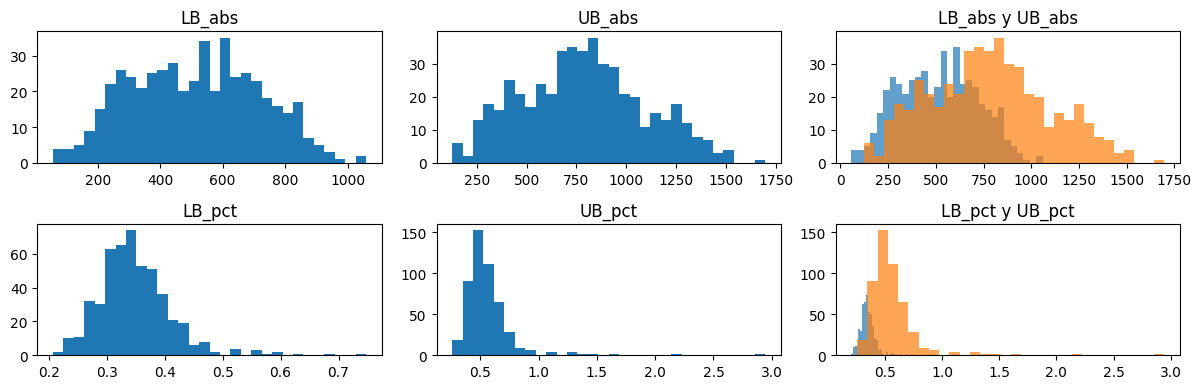

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(12, 4))#, sharex=True)

axes[0,0].hist(LB_abs, bins=30)
axes[0,0].set_title("LB_abs")

axes[0,1].hist(UB_abs, bins=30)
axes[0,1].set_title("UB_abs")

axes[0,2].hist(LB_abs, bins=30, alpha=0.7)
axes[0,2].hist(UB_abs, bins=30, alpha=0.7)
axes[0,2].set_title("LB_abs y UB_abs")

axes[1,0].hist(LB_pct, bins=30)
axes[1,0].set_title("LB_pct")

axes[1,1].hist(UB_pct, bins=30)
axes[1,1].set_title("UB_pct")

axes[1,2].hist(LB_pct, bins=30, alpha=0.7)
axes[1,2].hist(UB_pct, bins=30, alpha=0.7)
axes[1,2].set_title("LB_pct y UB_pct")

plt.tight_layout()
plt.show()

haber con la grafica anterior ya se confirman nuestras sospechas de:
- Los retrasos (UB_abs) tienden a ser más grandes y más dispersos que los recortes (LB_abs).
- La cola derecha de UB_abs es más gorda → más casos (ademas de mas frecuentes) de retraso muy grande que de super–acorte.
- LB tiene casos mucho mas extremos i,e es mas caotico i,e tiene unos super acortes-recortes (casos anomalos) de manera porcentual que absoluta
>(recuerde que procentual permite comparar como seria mas o menos un instante cualquiera de una ruta independientemente de si es larga o no.... por eso es que se visivilizan o cambian cosas de un historgama a otro i,e demas que hubo un super acorte en una corta pero pues casi no se nota porque fue super solo en la corta xD).
  
  Igual UB. Eso si, en ninguno de esos dos casos, son de lo mas frecuente. Tambien note que tanto porcentual como en absoluto UB es por mucho mas caotico-mas outliers que LB

Ahora bien, es notorio, que con lo anterior no podemos hablar de vaijes cortos vs largos (y por eso mismo, no podemos especular sobre como va cambiando la incertidumbre de un caso a otro ni mucho sobre los abanicos y etc) pues metimos todo en el mismo saco -(y que tampoco nisquiera es lo mas adecuado para mirar todos los viajes en general, para eso luegp haremos dispersiones)-, toca por ello, separar:


In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
#
#mean_tt = df_bogota["Mean Travel Time (Seconds)"].astype(float)
#lb      = df_bogota["Range - Lower Bound Travel Time (Seconds)"].astype(float)
#ub      = df_bogota["Range - Upper Bound Travel Time (Seconds)"].astype(float)
#
#UB_abs = ub - mean_tt
#LB_abs = mean_tt - lb
#
#mask_pos = mean_tt > 0
#mean_pos = mean_tt[mask_pos]
#UB_pct   = UB_abs[mask_pos] / mean_pos
#LB_pct   = LB_abs[mask_pos] / mean_pos

# Cuartiles de mean
bins = mean_tt.quantile([0.0, 0.25, 0.5, 0.75, 1.0]).values
labels = ["Q1 corto", "Q2", "Q3", "Q4 largo"]
mean_bin = pd.cut(mean_tt, bins=bins, labels=labels, include_lowest=True)

# DataFrame cómodo para agrupar
df_err = pd.DataFrame({
    "mean": mean_tt,
    "LB_abs": LB_abs,
    "UB_abs": UB_abs,
    "LB_pct": LB_pct,
    "UB_pct": UB_pct,
    "bin": mean_bin
})

df_err

,mean,LB_abs,UB_abs,LB_pct,UB_pct,bin
0,2296,657,919,0.286150,0.400261,Q4 largo
1,1619,562,859,0.347128,0.530574,Q3
2,159,84,175,0.528302,1.100629,Q1 corto
3,754,331,588,0.438992,0.779841,Q1 corto
4,738,232,338,0.314363,0.457995,Q1 corto
...,...,...,...,...,...,...
491,1664,555,830,0.333534,0.498798,Q3
492,2531,714,993,0.282102,0.392335,Q4 largo
493,2363,771,1143,0.326280,0.483707,Q4 largo
494,2871,962,1446,0.335075,0.503657,Q4 largo


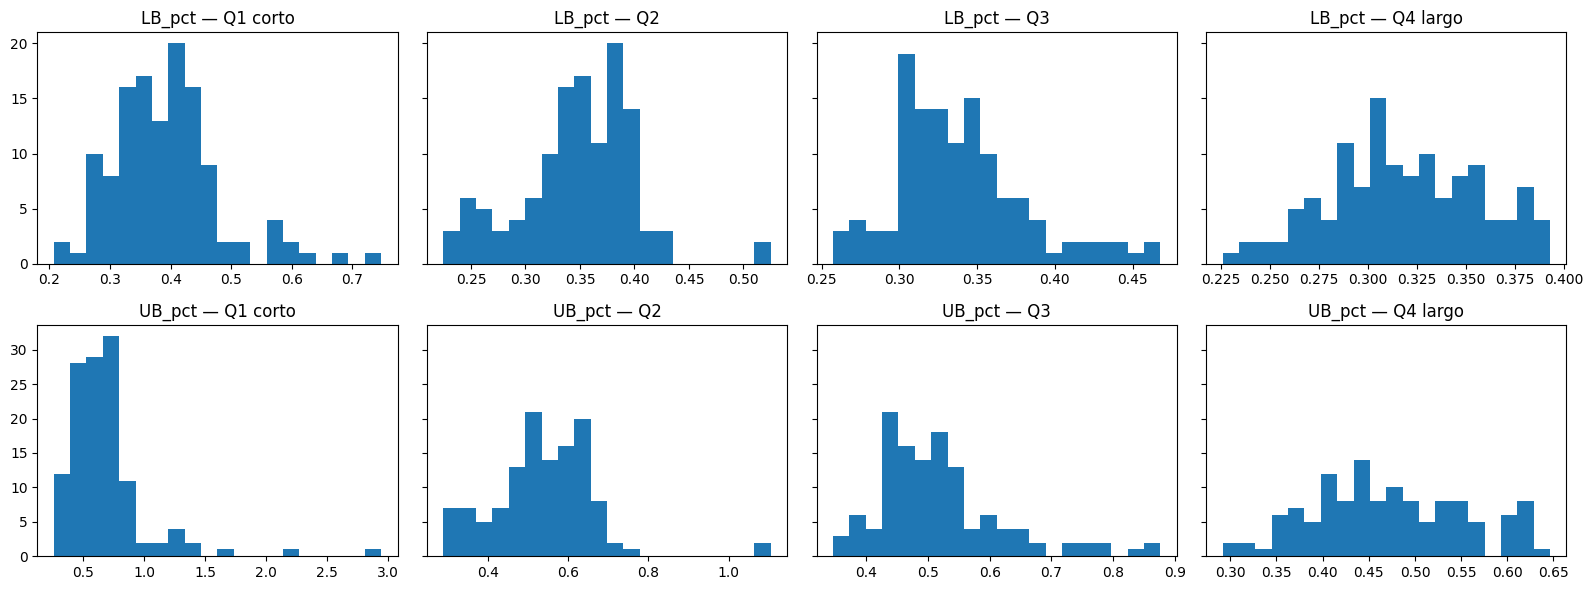

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharey='row')

for i, lbl in enumerate(labels):
    sub = df_err[df_err["bin"] == lbl]

    axes[0, i].hist(sub["LB_pct"], bins=20)
    axes[0, i].set_title(f"LB_pct — {lbl}")

    axes[1, i].hist(sub["UB_pct"], bins=20)
    axes[1, i].set_title(f"UB_pct — {lbl}")

plt.tight_layout()
plt.show()


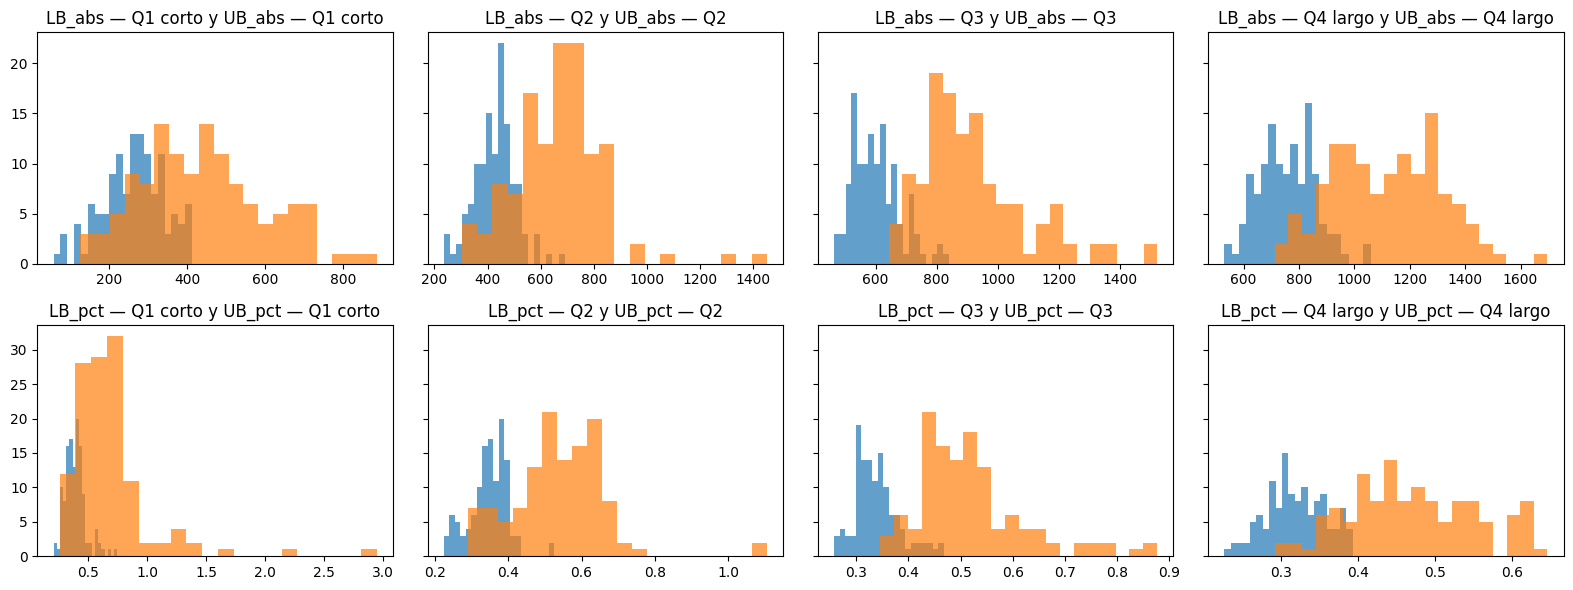

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharey='row')

for i, lbl in enumerate(labels):
    sub = df_err[df_err["bin"] == lbl]

    axes[0, i].hist(sub["LB_abs"], bins=20, alpha=0.7)
    axes[0, i].hist(sub["UB_abs"], bins=20, alpha=0.7)
    axes[0, i].set_title(f"LB_abs — {lbl} y UB_abs — {lbl}")

    axes[1, i].hist(sub["LB_pct"], bins=20, alpha=0.7)
    axes[1, i].hist(sub["UB_pct"], bins=20, alpha=0.7)
    axes[1, i].set_title(f"LB_pct — {lbl} y UB_pct — {lbl}")

plt.tight_layout()
plt.show()

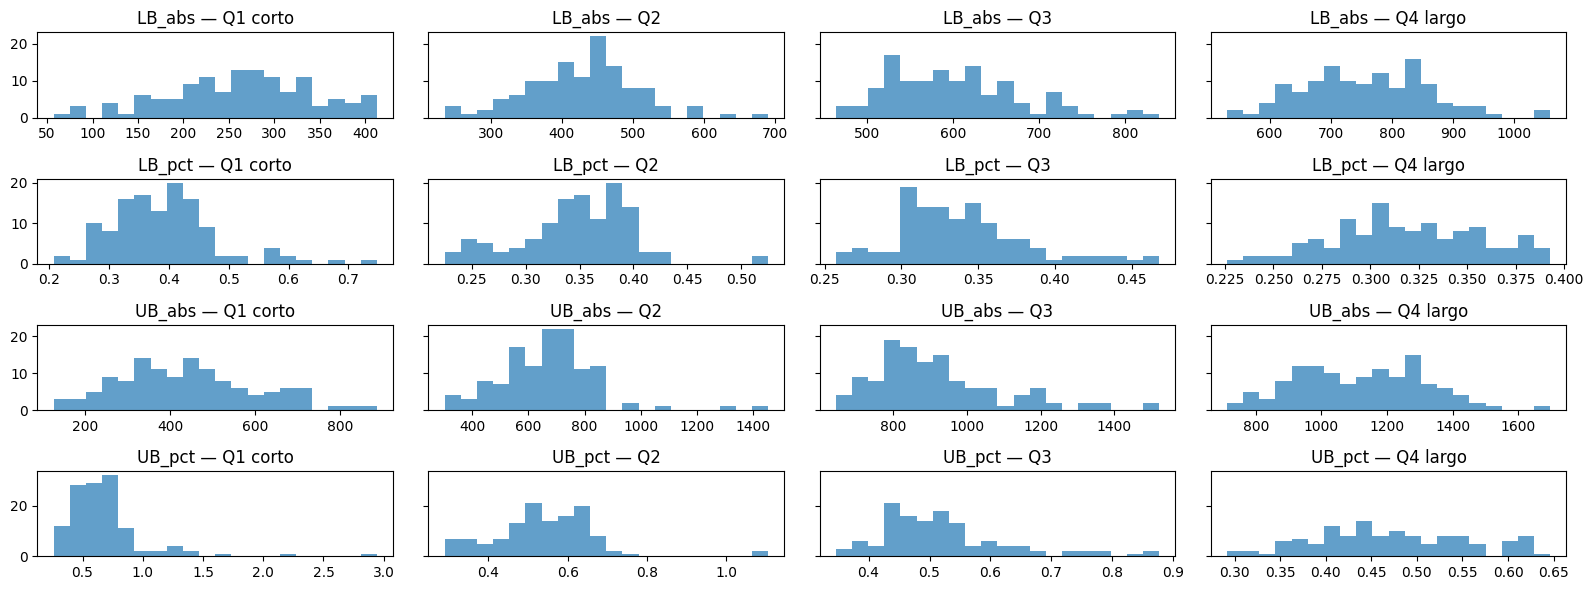

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 6), sharey='row')

for i, lbl in enumerate(labels):
    sub = df_err[df_err["bin"] == lbl]

    axes[0, i].hist(sub["LB_abs"], bins=20, alpha=0.7)
    axes[0, i].set_title(f"LB_abs — {lbl}")

    axes[1, i].hist(sub["LB_pct"], bins=20, alpha=0.7)
    axes[1, i].set_title(f"LB_pct — {lbl}")

    axes[2, i].hist(sub["UB_abs"], bins=20, alpha=0.7)
    axes[2, i].set_title(f"UB_abs — {lbl}")

    axes[3, i].hist(sub["UB_pct"], bins=20, alpha=0.7)
    axes[3, i].set_title(f"UB_pct — {lbl}")

plt.tight_layout()
plt.show()

In [ ]:
def shade_two_zones(ax, vmin, vmed, vmax):
    """
    2 zonas:
      - [vmin, vmed]  -> 'pequeño'
      - [vmed, vmax]  -> 'grande'
    """
    ax.axvspan(vmin, vmed, alpha=0.7)  # zona "pequeña"
    ax.axvspan(vmed, vmax, alpha=0.14)  # zona "grande"

def shade_three_zones(ax, vmin, q1, q2, q3, vmax):
    """
    3 zonas:
      - [vmin, q1] -> muy pequeño
      - [q1, q3]   -> medio
      - [q3, vmax] -> grande
    """
    ax.axvspan(vmin, q1, alpha=0.08)    # muy pequeño
    ax.axvspan(q1, q3, alpha=0.04)      # medio (más clarito)
    ax.axvspan(q3, vmax, alpha=0.13)    # grande



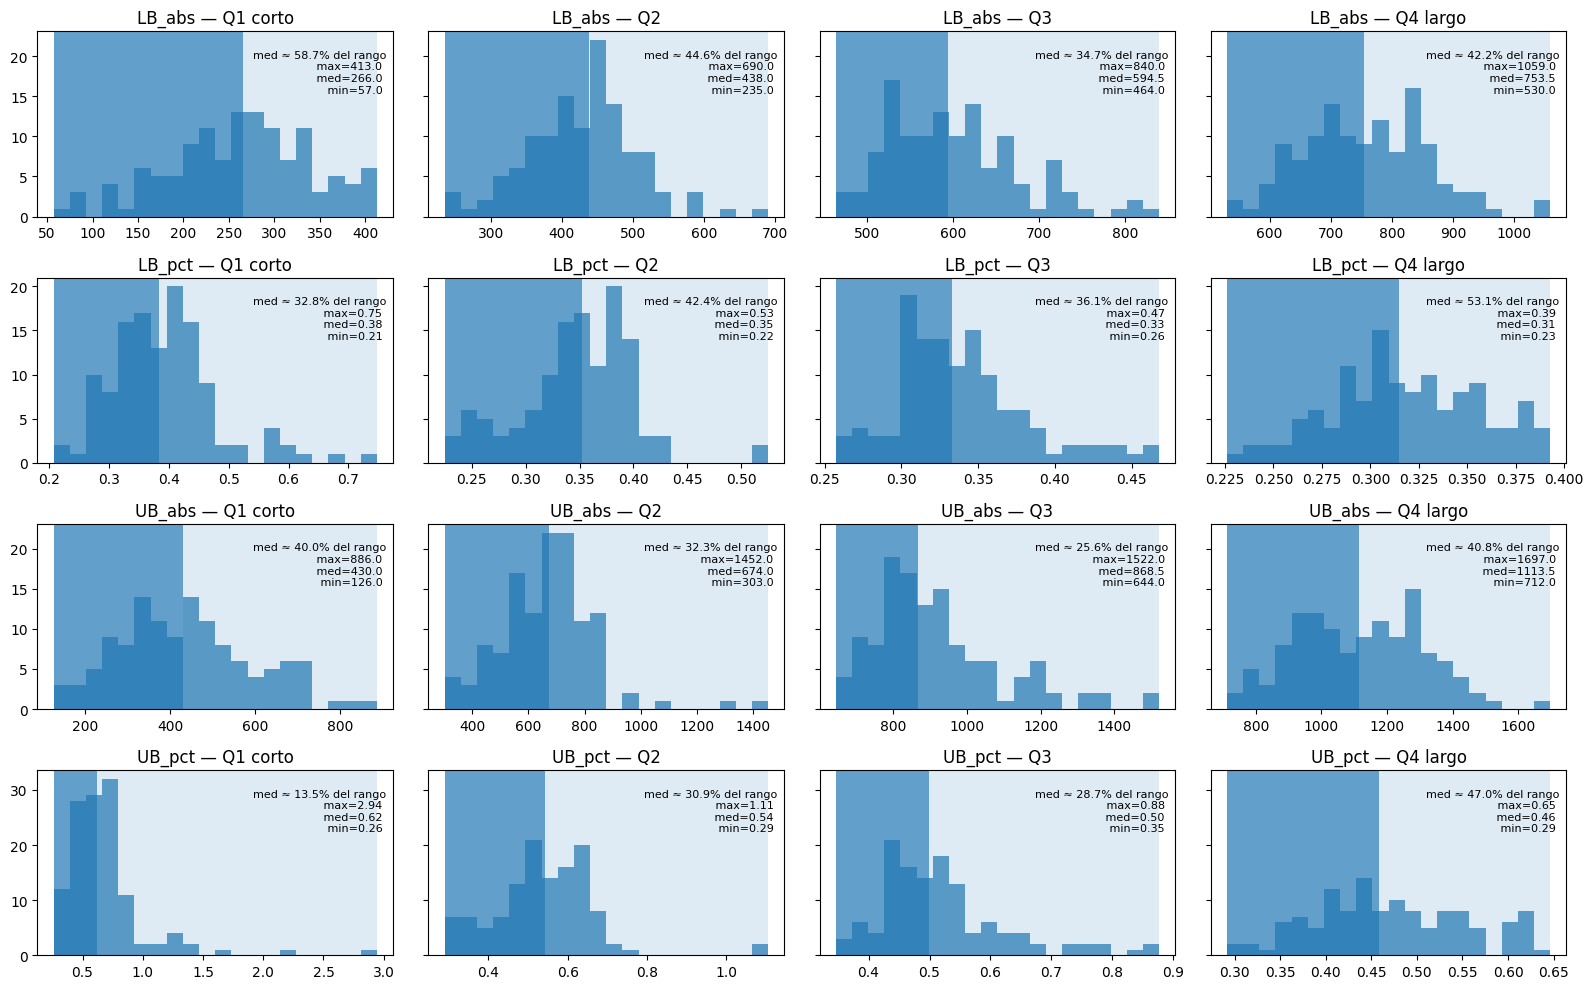

In [ ]:
import matplotlib.pyplot as plt

use_three_zones = False   # pon True si quieres 3 franjas

fig, axes = plt.subplots(4, 4, figsize=(16, 10), sharey='row')

for i, lbl in enumerate(labels):
    sub = df_err[df_err["bin"] == lbl]

    # Nos quedamos solo con valores válidos
    LB_abs_sub = sub["LB_abs"].dropna()
    UB_abs_sub = sub["UB_abs"].dropna()
    LB_pct_sub = sub["LB_pct"].dropna()
    UB_pct_sub = sub["UB_pct"].dropna()

    # --- LB_abs ---
    ax = axes[0, i]
    ax.hist(LB_abs_sub, bins=20, alpha=0.7)
    ax.set_title(f"LB_abs — {lbl}")

    if len(LB_abs_sub) > 0:
        vmin, vmax = LB_abs_sub.min(), LB_abs_sub.max()
        med = LB_abs_sub.quantile(0.5)

        if use_three_zones:
            q = LB_abs_sub.quantile([0.25, 0.5, 0.75])
            shade_three_zones(ax, vmin, q[0.25], q[0.5], q[0.75], vmax)
        else:
            med = LB_abs_sub.quantile(0.5)
            shade_two_zones(ax, vmin, med, vmax)
            ratio = 100 * (med-vmin) / (vmax-vmin)
            ax.text(
                0.98, 0.9,
                f"med ≈ {ratio:.1f}% del rango\n max={vmax:.1f} \n med={med:.1f} \n min={vmin:.1f} ",
                #f"med - min ≈ {ratio:.1f}% del max \n med - min = {med:.1f} - {vmin:.1f} \n max = {vmax:.1f}",
                #f"med - min ({med:.1f} - {vmin:.1f}) ≈ {ratio:.1f}% del max ({vmax:.1f})",
                transform=ax.transAxes,
                ha="right", va="top", fontsize=8
            )

    # --- LB_pct ---
    ax = axes[1, i]
    ax.hist(LB_pct_sub, bins=20, alpha=0.7)
    ax.set_title(f"LB_pct — {lbl}")

    if len(LB_pct_sub) > 0:
        vmin, vmax = LB_pct_sub.min(), LB_pct_sub.max()
        if use_three_zones:
            q = LB_pct_sub.quantile([0.25, 0.5, 0.75])
            shade_three_zones(ax, vmin, q[0.25], q[0.5], q[0.75], vmax)
        else:
            med = LB_pct_sub.quantile(0.5)
            shade_two_zones(ax, vmin, med, vmax)
            ratio = 100 * (med-vmin) / (vmax-vmin)
            ax.text(
                0.98, 0.9,
                f"med ≈ {ratio:.1f}% del rango\n max={vmax:.2f} \n med={med:.2f} \n min={vmin:.2f} ",
                #f"med - min ≈ {ratio:.1f}% del max \n med - min = {med:.1f} - {vmin:.1f} \n max = {vmax:.1f}",
                #f"med - min ({med:.1f} - {vmin:.1f}) ≈ {ratio:.1f}% del max ({vmax:.1f})",
                transform=ax.transAxes,
                ha="right", va="top", fontsize=8
            )

    # --- UB_abs ---
    ax = axes[2, i]
    ax.hist(UB_abs_sub, bins=20, alpha=0.7)
    ax.set_title(f"UB_abs — {lbl}")

    if len(UB_abs_sub) > 0:
        vmin, vmax = UB_abs_sub.min(), UB_abs_sub.max()
        if use_three_zones:
            q = UB_abs_sub.quantile([0.25, 0.5, 0.75])
            shade_three_zones(ax, vmin, q[0.25], q[0.5], q[0.75], vmax)
        else:
            med = UB_abs_sub.quantile(0.5)
            shade_two_zones(ax, vmin, med, vmax)
            ratio = 100 * (med-vmin) / (vmax-vmin)
            ax.text(
                0.98, 0.9,
                f"med ≈ {ratio:.1f}% del rango\n max={vmax:.1f} \n med={med:.1f} \n min={vmin:.1f} ",
                #f"med - min ≈ {ratio:.1f}% del max \n med - min = {med:.1f} - {vmin:.1f} \n max = {vmax:.1f}",
                #f"med - min ({med:.1f} - {vmin:.1f}) ≈ {ratio:.1f}% del max ({vmax:.1f})",
                transform=ax.transAxes,
                ha="right", va="top", fontsize=8
            )

    # --- UB_pct ---
    ax = axes[3, i]
    ax.hist(UB_pct_sub, bins=20, alpha=0.7)
    ax.set_title(f"UB_pct — {lbl}")

    if len(UB_pct_sub) > 0:
        vmin, vmax = UB_pct_sub.min(), UB_pct_sub.max()
        if use_three_zones:
            q = UB_pct_sub.quantile([0.25, 0.5, 0.75])
            shade_three_zones(ax, vmin, q[0.25], q[0.5], q[0.75], vmax)
        else:
            med = UB_pct_sub.quantile(0.5)
            shade_two_zones(ax, vmin, med, vmax)
            ratio = 100 * (med-vmin) / (vmax-vmin)
            ax.text(
                0.98, 0.9,
                f"med ≈ {ratio:.1f}% del rango\n max={vmax:.2f} \n med={med:.2f} \n min={vmin:.2f} ",
                #f"med - min ≈ {ratio:.1f}% del max \n med - min = {med:.1f} - {vmin:.1f} \n max = {vmax:.1f}",
                #f"med - min ({med:.1f} - {vmin:.1f}) ≈ {ratio:.1f}% del max ({vmax:.1f})",
                transform=ax.transAxes,
                ha="right", va="top", fontsize=8
            )

plt.tight_layout()
plt.show()

Parce primero que todo, recuerde que

## Abs:

|       | Pearson | Spearman |
|-------|---------|----------|
| *LB*  | 0,94    | 0,94     |
| *UB*  | 0,84    | 0,86     |

## Relat:

|       | Pearson | Spearman |
|-------|---------|----------|
| *LB*  | -0,47   | -0,44    |
| *UB*  | -0,43   | -0,44    |

note que eso se ve bastante reflejado en la grafica anterior

- Absolutos

  - LB_abs: Pearson ≈ Spearman = 0.94
    → relación fuerte y bastante lineal (abanico, pero alineado con una recta..... note que para los diferentes tiemp-viaj promd las disbtribuciones y medianas son bastantes simetricas y centradas i,e es bastante equilibrado y va aumentando el dominio de manera consistente).

    Eso se ve en los hist:

    - Todos los cuartiles tienen dispersión creciente, pero “ordenada”.

    - No parece haber una cola súper loca que rompa la linealidad.

  - UB_abs: Pearson 0.84 < Spearman 0.86
    → sigue siendo monótono fuerte (Spearman alto), pero algo menos lineal, con algo de curvatura / outliers (abanico más distorsionado).

    Eso cuadra con:

    - Histogramas de UB_abs mucho más largos y con colas más gordas.

    - Más “picos raros” de retrasos grandes ⇒ Pearson sufre un poco más.

  Traducción abanico:
  LB_abs vs mean_tt → abanico relativamente limpio;
  UB_abs vs mean_tt → abanico más abierto y con cola más gorda arriba.

- Relativos

  En ambos casos, los coeficientes son negativos:

      A mayor mean_tt, menor error relativo → abanico que se cierra.

  - LB_pct: Pearson = -0.47, Spearman = -0.44
    → relación monótona fuerte, pero con algo de curvatura (por eso no son idénticos).

    Histogramas:

    - Pasas de Q1 súper disperso y alto → a Q4 mucho más concentrado y bajo.

    - El “cierre de abanico” es brutal en LB_pct → eso es coherente con un coeficiente más fuerte en magnitud (-0.47)..... -la dispersion pega una bajada fuerte ayudando a la linealidad, la cual ya de por si parece estar porque vea que si bien empezamos algo sesgados, luego esto baja y ademas la mediana luego pa delante no varia tanto-

  - UB_pct: Pearson ~ -0.43, Spearman ~ -0.44
    → relación parecida en forma, menos diferencia entre lineal vs. rank.

    Histogramas:

    - También se cierran con mean, pero menos dramático que LB_pct.

    - La dispersión relativa de UB_pct sigue siendo notable aun en viajes largos.

Otras conclusiones que se reafirman:

- Mixto aditivo + multiplicativo

  - Absolutos crecen con mean (heterocedasticidad).

  - Relativos decrecen con mean, sobre todo en LB_pct → posiblemente evidencia de overhead fijo fuerte (aun asi posiblmente no es tan grande como el de los UB) y de componente multiplicativa o dependiente del tiemp.viaj promd debil
    - ademas de que decrece con mean, como uniformiza las distrbuciones tanto para LB_pct como UB_pct, en el sentido de que quita sesgos y la frec's tmabien se aplanan, y lo sorprendete es que eso pasa mas en UB que en LB
  
  - El hecho de que el “cierre de abanico” sea más fuerte para LB_pct que para UB_pct sugiere:

    - la parte aditiva de LB es importante en cortos pero se vuelve muy poco relevante en largos;

    - UB, en cambio, siempre hereda esa combinación de “un poco aditivo + bastante multiplicativo + eventos raros” → su relativa nunca cae tanto.

- LB “caótico” en porcentual para viajes cortos, pero ordenado en largos

  - Justo lo que muestran los histogramas de LB_pct por cuartiles temporales, de modo que queda justificado el nacimiento del drop en el relativo que no esta en el absoluto..... tambien se observa como en el absoluto es super organizado y no tiene ouliers asi fuertes (respectando linealidad y monotonia) pero en el drop de lo realtivo el origen a los drops es precisamente debido a que la dispersion pierde mas monotonia que linealidad.... eso se ve reflejado mas o menos en que la media baja bien, respectando un linealidad, y la dipsersion que tiene forma de abanico, aunque no tan simetrica como habia supuesto tambien, eso si, el abanico si baja de forma simetrica, no tanto su forma sino como baja, lo que permite respetar linealidad, pero pero pero cuando baja el abanico en la parte inferior tiene una ruptura de monotonia i,e mete un brinquito, un sube y baja que si bien no daña tanto linealidad posiblmente puede que si sea lo que afecta monotonia.... ese brinquito abajo tambien se ve en UB_pct, el motivo por el que UB_pct no es menos lineal se puede ver reflejado en paret en la media, se ve como el abanico de el coge pa arriba al incio i,e curvatura-outliers.......... Nota: digo que se ve mas o menos, porque la media se relaciona mas o menos con por donde pasa la recta que podria ajustar-fitear los datos)

    GPT es todo bien hablado, mira como se expreso el de lo del brinquito

    > el drop en el relativo parece venir de pequeñas desviaciones de la tendencia monótona en la parte baja del abanico: la nube no se rompe en mil pedazos, pero sí muestra curvas y ligeros “brincos” locales que Pearson tolera mejor en este caso-escenario que Spearman.

- UB más pesado y más “caótico” que LB en general

  - UB_abs siempre está más a la derecha y más amplio (i,e siempre son super probables los retrasos mas grandes y ademas hay posibilidades de arisquisimos-estos existen).

  - UB_pct mantiene porcentajes altos incluso en viajes largos, eso muestra que la multiplicativa de el o el termino que depende del tiemp.viaj promd es mas fuerte que la de LB..... y en viajes cortos donde el multiplicativo o denepndiente del tiemp.viaje promd casi no influye i,e deberia mandar el aditivo, UB_pct tiene un rango y frecuencias mucho mas grandes i,e el aditivo tambien es mas fuerte que el de LB

- Viajes cortos son frágiles porcentualmente

  - Pequeños cambios absolutos (semáforo, arranque) → % enorme,

  - Lo que se ve en la forma de LB_pct y UB_pct en Q1.

- note que en general UB_abs dentro de si es mas desbalanceado-asimetrico que LB_abs, pero en ambos casos parece prevalecer o dominar mas los acortes-recortes grandes y los retrasos grandes

  > (que los pequeños aunque no por mucho i,e hay una menor variedad de valores-tipos pequeños, se apelmasan muy cerca del tiempo de viaj promed, que de grandes que por eso esas colotas.... i,e aunque tenemos que la mitad de nuestros eventos son pequeños y la otra mitad restante son grandes, la mitad de peuqeños son menos variados que la mitad restantes de grandes, lo cual los hace mas caoticos.... i,e a nivel de prob son igual de probables que pase pequeños o grandes pero la cosa es que en grande hay unos muy alocados i,e se abre la posibilidad con buena probabilidad-50% que pasen muy alocados mientras que con buena probabilidad-50% no hay posibilidad de pequeños muy alocados pues directamente no estan, los pequeños no son alocados)..... gpt dice que es bueno que recuerde que "por construcción, alrededor de la mediana, la mitad de los casos cae en la zona de recortes/retrasos “pequeños” y la otra mitad en la de recortes/retrasos “grandes” -(i,e que via la mediana definimos que es pequeño y que es grande para la categroria recorte i,e LB y retraso i,e UB)-; lo llamativo no es la probabilidad total (50–50), sino que dentro de la mitad de “grandes” hay valores muchísimo más extremos y variados que dentro de la mitad de “pequeños”."

  Y ademas ya mirando la asimetria respecto al rango completo respecto a la media i,e [LB,UB], notamos que los eventos de UB_abs estan en mayor cantidad y son mas extremos que los de LB_abs.........

    puntualicemos un poco mas esto:

    - **a)** LB_abs vs UB_abs (asimetría interna)

      Mirando los números de la figura:

      - LB_abs

        La mediana suele andar por ~35–60 % del rango [min, max] en los 4 cuartiles.

        → O sea, está más cerca del centro del rango: distribuciones algo sesgadas, pero relativamente equilibradas.

      - UB_abs

        La mediana está más bien entre ~25–40 % del rango.

        → Eso significa que la mayor parte de las observaciones está más concentrada hacia la parte baja del rango, mientras que el tramo entre la mediana y el máximo es bastante más largo. En otras palabras, hay una cola alargada hacia valores de retraso grandes que estira el máximo, aunque sin que podamos decir cuántos puntos hay exactamente en esa cola.

      Eso respalda muy bien una frase tipo:

      > Dentro de cada cuartil, LB_abs tiende a tener la mediana relativamente cerca del centro del rango, mientras que en UB_abs la mediana se ubica sistemáticamente más cerca del mínimo. Eso indica que la masa de probabilidad de UB_abs está concentrada en retrasos moderados, con una cola alargada hacia retrasos muy grandes que estira el máximo: UB_abs es internamente más asimétrico que LB_abs.

    - **b)** LB_pct vs UB_pct (cierre de abanico en relativo)

      Los números también dicen algo bonito:

      - Q1 (viajes cortos)

        LB_pct: med ≈ 33 % del rango

        UB_pct: med ≈ 13 % del rango

        → Para viajes cortos, UB_pct está fuertemente sesgado a la derecha: gran parte de la masa se acumula cerca del valor mínimo del rango, y el resto del intervalo hacia el máximo queda ocupado por una cola larga de retrasos relativos muy grandes que estiran el extremo superior.

        LB_pct también está sesgado, pero menos: su mediana ya está más “metida” en el rango.

      - Q4 (viajes largos)

        LB_pct: med ≈ 53 % del rango

        UB_pct: med ≈ 47 % del rango

        → Para viajes largos, las medianas de LB_pct y UB_pct casi se centran en su rango: las colas siguen existiendo, pero la asimetría se atenúa, el abanico está “casi cerrado”.

        Eso conecta directo con tus frases sobre:

        - “LB_pct súper caótico en corto pero ordenado en largo”.

        - “UB nunca termina de estabilizarse del todo”.

        >Si miramos dónde cae la mediana como % del rango, en los viajes cortos (Q1) UB_pct tiene la mediana cerca del inicio del rango (\~13 %), mientras que LB_pct ya está alrededor del 33 %. Es decir, en viajes cortos los retrasos relativos tienen una cola derecha muy alargada que estira el máximo, mientras que los acortes relativos son algo más equilibrados. En viajes largos (Q4), las medianas de LB_pct y UB_pct se mueven hacia el centro del rango (~53 % y ~47 %), lo que cuadra con la idea de que el abanico relativo se cierra: la asimetría se reduce con la longitud del viaje, aunque UB sigue cargando con colas más gordas.

En resumen:
- En cortos: domina un término aditivo fuerte (overhead), que hace que los porcentajes vuelen.
- En largos: domina un término multiplicativo (tramos + congestión acumulada), que hace que los errores absolutos crezcan con el tiempo medio, pero los porcentuales se estabilicen.
- UB mezcla eso con una cola de eventos raros más agresiva, por eso sus histogramas y correlaciones se ven más “desordenados” que los de LB.
> “El lado izquierdo del intervalo (LB) parece estar más gobernado por micro-oportunidades locales que se diluyen con la distancia; el lado derecho (UB) carga con la acumulación de congestionamientos y eventos raros, que parece nunca termina de estabilizarse (a diferencia de LB) tanto-del todo, especialmente en rutas largas.
- Componentes del error:
  - sospechamos que hay aditiva por el cambio de tendencia positiva en las correlaciones de UB_abs y LB_abs con el tiemp.viaj a negativa en las correlaciones de UB_abs_pct y LB_abs_pct, aca lo pudimos ver graficamente. Tambien notamos que para viajes cortos tanto UB como LB son por instante mas caoticas que en vaijes largos, lo que posibilita pensar que la componente aditiva es ademas grande en ambos casos, aunque tmabien vimos que mas grande en UB que en LB posiblemente (aunque en ambos casos, se diluye a mas largo el viaje i,e maybe domina en cortos en el resto domina multiplicativos-en general cosas que depende del tiemp.viaj promed.... note que en las graficas son re abiertos los abnicos al incio)
  - sospechamos que hay una componente multiplicativa por la heterocedasticidad presente en tanto en UB_abs como en LB_abs, eso lo vimos primero en las correlaciones de UB_abs y LB_abs con el tiemp.viaj a negativa, y aca se repite-confirma graficamente....... ahora, en cuanto a la forma particular, hay varias cositas
    - en las correlaciones de UB_abs y LB_abs con el tiemp.viaj al hacer Pearson y Spearman bimos que en UB_abs hay un drop de Spearman → Pearson lo cual indica que es mas monotona que lineal i,e hay curvatura o outliers i,e existe la posibilidad (con lo cual no quiero decir que necesariamente vaya a ser asi) de que la componente multiplicativa no sea lineal sino de otro orden i,e no solo outliers sino tmabien curvatura como tal. Aca verificamos graficamente que muy posiblmente se deba a retrasos grandes mas que a retrasos atipicos i,e la curvatura o outliers cogen para arriba y no para abajo i,e en dado caso sea verdad que la componente multiplicativa tenga curvatura i,e sea no lineal (y no solo se deba exclusivamente a outliers), entonces tendria que ser de exponente no negativo para tener las monotonia creciente.
  
    - Tambie, ese drop, en la version relativa se preserva pero se amortigua i,e aminoran, lo cual puede que apoye la version de que la componente multiplicaitva tenga curvatura (no solo outliers) i,e no sea lineal (pues todavia sobrevivira una curvatura mas suave)..... pero, tenemos un inconvenente y es que dijimos que la componente multiplicativa si no era lineal existia (hay curvatura y no solo outliers) entonces debe de ser monotona creciente pues el abanico abre para arriba, en dado caso su exponente tendria que ser 2,3,... pero segun las correlaciones relativas, eso no es verdad porque la tendencia en estas es negativa (eso tambien se refleja en las graficas que obtuvimos), luego, se sigue que posiblemente no sea tanto por una curvatura, sino mas bien por ouliers y que la componente multiplicativa sea de exponente $\in$ (0,1) pues negativo no puede ser porque entonces la heterocedasticidad que? y lineal es poco plausible pues no da fe de la tendencia negativa de las reltivas, pues nos daria cte y la correlacion no es tan bajita o cercana a cero como para decir eso (tendria pues que haber un mecanismo o otra componente que haga que esa cte aminore)

    sospecho por ello que tanto para UB como para LB la componente multiplictiva es de exponente $\in$ (0,1) o menos plausiblmente-casi descartado lineal (y que mas que curvatura lo mas probable es que se trate de meros ouliers)..... lo de exponente $\in$ (0,1) es incluso congruente con que UB_abs_pct y LB_abs_pct luego para viajes largos den pie a distribuciones menos segadas y que en cortos den pie a distrbuciones mas sesgadas segun lo que vimos en las graficas (pues al divir por mean una expresion como mean^{algo} con algo $\in$ (0,1), queda mean^{algo}/mean = mean^{algo-1} = mean^{-algo'} con algo' $\in$ (0,1) i,e una exponencial decreciente i,e monotona descreciente)..... pues en viajes largos manda la multipicativa, pero esta procentualmente es decreciente y ademas radical, por lo que esta ya muy estable y genera valores no muy altos-extremos, mientras que en viajes cortos manda la aditiva pero la multiplicaitva tambien aporta y vea que ambas son exponenciales negativos (y=1/x^n) los cuales a medida que uno va para el cero (x->0), toman valores cada vez mas grandes hasta infinito (y->inf), de alli que en cortos haya tanto caos y sesgo -idk si a las componentes se les pueda asociar una distrbucion, de manera que a veces pa unos vaijes apliquen y pa otros no o idk i,e que a veces la componente se active y a veces no.... en uno de los ejm's planteamos terminos asi, pero idk-

    P.D: EL drop que nace para LB en relativas (pues en abs no hay) como es Pearson → Spearman da pie de que hay mas linealidad que monotonia, por lo que no es evidencia de componente multiplicativa a diferencia de Spearman → Pearson que es pista de mas montonia que linealidad...... de modo que ese drop solo indica que la dispersion se esta dando de tal forma que daña la monotonia pero preserva la linealidad, incialmente yo habia especulado que entonces se trataba de un abanico simetrico, pero de las graficas extraigo que no hay necesidad de que sea tan simetrica as long as sea lineal y que lo que dañaria la monotonia seria que fuera un abanico con mordidas xD i,e salticos porque en particular vi esto para la parte de abajo del abanico tanto en UB como e LB (de ahi que ambos sean -0.44, sino que ademas UB rompe la linealidad porque no se cierra tan agresivamente el abanico y porque la mediana le pega botes i,e no sigue la tendencia mas lineal que si sigue mas por ejm la mediana de LB)


    >gpt me dijo que mi argumento fue algo desordenado sobre lo multiplicativo, yo se que no, pero bueno, maybe es porque quice demostrar al mismo tiempo de que el exponente esta entre 0 y 1 que ademas no hay tanto curvatura sino mas bien outliers (que eso es lo que parece ser, aun falta fitear pa asegurar al 100%)..... el caso, es que el quiso organizar bonito lo primero y asi quedo -esto si es un super detalle i,e super sobra, o sea, no pasa nada si no lees esto, aca no hay nada extra, solo que valoro un poquito que lo haya intentado copiar mas bonito-:
    >
    > Si pensamos en un modelo tipo:
    >
    > UB_abs ∝ mean^α
    >
    > entonces tus datos sugieren algo de este estilo:
    > - El absoluto crece con mean → α > 0.
    > - El relativo UB_pct = UB_abs / mean ∝ mean^(α − 1) disminuye con mean → α − 1 < 0, es decir 0 < α < 1.
    >
    > No lo estamos estimando formalmente, pero fenomenológicamente cuadra bien con lo que ves:
    > - En cortos, el error relativo es grande (el exponente efectivo todavía no “aplasta” el overhead).
    > - En largos, el error absoluto sigue creciendo con mean, pero el relativo se estabiliza o baja → típico comportamiento de algo sublineal mezclado con un término aditivo.
    >
    > Es decir, es muy razonable sospechar que tanto para UB_abs como para LB_abs la componente multiplicativa se comporta como un exponente efectivo α ∈ (0,1) mezclado con una parte aditiva, más que como un ruido puramente lineal (α = 1) o algo exótico con exponente negativo.
    >
    > Eso también es congruente con lo que vimos en las distribuciones de UB_pct y LB_pct por cuartiles:
    > - En viajes cortos, los relativos están muy sesgados y con colas fuertes.
    > - En viajes largos, los relativos se vuelven mucho menos sesgados y más “compactos”.
    >
    > Al dividir un término tipo mean^α con α ∈ (0,1) entre mean, obtenemos algo como mean^(α − 1) con exponente negativo, que es justamente una función decreciente en mean: eso da la caída de los errores relativos.

Ahora bien, antes de spoilearnos con el grafico de la dispersion (y despues regresiones), sigamos mirando con cosas no tan explictas para ver si nos obligamos a rezonar un poco mas, ahora vamos a mirar ya no solo dentro de los intervalos UB_abs, LB_bas, UB_abs_pct y LB_bas_pct, sino tomando el intervalo completo respecto a la media i,e [LB, UB] y su porcentual, para verficar bien bien o de manera mas explicita la asimtria dentro del rango completo, la cual pues ya vimos con los resultados anteriores, pero eso, mejor una manera mas explicita para terminar de confirmar (el comportamiento de eventos retrasantes y recortantes-acortantes, fenomenologia de estos y que dice eso sobre las componentes aditivas y multplicativas-o en general dependientes del tiempo i,e sobre su forma ya no tanto existencia aunque tmabien deberia relatar sobre esto, y maybe tambien diga algo o explique algo sobre los drop de las correlaciones anteriores, aunque ya las tenemos mas o menos bien pintadas)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_bogota.select_dtypes(include='number')
numeric_df.drop('Origin Movement ID', axis=1, inplace=True)  #-recuerde que el calculo da NaN pues tiene regsitros cte's (y concpetualmete se dice-intuye que es
                                                             #  cero pues una costante va a su bola.... pero igual yo digo que via derivadas maybe uno puede
                                                             #  justificar-forzar eso i,e congurnte-consistencia con el calculo si se dfn como cero no?)-

In [ ]:
# ====== Métricas de spread-separacion y asimetría: considerando toooodo el intervalo i,e UB mas LB (asimetría del intervalo completo respecto a la media) ======

# Cast a float por si vienen como int64 (no lo hice xD)
mean_tt = numeric_df["Mean Travel Time (Seconds)"].replace(0, np.nan)  # por si acaso -no necesario porque ya mire que no habian NaN's pero ok-
lb      = numeric_df["Range - Lower Bound Travel Time (Seconds)"]
ub      = numeric_df["Range - Upper Bound Travel Time (Seconds)"]

spread_abs = ub - lb
spread_pct = spread_abs / mean_tt
asym_abs = (ub - mean_tt) - (mean_tt - lb)           # = (ub + lb) - 2*mean = UB_abs - LB_abs
asym_pct = asym_abs / mean_tt

cfg_spread_asym = pd.DataFrame({
    "Destination Movement ID": numeric_df["Destination Movement ID"],
    "Mean Travel Time (Seconds)": mean_tt,
    "spread_abs": spread_abs,  #separacion absoluta
    "spread_pct": spread_pct,  #separacion absoluta porcentual
    "asym_abs":  asym_abs,     #asimetria absoluto
    "asym_pct":  asym_pct,     #asimetria absoluto porcentual
})

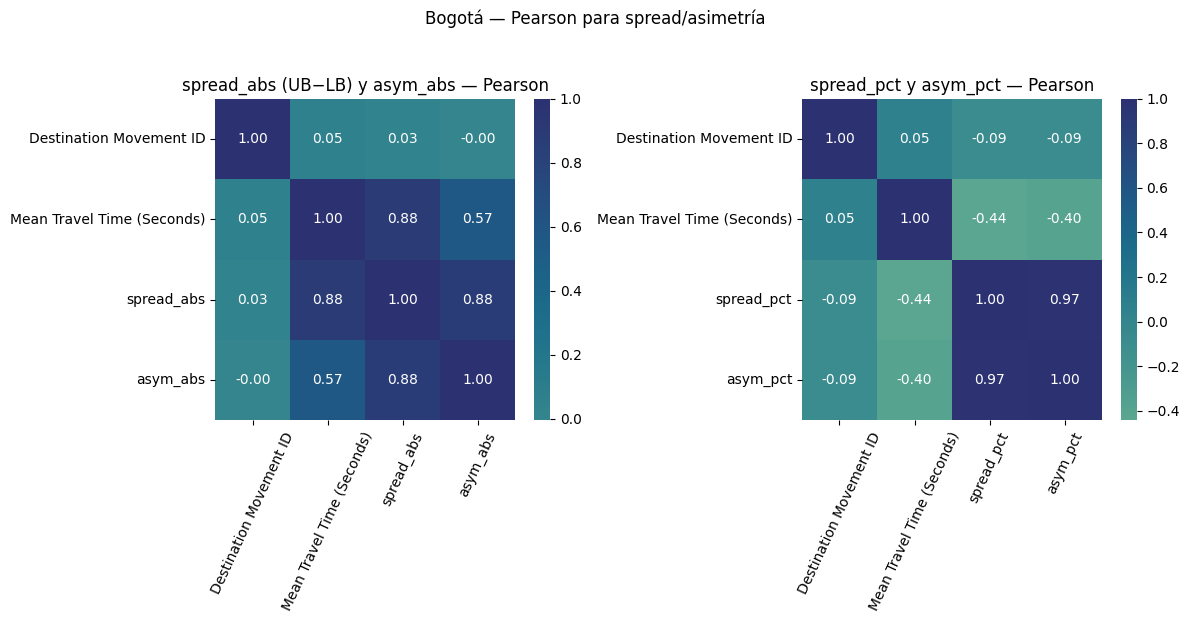

In [ ]:
# ======  PEARSON (spread/asimetría) ======
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, cols, title in zip(
    axes,
    [["Destination Movement ID","Mean Travel Time (Seconds)","spread_abs","asym_abs"],
     ["Destination Movement ID","Mean Travel Time (Seconds)","spread_pct","asym_pct"]],
    ["spread_abs (UB−LB) y asym_abs", "spread_pct y asym_pct"]
):
    c = cfg_spread_asym[cols].replace([np.inf, -np.inf], np.nan).dropna().corr()
    sns.heatmap(c, ax=ax, annot=True, fmt=".2f", cmap="crest", center=0)
    ax.set_title(f"{title} — Pearson"); ax.tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Pearson para spread/asimetría", y=1.03)
plt.tight_layout(); plt.show()

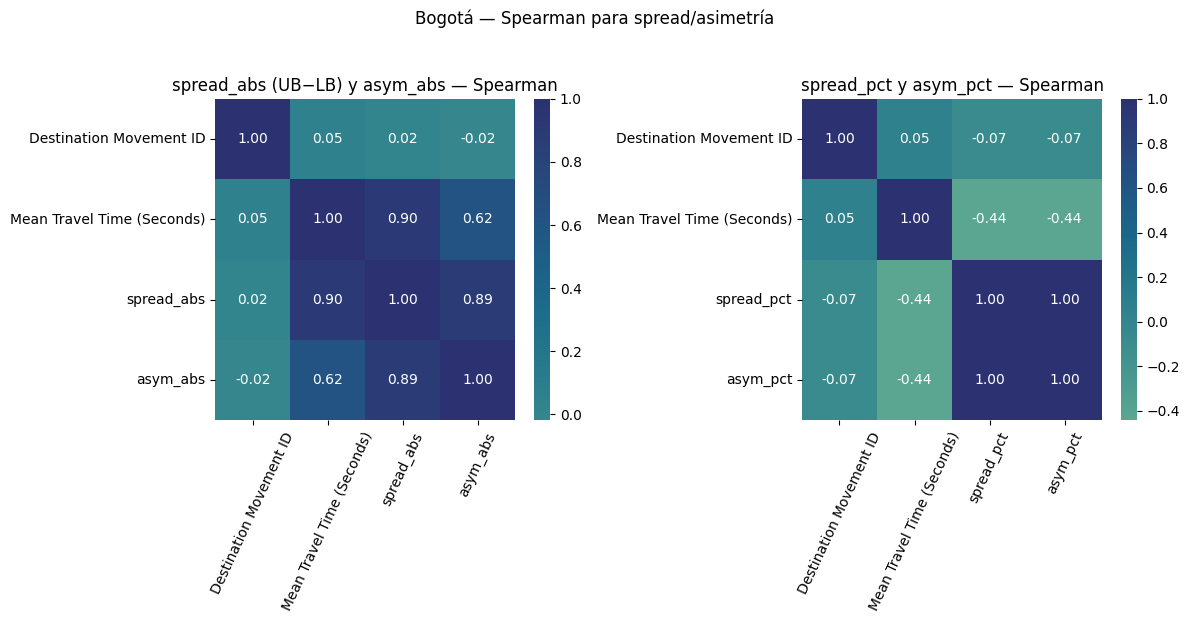

In [ ]:
# ====== SPEARMAN (spread/asimetría) ======
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, cols, title in zip(
    axes,
    [["Destination Movement ID","Mean Travel Time (Seconds)","spread_abs","asym_abs"],
     ["Destination Movement ID","Mean Travel Time (Seconds)","spread_pct","asym_pct"]],
    ["spread_abs (UB−LB) y asym_abs", "spread_pct y asym_pct"]
):
    c = cfg_spread_asym[cols].replace([np.inf, -np.inf], np.nan).dropna().corr(method="spearman")
    sns.heatmap(c, ax=ax, annot=True, fmt=".2f", cmap="crest", center=0)
    ax.set_title(f"{title} — Spearman"); ax.tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Spearman para spread/asimetría", y=1.03)
plt.tight_layout(); plt.show()

Bueno **antes de empezar** con la lectura de estas graficas, **quiero mencionar algo que he pasado por alto**, y que he dicho pero no de manera directa ni dedicandole el tiempo, y es, ¿porque supongo que la curvatura/ouliers estan arriba (al final de la recta-dispersion) en el absoluto y no abajo (al incio de la recta-dispersion)? la razon por la que sospecho esto, es porque literal amiginese los dos casos
- uno donde hay outliers/curvatura en el absoluto en viajes cortos-al incio de la dispersion
- y otro donde hay outliers/curvatura en el absoluto en viajes largos-al final de la dispersion

entonces recuerde que otra cosa que cumplen los dos anteriores es que hay heterocedasticidad (debido a la correlacion postiva en UB_abs y LB_abs), por lo que la dispersion tiene forma de abanico-trompeta que se abre al final de la dispersion. Luego

- en el primer caso, la trompeta tiene una mordida o torcedura o irregularidad en su parte recta
- en el segundo caso, la tromepta tiene torcida su parte final, hacia arriba, hacia abajo, pero anteriormente ya confirmamos que para arriba si ese fuese el caso pues LB_abs es homogene-bien comportado y UB_abs es segado tq hay mas retrasos grandes que pequeños y verificamos que parece qser que la mayoria del tiempo UB_abs es mas grande-variado que LB_abs....... de hecho con los graficos recien hechos, esto queda 100% confirmado, pero luego hablaremos mas de ello

Debido a que Spearman es tan alto, se sigue que una mordida en la parte recta de la trompeta-abanico (antes de abrirse) no puede ser pues seria una afectacion a la monotonia y no solo a la linealidad, luego, concluimos que lo mas probable es que se deba a que el abanico se abre de manera asimetrica i,e que la parte final-ancha de la tromepta esta trocida y que eso se da pa arriba.

**Empecemos asi pues con lo que podemos decir de estas dos ultimas graficas**
1. Qué cuentan los absolutos (spread_abs, asym_abs)

    Valores clave (Pearson / Spearman):
    - Corr(mean, spread_abs) ≈ 0.88 / 0.90
    - Corr(mean, asym_abs) ≈ 0.57 / 0.62
    - Corr(spread_abs, asym_abs) ≈ 0.88 / 0.89

    Lectura:

    1. El ancho total del intervalo (UB−LB) crece casi linealmente con el tiempo medio
        - Correlaciones ~0.9, Pearson ≈ Spearman → relación muy monótona y casi lineal.

        - Traducción: rutas más largas ⇒ bandas de incertidumbre más anchas en minutos.

        - Esto refuerza full la parte multiplicativa/ligada a escala: a mayor viaje, más “espacio” para que se abra el intervalo.

    2. La asimetría absoluta también crece con el tiempo medio, pero menos fuerte

        - 0.57–0.62 es “fuerte pero no brutal”.

        - Fenomenológicamente: la mayor parte de la expansión del intervalo con la distancia es relativamente “simétrica” (crecen UB_abs y LB_abs), pero hay un componente sistemático que empuja un poco más hacia arriba (UB) que hacia abajo (LB).

    3. spread_abs y asym_abs se mueven casi juntos

        - Corr ≈ 0.88–0.89.

        - Cuando el intervalo se ensancha (más spread_abs), también tiende a volverse más desbalanceado (más asym_abs).

        - Traducción tráfico: cuando el rango de posibles tiempos se agranda, no lo hace de forma neutral; la parte extra de “incertidumbre” se va sobre todo al lado de los retrasos, no al de llegar antes.

    4. Pearson ≈ Spearman en todo esto

        - No hay el tipo de “drop raro” que vimos en UB vs mean.

        - La historia aquí es más suave: una relación bastante regular, sin unos poquitos puntos locos rompiendo la linealidad global.

2. Qué cuentan los relativos (spread_pct, asym_pct)

    Valores clave:
    - Corr(mean, spread_pct) ≈ -0.44 (Pearson) / -0.44 (Spearman)
    - Corr(mean, asym_pct) ≈ -0.40 (Pearson) / -0.44 (Spearman)
    - Corr(spread_pct, asym_pct) ≈ 0.97 (Pearson) / 1.00 (Spearman)

    Lectura:

    1. El ancho relativo del intervalo baja con el tiempo medio

        - Correlaciones negativas moderadas (~-0.44).

        - Es decir: viajes cortos → intervalo porcentual enorme; viajes largos → intervalo porcentual más estrecho.

        - Esto es la firma de la componente aditiva grande en cortos (i,e grande posiblemente per se y mas grande que la multiplicativa i,e en ese regimen domina.... pues es 1/x mientras la aditiva sera 1/x^algo con algo postivo real): el mismo “overhead” fijo (semaforito, arranque, etc.) pesa muchísimo más en 5 min que en 40 min -(recuerde que la opcion de componente lineal gaussina o uniforme o etc puede ser i,e que no descartamos que las componentes tengan una distrbucion o no sabemos si meter ese tipo de variaciones en un ruido, el caso es que puede ser pues)-.

    2. La asimetría relativa baja al mismo ritmo que el ancho relativo
        - Corr(mean, asym_pct) es casi la misma que corr(mean, spread_pct).

        - Traducción: a medida que el intervalo porcentual se hace más chiquito, también se “acomoda” un poco mejor alrededor de la media. Los viajes largos no solo tienen menos % de incertidumbre, sino que además son algo menos sesgados hacia los retrasos (aunque la preferencia por el lado UB nunca desaparece del todo).

    3. spread_pct y asym_pct son casi la misma película

        - Corr ≈ 0.97–1.00 → prácticamente lineales.

        - Esto sugiere que, una vez normalizas por la media, la asimetría es casi un múltiplo fijo del spread:

          >“De todo el ancho relativo del intervalo, una fracción bastante estable corresponde a ‘extra retraso’ frente a ‘extra recorte’.”

        - O sea, la estructura de que UB pese más que LB es muy estable en términos porcentuales; lo que cambia con la distancia es el tamaño total del pastel, no tanto cómo se reparte entre LB y UB.

3. Cómo se conecta con todo lo que ya habías contado

    - Aditivo + multiplicativo:

      - Multiplicativo: spread_abs crece casi lineal con mean → más distancia, más rango absoluto (ban¬dón abierto).

      - Aditivo: spread_pct y asym_pct caen con mean → en porcentajes, la incertidumbre es muchísimo más salvaje en viajes cortos -(y el mutiplicativo tambien aporta debido a que queda como una exponencial decreciente al dividir por mean)-.

    - UB vs LB como “lado pesado” del intervalo:

      - asym_abs correlacionado con spread_abs → cuando el intervalo se infla, la parte “extra” se va preferentemente hacia arriba (UB_abs > LB_abs).

      - En relativo, spread_pct y asym_pct casi pegados → “sesgo hacia retrasos” se mantiene como fracción relativamente constante del spread.

    - Nada raro con el ID:

      - Correlaciones con “Destination Movement ID” ~0.05 / -0.09 → básicamente ruido de índice, como toca.


    Conclusion:
    
    Cuando miro el intervalo completo [LB, UB], su ancho absoluto crece casi linealmente con el tiempo medio y su asimetría absoluta también aumenta, aunque más suave. Es decir, a mayor ruta, más rango de posibles tiempos y ese rango se inclina cada vez más hacia el lado de los retrasos.

    En escala porcentual, tanto el ancho como la asimetría relativa caen con el tiempo medio: los viajes cortos son mucho más frágiles en porcentaje, mientras que en los viajes largos la incertidumbre relativa se reduce, aunque la parte ‘extra’ del intervalo sigue concentrándose sistemáticamente en el lado de llegar tarde-retrasos más que en el de llegar antes-recortes-acortes.

4. ¿Y eso realmente es todo lo que hay por decir? - epilogo de una incomodidad decimal que ha demostrado igual tener peso [si quiere antes de leer esto, lee lo que copie al incio de este cuadro de texto como acotacion]

    - parce algo que no mencionamos durante toda la argumentacion i,e que ignoramos fue los drops xD, note que en el absoluto hay drop Spearman → Pearson en tdodos xD, lo cual en eefecto no es raro en el sentido de que es conguente con lo mostrado hasta ahora (los otros mapas de correlacion y etc) pero si me genera incomodidad o me deja cabezon, en cuanto es como muy insisivo o repetitivo, y la realidad es que hasta ahora hemos demostrado-argumentado que lo mas probable es que sean outliers y no curvatura y nacio-o se creo en simultaneo un pasaje entorno a ello de como son las cosas pero ese paisaje no explica de donde salen esos outliers.........y eso obviamente me chirria ..........
    
    
    - .... ahora bien, se podra preguntar usted ¿por que no lo explican? note que argumentamos que de manera efectiva (decimos efectiva porque maybe la forma orginal es diferente pero como resultado observamos lo que observamos) hay una componente aditiva y multiplicativa donde la multplicativa tiene un exponente que ∈ (0,1), pero note que si esto es verdad, los outliers (que estan para viajes largos con seguridad y no para cortos) no tienen justificacion porque para ese regimen la componente aditiva pierde mucha fuerza o se ve muy empequeñesida como para que sea la responsable de outliers y la componente multiplicativa que se supone es la que domina el comportamiento aca, no deberia estarse comportando (ni lo hara) de manera tan brusca sino mas bien de manera mas casi cte tal vez o cercano a ello (el caso es que tan alocado como para valores pequeños, no, si o si debe ser mas calamado que para esos porque la derivada de el tiene un maximo es al incio y no tanto la final)...... todo esto, claro, segun lo-por lo que sabemos de las correlaciones negativas........
    
    - .........., y pues note que la incistencia con que estos prevalecen y por la asimetria que en general tenemos y que en el fondo aunque no suba demasiado, si sube, por lo que podemos sospechar que esos outliers estan como muy sistematicos como para decir que eso es mera arrechera de un termino de ruido o mero ruido...... tambien podria uno pensar que se debe a que la variable multiplicativa (o inluso quien sabe si la aditiva) tenga una estadistica (gaussina, unfiorme etc) t.q de pie a esos outliers........... esa seria una opcion pues............. otra opcion es que estemos en un "cambio de regimen", no tanto en el sentido de un umbral mágico tipo "a los 27.3 minutos todo cambia" como pasa en las transciones de fase de las materias o en magnetismo de ferromagnetico a paramagnetico por ejm, sino mas bien en que nace otro termino que coge fuerza (mas en un sentido suave / de mezcla).......... y la verdad esto ultimo es lo mas probable o facil de implementar.... mejor dicho, pinse que si fuera la estaditica de la vraible por ejm una variable gaussiana, debio haber tirado outliers antes aunque idk, uno igual puede manosear eso y jugar con tras dsitribuciones, el caso es que nos vamos a ir con la ultima opcion xD

    - **Lo anterior se traducira pues como una mezcla de dos “sabores” de variabilidad en UB**

      Tu modelo mental de UB no es solo:

      > “mismo ruido multiplicativo de siempre, pero un poquito más”.

      En realidad, en UB segun lo visto, debera tener metiendo a la vez:

      1. Días normales

         Donde domina el ruido “continuo” aditivo + multiplicativo (el que modelas con α ∈ (0,1)).

      2. Días feos / incidentes

         Accidentes, cierres, desvíos gordos, lluvias bravas, etc.

         Eso es casi otra componente distinta: llámale J.

      Un modelo juguete conceptual que daria fe de ello, podria-sería por ello:

      UB_abs ≈ A + C · mean^α + J,

      donde:
      - A = parte aditiva (overhead),
      - C·mean^α = parte multiplicativa suave (α ∈ (0,1)),
      - J = “evento raro” (muchas veces 0, a veces +algo muy grande, y la probabilidad de lo segundo aumenta a mas tiempo de viaje promedio).
        - muy conveniente definirlo asi porque vea que a la pregunta ¿eso contradice que la componente multiplicativa no “crezca tanto” con el tiempo? genera como respuesta un:

        No necesariamente. Más bien tienes:

        - Una parte de la variabilidad que responde de forma suave a la longitud del viaje (mean^α con α ∈ (0,1) → “satura” un poco).

        - Encima de eso, una probabilidad creciente de topar con algo feo a medida que el viaje es más largo:

          - Más km → más segmentos → más oportunidades de:

            - un gran atasco,
            - una intersección crítica,
            - una zona conflictiva.

        Esa parte de “toparte con algo feo” es lo que yo metía en J:

        - Su probabilidad puede crecer con la longitud de la ruta,

        - Pero su magnitud relativa puede no crecer tanto (un mega-trancón siempre suma “media hora extra”, sea un viaje de 15 o de 40 minutos).

        Por eso:

        - En los absolutos, para rutas largas, sí ves “punticos” arriba: esos son los ODs donde el UB refleja situaciones feas.

        - En los relativos, esa media hora extra ya no es tan bestial → los punticos se acercan más al resto.

        No hace falta inventar una “nueva física” rara del tráfico; basta admitir que:

        - tu componente de variabilidad no es solo “gauss multiplicativa suave”,

    - sino una mezcla de régimen normal + incidentes raros, y que el re-escalado a porcentaje hace que esos y los incidentes se vean menos extremos.

      Y dicha propuesta de modelo es incluos muy buena o esta bien encaminada porque ¿Qué pasa al pasar a porcentaje?:

      UB_pct = UB_abs / mean ≈ A/mean + C·mean^(α−1) + J/mean.

      Lo que implicaria que, para rutas largas-mean grande:

      - A/mean se hace chiquito,

      - C·mean^(α−1) baja (porque α − 1 ∈ (-1,0)),

      - J/mean también se “achata”: un incidente que suma +600 s sobre 2000 s es sólo +30 % i,e aunque esta componente es la responsable de outliers vea que lo vemos como outliers en relacion para toda la dispersion i,e estamos viendo una dispersion y estamos viendo que valores en esta son los que mas sobresalen, es decir, estamos comparando-viendo tanto para viajes cortos como largos, y pues obvio, 600 se ve como un monton para los corto, pero como en realidad se estan presentando solo para tiemp.viaj promed grandes, localmente para uno grande, eso no representa o se siente tan violento......... entonces szs, el caso es que note que por eso, en el absoluto da pie a los outliers sin ser un termino super dependiente de mean i,e sin rompernos mucho la linealidad-quasi linealidad, y para los relativos "desaparece" (queda presente con su efecto pero sin hacer daños) pues no deja de ser una constante, respectando asi lo visto en las correlaciones relativas.

      De modo que respetamos-eso respeta todo lo pintado y observado hasta ahora

      Conclusión:

      > Al modelar asi, logramos que los mismos incidentes que en absoluto se ven como puntos muy altos, en porcentaje quedan menos caricaturescos, porque la base (mean) ya es grande (respetando asi lo visto y pintado hasta ahora de manera sencilla).

      i,e i,e i,e eso cuadra con todo lo que vemos:

      - UB_abs tiene cola gorda hacia arriba → Pearson sufre un poquito más que Spearman.

      - En UB_pct la relación sigue siendo negativa y relativamente ordenada → esos mismos eventos raros están re–escalados y no rompen tanto la figura.

      > Otras conclusion quese tiro el gpt y esta mela y es mas resumitoria: A nivel conceptual, los “punticos locos” que vemos principalmente por arriba en UB_abs no contradicen la idea de un término multiplicativo con exponente entre 0 y 1. Más bien sugieren que UB está mezclando dos cosas:
      >- la variabilidad “normal” (overhead + congestión que escala como mean^α, α∈(0,1)),
      >- y una componente de “días feos” (accidentes, cierres) que añade saltos grandes pero con probabilidad baja.
      >
      >En escala absoluta esos saltos se ven como outliers hacia arriba (mas aun porque comparamos con toooda la dispersion i,e contra incluso lo que pasa en tiempos corto que son ez to win), sobre todo en rutas largas (más km = más oportunidades de que algo feo pase en algún tramo). En escala relativa, al dividir por mean, esos mismos saltos se comprimen: un +600 s sobre 2000 s es solo +30 %, así que los puntos se remezclan más con el resto y no rompen tanto la tendencia decreciente de UB_pct con la media.
      >
      > Ahora bien eso incluso nos permite hablar en términos de régimen, bajo esa idea, lo que parece pasar es esto:
      > - Régimen 1 – “Tráfico cotidiano”:
      >
      >   para viajes cortos domina un régimen de “tráfico cotidiano”, un término aditivo fuerte (overhead) más una parte multiplicativa que escala como mean^α, con α∈(0,1) i,e
      >
      >   overhead aditivo + congestión que escala como mean^α, con α∈(0,1)
      >
      >   Eso explica
      >   - la heterocedasticidad en UB_abs/LB_abs
      >   - y que los errores relativos (UB_pct, LB_pct) caigan con el tiempo medio.
      >
      >   De modo que, diremos, que este regimen Domina en viajes cortos y también está presente en los largos:
      > - Régimen 2 – “Días feos / incidentes”:
      >
      >   A partir de cierto nivel de tiempo de viaje (a medida que el viaje es más largo-dura mas), empieza a ser no despreciable un segundo régimen, el de “días feos / incidentes”, donde la probabilidad de topar con uno de estos eventos ya no es despreciable: accidentes, cierres, obras, desvíos gordos, lluvia fuerte, etc.).
      >
      >   Esos eventos los podemos pensar como (el meter) un término extra J de retraso que casi siempre es 0, pero cuando aparece suma un retraso grande solo hacia arriba:
      >
      >   UB_abs ≈ A + C·mean^α + J.
      >  
      >   De modo que cuando aparece mete un salto grande solo hacia arriba (grande en absoluto despreciable en realtivo pues suele suceder para tiempos de viaje promed grandes). Por lo que bajo esta lectura logramos que
      >   - Los outliers de UB_abs son justamente los casos donde $J>0$.
      >   - En absoluto se ven muy arriba; en porcentaje se “aplanan” porque divides por una mean grande, así que dejan de romper tanto la tendencia decreciente de UB_pct. I,e en escala absoluta, los casos con J>0 aparecen como puntos muy altos de UB_abs (outliers hacia arriba), sobre todo en rutas más largas (más km = más chances de que algo feo pase en algún tramo). En escala relativa, al dividir por mean, esos mismos saltos se comprimen (un +600 s sobre 2000 s ya “solo” es +30%), de modo que UB_pct sigue mostrando tendencia decreciente sin que los incidentes revienten tanto la figura.
      >   - Eso-asi sigue siendo compatible con una componente multiplicativa de exponente $\alpha\in(0,1)$: lo que cambia no es esa “física base”, sino que encima aparece este segundo régimen de incidentes (los outliers de UB_abs no contradicen la historia de α∈(0,1); más bien indican que, encima de la variabilidad aditiva+multiplicativa “normal”, entra en juego un segundo régimen de retrasos raros cuyo efecto se ve mucho más claro en el absoluto que en el relativo).


      P.D (¿Por qué “solo hacia arriba” y no hacia abajo?): parce recuerde que esto es totalmente logico, porque hay limites-contraints literales como tal incluos fisicos, que no dejan que esto suceda i,e si bien un dia random puede acontecer un trancon de 5h y a mas tiempo usted ande en mas probable es que-mas se expone a que le pase ese tipo de cosas y mas las acumula, el tener atajos o recortes-acortes infinitos no es posible, estos aparte de estar acotados (al menos por la velocidad de la luz xD, obvio hay otras cosas que lo limitan antes a uno de llegar siquiera serca a la de la luz) son finitos o son mas finitos-escazos que los retrasos poque en el fondo una vez usted prende el carro esas oportunidades estan casi que dadas i,e depende mucho de la estrcutura de las cosas (en cambio las otras se pueden generar.... que si un camion fallo frenos y mato a 15 y cerraron via por ejm) por eso es que se intente homogeniza LB dentro de si (no sesgarse) y LB per se siempre pesa menos que UB y a mas largo el vaije realmente no se perciben muchisimas mas oportunidades de LB que las que posiblmente uno puede percibir de UB..... y la realidad es que la mayoria de veces uno acorta tiempo no tanto porque suceden cosas que pro recortes sino por la aucencia de retrasos

      Conlorario: por eso en el fondo nos toco hacer esta correccion, lo que tenemos es α ∈ (0,1), y si bien es cierto que tampoco hay infinitos retrsos, o eso no es lo mas comun, por lo que esta bien que se estabilice en algun punto, y las veces que si sucede, toca tenerlo considerado en el modelo y note que ese termino J describe estas anomalias de forma perfecta pues respeta la estabilizacion de la componente negativa al mismo tiempo ayuda al aumento del sesgo y explicacion de cosas atipicas

Bueno Bueno Bueno willy compañeeeerooooooo, verificamos al 100% (de manera mas estricta) ciertas sospechas y por ahi derecho tratamos algo que habiamos dejado en el tintero (bueno, dos cosas, la acotacion de porque la curvatura/outliers posiblemente debe estar al final de la dispersion y no al incio, y posibles origenes o explicaciones de los outliers ya que no los quisimos considerar como curvaturas o nos inclinamos-vemos-estamos o argumentamos un contexto en que es mas coherente modelar de cierta manera-la que hemos descrito hats ahora- i,e que las curvaturas asi no tiene sentido i,e que no salen de la componente multiplicativa)........... el caso, es que bueno, es momento de rematar mas sospechas, pasemos a mirar las cosas en escala log

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_bogota.select_dtypes(include='number')
numeric_df.drop('Origin Movement ID', axis=1, inplace=True)  #-recuerde que el calculo da NaN pues tiene regsitros cte's (y concpetualmete se dice-intuye que es
                                                             #  cero pues una costante va a su bola.... pero igual yo digo que via derivadas maybe uno puede
                                                             #  justificar-forzar eso i,e congurnte-consistencia con el calculo si se dfn como cero no?)-

In [ ]:
# Nuestro data frame-tabla original
numeric_df_original = numeric_df.copy()

# Nuestro data frame-tabla con las cotas en su version absoluta, "error" absoluto
mean_tt = df_bogota["Mean Travel Time (Seconds)"]#.astype(float)
lb      = df_bogota["Range - Lower Bound Travel Time (Seconds)"]#.astype(float)
ub      = df_bogota["Range - Upper Bound Travel Time (Seconds)"]#.astype(float)

UB_abs = ub - mean_tt
LB_abs = mean_tt - lb

numeric_df_absoluto = pd.DataFrame({
    "Destination Movement ID": df_bogota["Destination Movement ID"],
    "Mean Travel Time (Seconds)": mean_tt,
    "LB_abs": LB_abs,
    "UB_abs": UB_abs,
})

# Nuestro data frame-tabla con las cotas en su version relativa, "error" porcentual
#mask_pos = mean_tt > 0
#mean_pos = mean_tt[mask_pos]
#UB_pct   = UB_abs[mask_pos] / mean_pos
#LB_pct   = LB_abs[mask_pos] / mean_pos
UB_pct   = UB_abs / mean_tt
LB_pct   = LB_abs / mean_tt

numeric_df_relativo = pd.DataFrame({
    "Destination Movement ID": df_bogota["Destination Movement ID"],
    "Mean Travel Time (Seconds)": mean_tt,
    "LB_pct": LB_pct,
    "UB_pct": UB_pct,
})

In [ ]:
# Bueno, entonces nos interesa ahora ver todo lo que hicimos pero en logaritmos...... ¿por que?:
#  Si tomás dos variables X y Y y graficás:
#  log(Y) vs log(X)
#
#  entonces estás verificando si existe una relación de potencia entre ellas:
#      Y = k * X**a              (note que nosotros suponemos UB_abs ≈ A + C · mean^α + J y LB_abs ≈ A + C · mean^α (J=0) que en el fondo definiendo las cosas
#                                 de manera adecuada-coveniente, nos lleva a que error ≈ A + C · mean^α + J, luego note que
#                                    log(error) ≈ log(A + C · mean^α + J) ----> log(error) ~ log(C · mean^α) -pues al final del dia nos interesa el efectivo
#                                                                                                             o la relacion general i,e podemos presindir
#                                                                                                             del efecto de terminos aditivos-)
#
#  porque al hacer log en ambos lados:
#      log(Y) = log(k) + a * log(X)
#
#  Esto queda como una línea recta en un gráfico log–log, nos interesa por ello ver en nuestro caso si queda esa linea recta y luego estimar coef's y etc haber
#  si volvemos aun mas robustas nuestras suposiciones...... ademas que pues sacarle log a las variables que uno tiene sirve para ver el comportamiento de
#  ellas entre magnitudes i,e si uno tiene todo en un solo orden, todo se le tiende a compactar-apelotonar ahi xD (quedando casi pues que una linea vertical al
#  graficar vs la otra variable, asi varie poquito tambien la otra.... ahi generarian una verticarl muy cortica xD.... un puntico :O, obvio no un punto hablando
#  extrictamente y si grafica igual por python le rescala, pero eso), caso contrario, no...... y precisamente por eso-en este tipo de casos es que se usas el
#  semi-log por ejm se usa cuando una no varia tanto como la otra t.q ocupa varios ordenes de magnitud, eso por ejm pasa con Y = k * e**aX sii
#  ln(Y) = ln(k) + aX * ln(e) = ln(k) + aX (de ahi el semi-log, i,e basta con poner una en log para tener una recta...... pillate que con base 10 da igual
#  log(Y) = ln(k) + aX * log(e) = ln(k) + a'X..........)...... y szs, entonces el semi-log uno mira pues como varia una variable en magnitudes al variar
#  la otra variable normal y en el log-log es como varia las magnitudes de una al varias las magnitudes de la otra, y szs, se usa mucho para dejar mirar
#  si una relacion al ponerla asi queda en linea recta y ver que operacion hay de fondo e incluso fitear facil y etc
#
#  .......
#
#  • ¿Escalamiento? ¿Leyes de potencia?
#     → LOG–LOG
#  • ¿Crecimiento/decay exponencial?
#     → SEMI–LOG
#  • ¿Solo una variable tiene spreads enormes?
#     → SEMI–LOG
#  • ¿Ambas variables varían por órdenes de magnitud?
#     → LOG–LOG
#
#  .......
#  Por ello, como log solo esta bien definido para reales postivos, hagamos-sercioremonos de que:

# original-normal
# como tenemos nombres tan raros, no podemos hacer de una
# df_logaritmiable = df_err[(df_err["Mean Travel Time (Seconds)"] > 0) & (df_err["UB_abs"] > 0) & (df_err["LB_abs"] > 0)].copy()
# sino que toca romper esa intruccion en 2 instrucciones para el original absoluto y relativo (porque es muy larga y no cabe en una linea)
mask1 = (numeric_df_original["Mean Travel Time (Seconds)"] > 0) & \
        (numeric_df_original["Range - Upper Bound Travel Time (Seconds)"] > 0) & \
        (numeric_df_original["Range - Lower Bound Travel Time (Seconds)"] > 0)

numeric_df_original_logaritmiable = numeric_df_original[mask1].copy()

# absoluto
mask2 = ( (numeric_df_absoluto["Mean Travel Time (Seconds)"] > 0) &                  # esta mascara cabe en un renglon, pero igual la voy a copiar por renglones
          (numeric_df_absoluto["UB_abs"] > 0) & (numeric_df_absoluto["LB_abs"] > 0)  #  para mostrar que con parentesis tambien se puede romper una instruccion
          )                                                                          #  de una linea en varias al rodearla de parentesis, tambien se puede con []
                                                                                     #  el caso es que vea que lo hice en dos pa mostrar que se puede y diferir
                                                                                     #  del ejm anterior en que use 3
numeric_df_absoluto_logaritmiable = numeric_df_absoluto[mask2].copy()

# relativo
mask3 = (numeric_df_relativo["Mean Travel Time (Seconds)"] > 0) & (numeric_df_relativo["UB_pct"] > 0) & (numeric_df_relativo["LB_pct"] > 0)
numeric_df_relativo_logaritmiable = numeric_df_relativo[mask3].copy()

In [ ]:
# Esto la verdad sobra-poco eficiente computacionla, pero es que quice hacer un buen manejo de nombres, pero idealmente le pudimos poner desde
#  un incio log en vez de logaritmiable
numeric_df_original_log = numeric_df_original_logaritmiable.copy()
numeric_df_absoluto_log = numeric_df_absoluto_logaritmiable.copy()
numeric_df_relativo_log = numeric_df_relativo_logaritmiable.copy()

In [ ]:
# Sacamos pues el logratimo de los campos para el orrginal
numeric_df_original_log.rename(columns={"Mean Travel Time (Seconds)": "log_mean"}, inplace=True)
numeric_df_original_log["log_mean"]   = np.log10(numeric_df_original_logaritmiable["Mean Travel Time (Seconds)"])  # esto es equivalente, por
                                                                                                                   #  cosas a como tenemos las
                                                         #  numeric_df_original_log["log_mean"]   = np.log10(numeric_df_original_log["Mean Travel Time (Seconds)"])
                                                         #  .... esto lo menciono porque en la version en que no tenemps uno sobrante, en este caso
                                                         #  logaritmiable, se haria asi :s

numeric_df_original_log.rename(columns={"Range - Upper Bound Travel Time (Seconds)": "log_UB"}, inplace=True)
numeric_df_original_log["log_UB"] = np.log10(numeric_df_original_logaritmiable["Range - Upper Bound Travel Time (Seconds)"])

numeric_df_original_log.rename(columns={"Range - Lower Bound Travel Time (Seconds)": "log_LB"}, inplace=True)
numeric_df_original_log["log_LB"] = np.log10(numeric_df_original_logaritmiable["Range - Lower Bound Travel Time (Seconds)"])

# Sacamos pues el logratimo de los campos para la version con "errores" absolutos
numeric_df_absoluto_log.rename(columns={"Mean Travel Time (Seconds)": "log_mean"}, inplace=True)
numeric_df_absoluto_log["log_mean"]   = np.log10(numeric_df_absoluto_logaritmiable["Mean Travel Time (Seconds)"])

numeric_df_absoluto_log.rename(columns={"UB_abs": "log_UB_abs"}, inplace=True)                         #np.log es en base "e" y no en base "10"
numeric_df_absoluto_log["log_UB_abs"] = np.log10(numeric_df_absoluto_logaritmiable["UB_abs"])  #np.log(df_logartimable["Mean Travel Time (Seconds)"])
                                                                                               #np.log(df_logartimable["UB_abs"])
                                                                                               #np.log(df_logartimable["LB_abs"])
numeric_df_absoluto_log.rename(columns={"LB_abs": "log_LB_abs"}, inplace=True)
numeric_df_absoluto_log["log_LB_abs"] = np.log10(numeric_df_absoluto_logaritmiable["LB_abs"])

# Sacamos pues el logratimo de los campos para la version con "errores" relativos
numeric_df_relativo_log.rename(columns={"Mean Travel Time (Seconds)": "log_mean"}, inplace=True)
numeric_df_relativo_log["log_mean"]   = np.log10(numeric_df_relativo_logaritmiable["Mean Travel Time (Seconds)"])

numeric_df_relativo_log.rename(columns={"UB_pct": "log_UB_pct"}, inplace=True)  #o numeric_df_relativo_log =
                                                                                #                  numeric_df_relativo_log.rename(columns={"UB_pct": "log_UB_pct"})
numeric_df_relativo_log["log_UB_pct"] = np.log10(numeric_df_relativo_logaritmiable["UB_pct"])

numeric_df_relativo_log.rename(columns={"LB_pct": "log_LB_pct"}, inplace=True)
numeric_df_relativo_log["log_LB_pct"] = np.log10(numeric_df_relativo_logaritmiable["LB_pct"])

#-colorario, vea entoces como es de incomodo y largo hacerlo asi xD, lo ideal hbiera sido hacer pd.DataFrame y ya no habrian tantas cosas repetidas ni
#  renombramientos ni etc i,e un codigo mucho mas adelgazado-

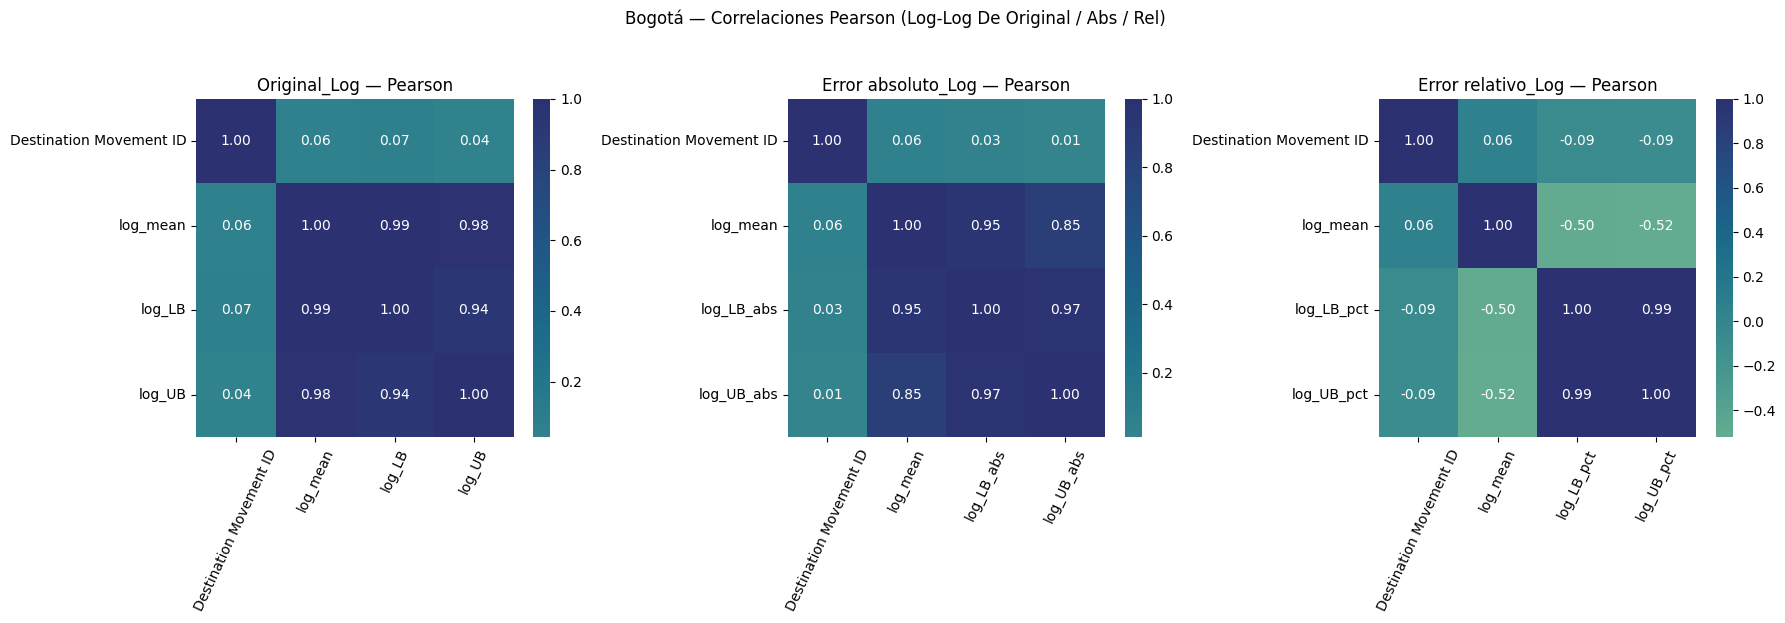

In [ ]:
# ====== 2) FIGURA A — PEARSON (Logaritmo De Original / Abs / Rel) ======
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

corrPearsonOriginal_Log = numeric_df_original_log.corr()#.select_dtypes("number").corr()
sns.heatmap(corrPearsonOriginal_Log, ax=axes[0], annot=True, fmt=".2f", cmap="crest", center=0)
axes[0].set_title("Original_Log — Pearson"); axes[0].tick_params(axis="x", rotation=65)

corrPearsonAbsoluto_Log = numeric_df_absoluto_log.corr()#.select_dtypes("number").corr()
sns.heatmap(corrPearsonAbsoluto_Log, ax=axes[1], annot=True, fmt=".2f", cmap="crest", center=0)
axes[1].set_title("Error absoluto_Log — Pearson"); axes[1].tick_params(axis="x", rotation=65)

corrPearsonRelativo_Log = numeric_df_relativo_log.corr()#.select_dtypes("number").corr()
sns.heatmap(corrPearsonRelativo_Log, ax=axes[2], annot=True, fmt=".2f", cmap="crest", center=0)
axes[2].set_title("Error relativo_Log — Pearson"); axes[2].tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Correlaciones Pearson (Log-Log De Original / Abs / Rel)", y=1.03)
plt.tight_layout(); plt.show()

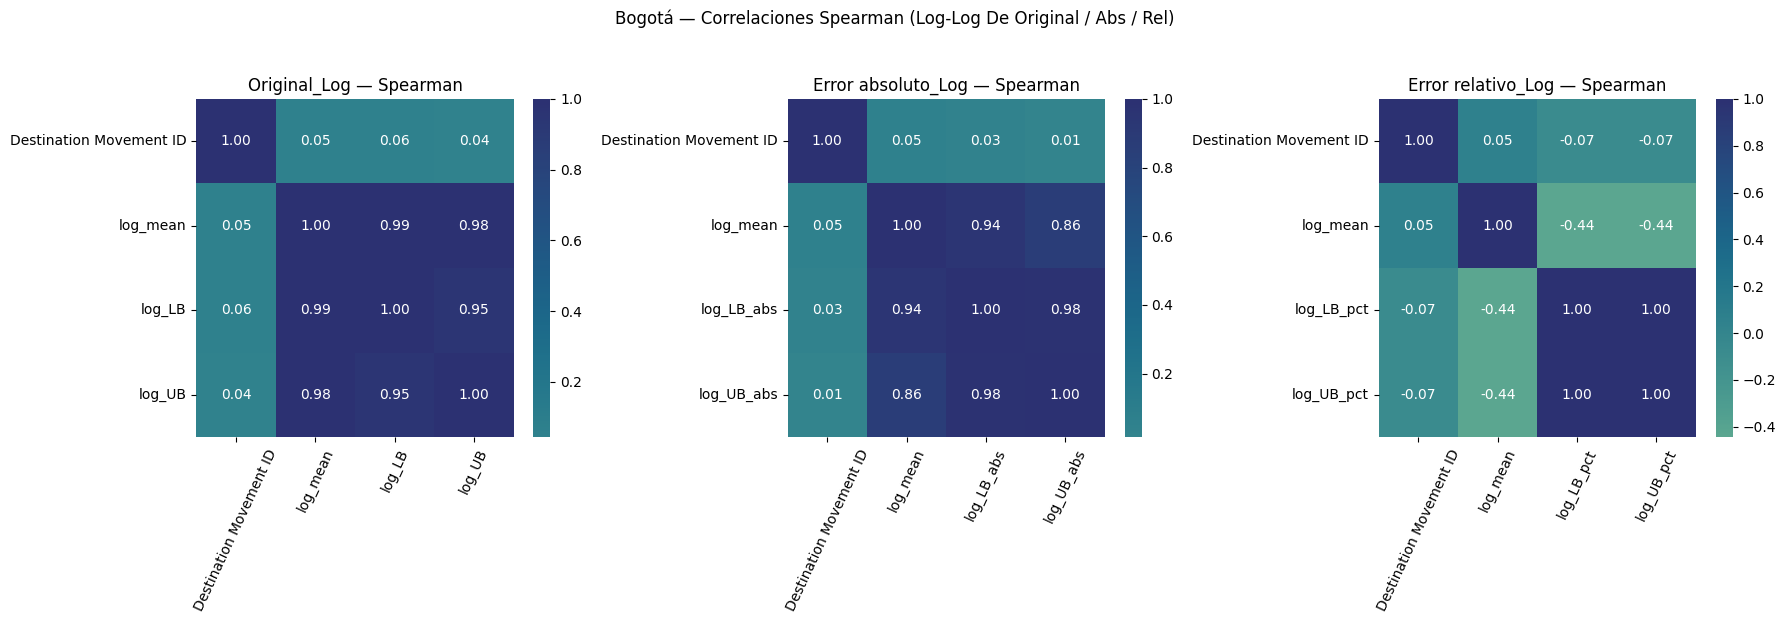

In [ ]:
# ====== 2) FIGURA B — SPEARMAN (Logaritmo De Original / Abs / Rel) ======
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

corrSpearmanOriginal_Log = numeric_df_original_log.corr(method="spearman")#.select_dtypes("number").corr()
sns.heatmap(corrSpearmanOriginal_Log, ax=axes[0], annot=True, fmt=".2f", cmap="crest", center=0)
axes[0].set_title("Original_Log — Spearman"); axes[0].tick_params(axis="x", rotation=65)

corrSpearmanAbsoluto_Log = numeric_df_absoluto_log.corr(method="spearman")#.select_dtypes("number").corr()
sns.heatmap(corrSpearmanAbsoluto_Log, ax=axes[1], annot=True, fmt=".2f", cmap="crest", center=0)
axes[1].set_title("Error absoluto_Log — Spearman"); axes[1].tick_params(axis="x", rotation=65)

corrSpearmanRelativo_Log = numeric_df_relativo_log.corr(method="spearman")#.select_dtypes("number").corr()
sns.heatmap(corrSpearmanRelativo_Log, ax=axes[2], annot=True, fmt=".2f", cmap="crest", center=0)
axes[2].set_title("Error relativo_Log — Spearman"); axes[2].tick_params(axis="x", rotation=65)

fig.suptitle("Bogotá — Correlaciones Spearman (Log-Log De Original / Abs / Rel)", y=1.03)
plt.tight_layout(); plt.show()

Sobre qué dicen las gráficas:

1. Original_Log (LB, UB vs mean)

   - Pearson y Spearman ~ 0.98–0.99 entre log_mean, log_LB y log_UB.

   - Eso es justo lo que esperarías si hay algo tipo:

     LB ≈ k1 * mean^β1

     UB ≈ k2 * mean^β2

     con β1, β2 muy cercanos a 1 (relación casi proporcional).

     El log no cambió la historia: LB y UB crecen casi proporcionalmente con el tiempo medio.

     Es decir-resumen: Eso es básicamente decir que LB y UB escalan con mean casi como una potencia limpia: log(LB)≈a+α log(mean), log(UB)≈b α,log(mean). O sea: la parte “base” de los tiempos de viaje + bandas se ve muy power–law friendly

2. Error absoluto_Log (LB_abs, UB_abs)

   - log_LB_abs vs log_mean: Pearson ~ 0.95, Spearman ~ 0.94 → muy lineal en log–log (demas que solo una(s) mordida(s), que pueden ser incluso simetricas-arriba ya abajo- o no, muy ligeras que daña monotonia pero no linealidad).... el caso es que esto valida mucho la idea de que LBabs ∼ mean^α  y apunta a que esta idea tiene MUCHO sentido.

   - log_UB_abs vs log_mean: Pearson ~ 0.85, Spearman ~ 0.86 → sigue fuerte, pero un poco menos “recta”-lineal que LB_abs y mas monotona que lineal consigo misma..... a cotninuacion decimos esto que quiere decir

   Interpretación:

   - Para los acortes absolutos (LB_abs) el modelo tipo potencia

     LB_abs ≈ C * mean^α

     funciona muy bien en log–log (poca curvatura / pocos outliers gordos).

   - Para los retrasos absolutos (UB_abs) sigue habiendo (metidos) una cola más gorda / incidentes / mezcla de régimen, pues sigue existiendo el gap despues del cambio a log-log (orginalmente teniamos 0,86 → 0,84 y despues del log-log 0,86 → 0,85 i,e se mejoro un poquito la linealidad-nos dejo una relacion aun mas lineal- y la monotnia quedo igual lo que cerro un poco mas el gap), y si bien el gap se hizo mas pequeño i,e el log-log lo comprimio (aumento la linealidad y paso si o si, o muy probablemente y no solo por limpieza y compresion de la relacion potencial que el log endereza xD, por los outliers del final de la dispersion pues estos dañan linealidad y no monotonia y por eso la primera mejora y el segundo se mantiene igual), este no se compirmio del todo, por lo que no se debe meramente al ruido multiplicativo (de la componente) y de hecho le da mas fuerza a nuestra lectura de que en vez de curvatura, son entonces, outliers y la necesidad de modelar-meter el nuevo termino J para dar razon de ello y que en el fondo es un termino que se puede leer como el de cambio-mezcla de regimen:
   
     el log ayuda un poco, pero no “arregla” del todo la no-linealidad → refuerza la idea de:
      
     >ruido aditivo + multiplicativo suave + componente de incidentes J para UB.

3. Error relativo_Log (LB_pct, UB_pct)

   - log_mean vs log_LB_pct y log_UB_pct:

     - Pearson ≈ -0.50, Spearman ≈ -0.44.

     - El signo sigue siendo negativo y la magnitud es parecida a la versión no–log.

   - log_LB_pct vs log_UB_pct: ~0.99–1.00 → casi una relación monótona perfecta (ya lo veíamos sin log).

   Esto encaja perfecto con la historia:

   - Al pasar a porcentaje, la parte multiplicativa se convierte en algo tipo

     error_% ≈ mean^(α-1),

     con α en (0,1) → exponente negativo → correlación negativa en log–log.

   - El log no cambia la película conceptual, solo la pone en coordenadas donde las potencias se ven más claras:

     - En cortos: términos aditivos + variabilidad fuerte → error relativo alto.

     - En largos: la base crece → error relativo baja y se estabiliza.

4. Cositas meta que se ven bonitas

   - Destination Movement ID sigue teniendo correlaciones ~0.05 en todos los casos → no está contaminando la estructura.

   - La diferencia Pearson–Spearman en log no es gigante:
     - Donde ya sospechábamos mezcla de régimen / outliers (UB_abs), la diferencia sigue ahí.
     - Donde todo es muy limpio (LB_abs_log, LB_log, UB_log) → Pearson ≈ Spearman.

En resumen:

Gráficas: refuerzan tu cuento:

- LB/UB crecen casi como potencias ~1 del mean.
- Los errores absolutos siguen mostrando que UB tiene “algo extra” (cola/eventos raros) que LB no.
- Los relativos en log–log confirman la estructura tipo mean^{α-1} con α∈(0,1), es decir, el error porcentual cae con el tiempo medio.

Y bueno, nada, entonces que nos quedaria faltando ? manito, pille que la existencia de los aditivos igual no se podia confirmar con lo anterior, confirmamos multiplicativo si y confirmamos que son de exponente negativo, tambien se volvio mas fuerte la teoria de que soin outliers/mezcla de regimen/incidentes/nuevo termino aditivo, pero again, con los aditivos pailanders, entonces nada, sigamos ya entonces con el detalle final que seria grafica de dispersion (que literal va ser el sapeador 3mil y de hecho siempre ha sido lo mas adecuado en vez de los mapade de calor de correlacion solo, pero eso xD, la idea era forzarnos) y fiteo-regresion y con ellos-estimacion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Columnas base
mean_tt = df_bogota["Mean Travel Time (Seconds)"].astype(float)
lb      = df_bogota["Range - Lower Bound Travel Time (Seconds)"].astype(float)
ub      = df_bogota["Range - Upper Bound Travel Time (Seconds)"].astype(float)

# Errores absolutos
LB_abs = mean_tt - lb
UB_abs = ub - mean_tt

# Errores relativos
LB_pct = LB_abs / mean_tt
UB_pct = UB_abs / mean_tt

# Cuartiles del tiempo medio (los vamos a usar para las líneas verticales)
q = mean_tt.quantile([0.25, 0.5, 0.75])
q1, q2, q3 = q[0.25], q[0.5], q[0.75]

def marcar_cuartiles_x(ax, use_log=False):
    """Dibuja líneas verticales en los cuartiles de mean_tt."""
    xs = [q1, q2, q3]
    if use_log:
        xs = [np.log10(x) for x in xs]
    for x in xs:
        ax.axvline(x, color="k", linestyle="--", linewidth=0.7, alpha=0.7)

def scatter_log_with_fit(ax, x, y, mask, titulo, ylabel=None):
    """
    Hace scatter en log–log y ajusta una recta en log10(x), log10(y).
    Escribe la pendiente a en la esquina superior izquierda.
    Devuelve (m, b) de y_log = m * x_log + b.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    mask = mask & np.isfinite(x) & np.isfinite(y)
    x_log = np.log10(x[mask])
    y_log = np.log10(y[mask])

    # Scatter
    ax.scatter(x_log, y_log, s=5, alpha=0.4)

    # Por defecto, por si no alcanza para ajustar
    m, b = np.nan, np.nan

    if len(x_log) > 5:  # por si acaso
        m, b = np.polyfit(x_log, y_log, 1)
        x_line = np.linspace(x_log.min(), x_log.max(), 200)
        y_line = m * x_line + b
        ax.plot(x_line, y_line, linewidth=1.5)

        ax.text(
            0.03, 0.95,
            f"y = mx + b ≈ {m:.2f}x + {b:.2f}",
            transform=ax.transAxes,
            ha="left", va="top", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7)
        )

    ax.set_title(titulo)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    marcar_cuartiles_x(ax, use_log=True)

    return m, b

x_line = np.linspace(mean_tt.min(), mean_tt.max(), 300)

def plot_power_if_valid(ax, k, m, label=None, show_box=False):
    """Dibuja k*x^m si (k,m) son finitos; opcionalmente escribe la fórmula."""
    if not np.isfinite(k) or not np.isfinite(m):
        return
    y_line = k * x_line**m
    ax.plot(x_line, y_line, linewidth=1.5, label=label)
    if show_box:
        ax.text(
            0.03, 0.95,
            f"y ≈ {k:.2f} x^{m:.2f}",
            transform=ax.transAxes,
            ha="left", va="top", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7)
        )


In [ ]:
# Máscaras para evitar log10(≤0)
mask_LB   = (mean_tt > 0) & (lb > 0)
mask_UB   = (mean_tt > 0) & (ub > 0)
mask_absL = (mean_tt > 0) & (LB_abs > 0)
mask_absU = (mean_tt > 0) & (UB_abs > 0)
mask_pctL = (mean_tt > 0) & (LB_pct > 0)
mask_pctU = (mean_tt > 0) & (UB_pct > 0)


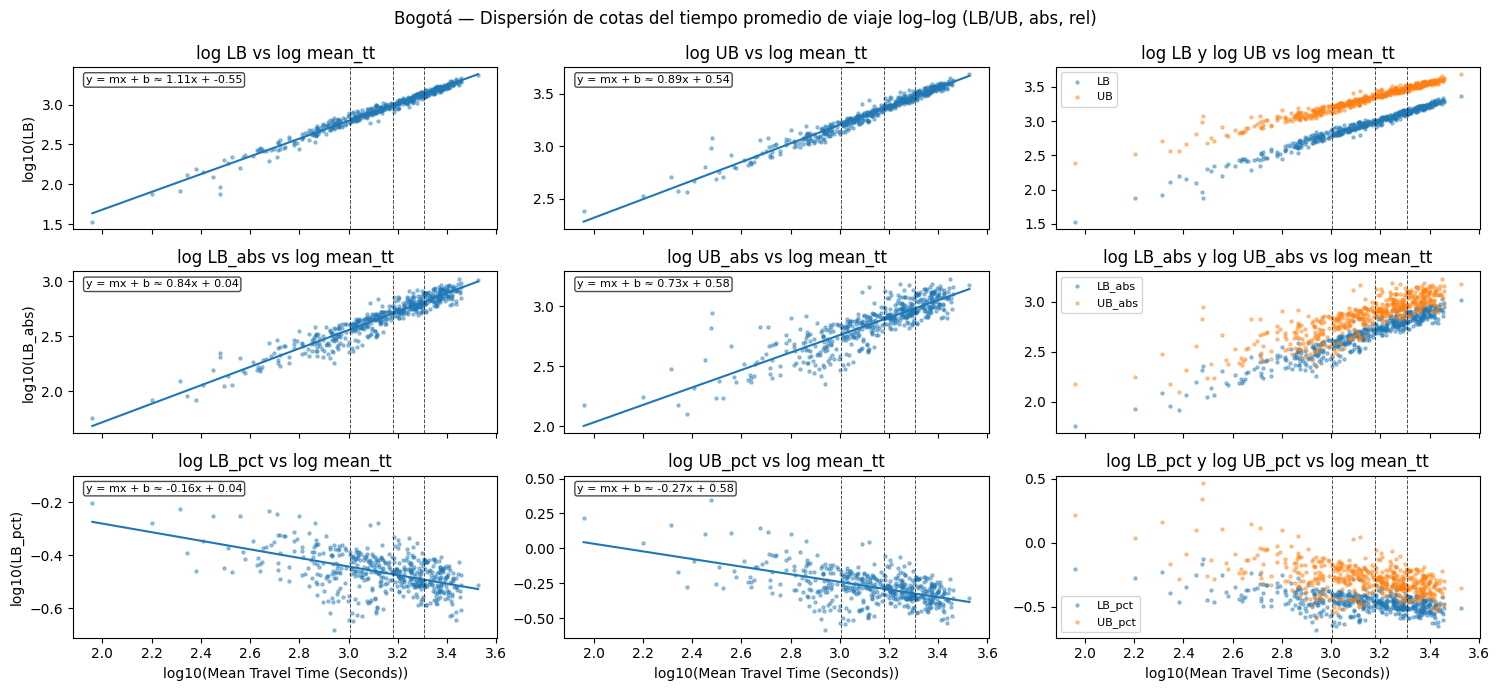

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7), sharex=True, sharey=False)#figsize=(15, 12), sharex=True, sharey=False)

# ---- Fila 0: LB y UB originales (log–log) ----
#ax = axes[0, 0]
#ax.scatter(np.log10(mean_tt[mask_LB]), np.log10(lb[mask_LB]), s=5, alpha=0.4)
#ax.set_title("log LB vs log mean_tt")
#ax.set_ylabel("log10(LB)")
#marcar_cuartiles_x(ax, use_log=True)
m_LB, b_LB = scatter_log_with_fit(
    axes[0, 0], mean_tt, lb, mask_LB,
    "log LB vs log mean_tt", ylabel="log10(LB)"
)

#ax = axes[0, 1]
#ax.scatter(np.log10(mean_tt[mask_UB]), np.log10(ub[mask_UB]), s=5, alpha=0.4)
#ax.set_title("log UB vs log mean_tt")
#marcar_cuartiles_x(ax, use_log=True)
m_UB, b_UB = scatter_log_with_fit(
    axes[0, 1], mean_tt, ub, mask_UB,
    "log UB vs log mean_tt"
)

ax = axes[0, 2]
ax.scatter(np.log10(mean_tt[mask_LB]), np.log10(lb[mask_LB]), s=5, alpha=0.4, label="LB")
ax.scatter(np.log10(mean_tt[mask_UB]), np.log10(ub[mask_UB]), s=5, alpha=0.4, label="UB")
ax.set_title("log LB y log UB vs log mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=True)

# ---- Fila 1: errores absolutos (log–log) ----
#ax = axes[1, 0]
#ax.scatter(np.log10(mean_tt[mask_absL]), np.log10(LB_abs[mask_absL]), s=5, alpha=0.4)
#ax.set_title("log LB_abs vs log mean_tt")
#ax.set_ylabel("log10(LB_abs)")
#marcar_cuartiles_x(ax, use_log=True)
m_LB_abs, b_LB_abs = scatter_log_with_fit(
    axes[1, 0], mean_tt, LB_abs, mask_absL,
    "log LB_abs vs log mean_tt", ylabel="log10(LB_abs)"
)

#ax = axes[1, 1]
#ax.scatter(np.log10(mean_tt[mask_absU]), np.log10(UB_abs[mask_absU]), s=5, alpha=0.4)
#ax.set_title("log UB_abs vs log mean_tt")
#marcar_cuartiles_x(ax, use_log=True)
m_UB_abs, b_UB_abs = scatter_log_with_fit(
    axes[1, 1], mean_tt, UB_abs, mask_absU,
    "log UB_abs vs log mean_tt"
)

ax = axes[1, 2]
ax.scatter(np.log10(mean_tt[mask_absL]), np.log10(LB_abs[mask_absL]), s=5, alpha=0.4, label="LB_abs")
ax.scatter(np.log10(mean_tt[mask_absU]), np.log10(UB_abs[mask_absU]), s=5, alpha=0.4, label="UB_abs")
ax.set_title("log LB_abs y log UB_abs vs log mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=True)

# ---- Fila 2: errores relativos (log–log) ----
#ax = axes[2, 0]
#ax.scatter(np.log10(mean_tt[mask_pctL]), np.log10(LB_pct[mask_pctL]), s=5, alpha=0.4)
#ax.set_title("log LB_pct vs log mean_tt")
#ax.set_ylabel("log10(LB_pct)")
#marcar_cuartiles_x(ax, use_log=True)
m_LB_pct, b_LB_pct = scatter_log_with_fit(
    axes[2, 0], mean_tt, LB_pct, mask_pctL,
    "log LB_pct vs log mean_tt", ylabel="log10(LB_pct)"
)

#ax = axes[2, 1]
#ax.scatter(np.log10(mean_tt[mask_pctU]), np.log10(UB_pct[mask_pctU]), s=5, alpha=0.4)
#ax.set_title("log UB_pct vs log mean_tt")
#marcar_cuartiles_x(ax, use_log=True)
m_UB_pct, b_UB_pct = scatter_log_with_fit(
    axes[2, 1], mean_tt, UB_pct, mask_pctU,
    "log UB_pct vs log mean_tt"
)

ax = axes[2, 2]
ax.scatter(np.log10(mean_tt[mask_pctL]), np.log10(LB_pct[mask_pctL]), s=5, alpha=0.4, label="LB_pct")
ax.scatter(np.log10(mean_tt[mask_pctU]), np.log10(UB_pct[mask_pctU]), s=5, alpha=0.4, label="UB_pct")
ax.set_title("log LB_pct y log UB_pct vs log mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=True)

# Etiquetas X sólo última fila
for j in range(3):
    axes[2, j].set_xlabel("log10(Mean Travel Time (Seconds))")

plt.suptitle("Bogotá — Dispersión de cotas del tiempo promedio de viaje log–log (LB/UB, abs, rel)")#, y=0.93)
plt.tight_layout()
plt.show()


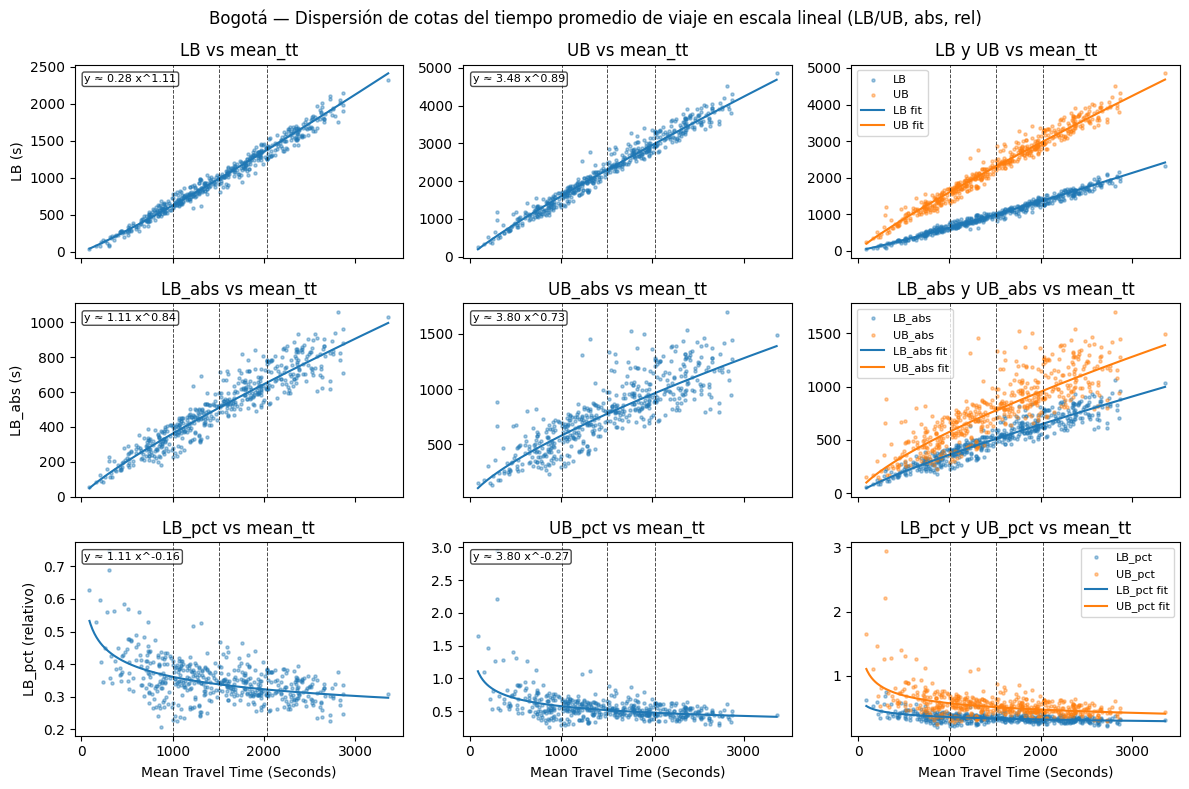

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12,8), sharex=True)#figsize=(15, 12), sharex=True)

# k = 10^b
k_LB     = 10**b_LB     if np.isfinite(b_LB)     else np.nan
k_UB     = 10**b_UB     if np.isfinite(b_UB)     else np.nan
k_LB_abs = 10**b_LB_abs if np.isfinite(b_LB_abs) else np.nan
k_UB_abs = 10**b_UB_abs if np.isfinite(b_UB_abs) else np.nan
k_LB_pct = 10**b_LB_pct if np.isfinite(b_LB_pct) else np.nan
k_UB_pct = 10**b_UB_pct if np.isfinite(b_UB_pct) else np.nan

# ---- Fila 0: LB y UB originales ----
ax = axes[0, 0]
ax.scatter(mean_tt, lb, s=5, alpha=0.4)
plot_power_if_valid(ax, k_LB, m_LB, show_box=True)
ax.set_title("LB vs mean_tt")
ax.set_ylabel("LB (s)")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[0, 1]
ax.scatter(mean_tt, ub, s=5, alpha=0.4)
plot_power_if_valid(ax, k_UB, m_UB, show_box=True)
ax.set_title("UB vs mean_tt")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[0, 2]
ax.scatter(mean_tt, lb, s=5, alpha=0.4, label="LB")
ax.scatter(mean_tt, ub, s=5, alpha=0.4, label="UB")
plot_power_if_valid(ax, k_LB, m_LB, label="LB fit")
plot_power_if_valid(ax, k_UB, m_UB, label="UB fit")
ax.set_title("LB y UB vs mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=False)

# ---- Fila 1: errores absolutos ----
ax = axes[1, 0]
ax.scatter(mean_tt, LB_abs, s=5, alpha=0.4)
plot_power_if_valid(ax, k_LB_abs, m_LB_abs, show_box=True)
ax.set_title("LB_abs vs mean_tt")
ax.set_ylabel("LB_abs (s)")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[1, 1]
ax.scatter(mean_tt, UB_abs, s=5, alpha=0.4)
plot_power_if_valid(ax, k_UB_abs, m_UB_abs, show_box=True)
ax.set_title("UB_abs vs mean_tt")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[1, 2]
ax.scatter(mean_tt, LB_abs, s=5, alpha=0.4, label="LB_abs")
ax.scatter(mean_tt, UB_abs, s=5, alpha=0.4, label="UB_abs")
plot_power_if_valid(ax, k_LB_abs, m_LB_abs, label="LB_abs fit")
plot_power_if_valid(ax, k_UB_abs, m_UB_abs, label="UB_abs fit")
ax.set_title("LB_abs y UB_abs vs mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=False)

# ---- Fila 2: errores relativos ----
ax = axes[2, 0]
ax.scatter(mean_tt, LB_pct, s=5, alpha=0.4)
plot_power_if_valid(ax, k_LB_pct, m_LB_pct, show_box=True)
ax.set_title("LB_pct vs mean_tt")
ax.set_ylabel("LB_pct (relativo)")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[2, 1]
ax.scatter(mean_tt, UB_pct, s=5, alpha=0.4)
plot_power_if_valid(ax, k_UB_pct, m_UB_pct, show_box=True)
ax.set_title("UB_pct vs mean_tt")
marcar_cuartiles_x(ax, use_log=False)

ax = axes[2, 2]
ax.scatter(mean_tt, LB_pct, s=5, alpha=0.4, label="LB_pct")
ax.scatter(mean_tt, UB_pct, s=5, alpha=0.4, label="UB_pct")
plot_power_if_valid(ax, k_LB_pct, m_LB_pct, label="LB_pct fit")
plot_power_if_valid(ax, k_UB_pct, m_UB_pct, label="UB_pct fit")
ax.set_title("LB_pct y UB_pct vs mean_tt")
ax.legend(fontsize=8)
marcar_cuartiles_x(ax, use_log=False)

# Etiquetas de eje X solo en la última fila
for j in range(3):
    axes[2, j].set_xlabel("Mean Travel Time (Seconds)")

plt.suptitle("Bogotá — Dispersión de cotas del tiempo promedio de viaje en escala lineal (LB/UB, abs, rel)")#, y=0.93)
plt.tight_layout()
plt.show()


1. Relación básica entre mean_tt y las cotas LB / UB
----------------------------------------------------

1) En escala lineal, los dispersogramas LB vs mean_tt y UB vs mean_tt muestran nubes muy bien alineadas:

   - LB crece casi “proporcional” al tiempo medio.
   - UB también crece con mean_tt, pero con un abanico un poco más abierto (más dispersión hacia arriba).

2) En escala log-log, los fits lineales nos dan relaciones tipo potencia:

   - $LB \approx k_{\text{LB}} \,\text{mean}^{\,a_{\text{LB}}}$ con $a_{\text{LB}}\approx 1.11$
   - $UB \approx k_{\text{UB}} \,\text{mean}^{\,a_{\text{UB}}}$ con $a_{\text{UB}}\approx 0.89$

   Interpretación:

   - Para LB el exponente es ligeramente > 1: la cota inferior crece algo más rápido que el tiempo medio; en recorridos muy largos, “la mejor versión posible” del viaje también se va alargando un pelín más que proporcionalmente. I,e si miras la razón $LB/\text{mean_tt}$, esta va subiendo con la distancia: el “mejor caso posible-la llegada mas rapida” deja de ser tan optimista en viajes largos; la parte de tiempo que puedes “recortar” hacia abajo, en términos relativos, se va haciendo un poco más pequeña...... Mejor dicho, en palabras mas simples: LB esta acoado por arriba por el promedio mean_tt y LB crece mas rapido que mean_tt luego a mas largo el viaje la diferencia absoluta entre LB y mean_tt va ser cada vez mas pequeña (y pues esto tiene luego todo el sentido del mundo pues es congruente con lo que ya sabiamos del error relativo LB_abs/mean_tt cada vez va ser mas y mas pequeño a mas largo es el viaje)
   - Para UB el exponente es ligeramente < 1: la cota superior crece algo más lento que el mean; eso encaja con la idea de que la UB ya incluye parte de los cuellos de botella esperables, pero que esos cuellos no explotan sin control con el tiempo de viaje. I,e si miras la razón $UB/\text{mean_tt}$, esta va bajando con la distancia: el “peor caso razonable” no se dispara cada vez más rápido que el promedio; al contrario, para viajes muy largos esa cota se va “pegando” relativamente más al mean, es decir
      * Sí, es verdad que al ir a trayectos más largos aparecen más oportunidades de congestión, semáforos, trancones, etc.
      * Pero el ajuste $UB \propto \text{mean}^{0.89}$ indica que ese “extra” no crece de manera explosiva; el peor caso crece casi proporcional al mean, incluso un pelín más lento en términos de potencia.
      (a estos dos puntos nos referiamos con lo de cuellos de botella)
   y esto es totalmente congruente con lo que ya sabiamos de UB_abs i,e que crece, pero que no crece de manera super descontralada, sino tal que el error relativo UB_abs/mean_tt a mas largo es el viaje mas pequeño es

   En conjunto, mean, LB y UB están casi en una relación de potencias muy limpia, y eso explica por qué los coeficientes de correlación entre las tres son tan altos (tanto en Pearson como en Spearman).


2. Errores absolutos: LB_abs y UB_abs
-------------------------------------

Recordemos:

- $LB_{abs} = \text{mean} - LB$
- $UB_{abs} = UB - \text{mean}$

En lineal:

- Ambos aumentan con el tiempo medio → heterocedasticidad clara: los intervalos [LB, UB] son más estrechos para viajes cortos y más anchos para viajes largos.
- UB_abs es sistemáticamente mayor que LB_abs: el abanico hacia los retrasos es más grande que hacia los acortes (recuerde que eso se deduce de los valores de los coefcientes de correlacin y el que haya heterocedasticidad tmabien en UB_abs y LB_abs y la forma se saca-penso aparte de los valores, de tambien comparar Pearson con Spearman, y note que ahora ya lo pudimos verificar graficamente).


En log-log:

- $LB_{abs} \approx k_{\text{LB,abs}} \,\text{mean}^{\,a_{\text{LB,abs}}}$ con $a_{\text{LB,abs}}\approx 0.84$
- $UB_{abs} \approx k_{\text{UB,abs}} \,\text{mean}^{\,a_{\text{UB,abs}}}$ con $a_{\text{UB,abs}}\approx 0.73$

Interpretación:

- Los errores absolutos crecen sublinealmente con el tiempo medio ($a \in (0,1)$).
- Eso cuadra (no contradice, pero no justica en su totalidad, ojo) con el modelo conceptual:
  - componente aditiva $A$ (overhead fijo de arranque, semáforos, etc.),
  - componente multiplicativa suave $C\,\text{mean}^{\alpha}$ con $\alpha \in (0,1)$,
  - y, en el caso de UB, una componente “incidentales” $J$ (eventos raros de retrasos grandes).

  lo que si termina de justificar la posible existencia de uno de los aditivos de manera fuerte, es que si se fija en las graficas log-log de los absolutos por ejm, el ajuste empeora o hay mucha dispersion para viajes dentro de Q1 (viajes cortos o no tan largos) y despues de esto la dispersion mejora y se incorpora o siga mejor el ajuste. Esto es precisamente buena evidencia de la existencia de A (junto con las otras cosas que ya antes habiamos dicho, pero que no eran tan visibles-facil de ver como por ejemplo esto de aqui) pues muestra como en el regimen de viajes cortos domina una cosa y cuando vamos a largos domina otra, como en cortos no domina un termino multiplicativo sino de otro tipo t.q dicho termino ademas perece para viajes largos i,e uno aditivo probablemente....... ahora bien, por este mismo motivo es que via los log-log no podemos asegurar ni desasegurar que la existencia del aditivo J de manera tan certera como A, pues aunque se ve dispersion, esa mera dispersion no termina como de ser tan contundente por si sola (no hay forma de contrastar como la de A), es decir, quedamos aun apegados al argumento que antes vimos, que de hecho vemos que tambien se corrobora con estas graficas pues en la parte lineal vemos la asimetria hacia arriba del abanico-los outliers y en la parte logartimica vemos como los outliers son domadas-bajan un poco mas en log-log pero no desaparecen i,e no se terminan de acoplar a algomeramente multiplicativo (o ser un ruido multiplicativo) i,e le da fuerza a ese argumento-sospecha-lo ya pensado pero no termina de rematar si existe o no J en el mismo sentido que se hizo con A

Nota, lo que la sublinealidad ($a<1$) dice: cuando duplicas el tiempo medio, el “error absoluto típico” crece menos que al doble; el sistema se vuelve más estable en términos de variación por unidad de tiempo.


3. Errores relativos: LB_pct y UB_pct
-------------------------------------

Definidos como:

- $LB_{pct} = LB_{abs} / \text{mean}$
- $UB_{pct} = UB_{abs} / \text{mean}$

Ya sabíamos que:

- Las correlaciones con mean son negativas (≈ −0.47 para LB_pct y ≈ −0.43 para UB_pct): los errores relativos bajan cuando el tiempo medio aumenta.

En log–log, los fits quedan:

- $LB_{pct} \approx k_{\text{LB,pct}} \,\text{mean}^{\,a_{\text{LB,pct}}}$ con $a_{\text{LB,pct}}\approx -0.16$
- $UB_{pct} \approx k_{\text{UB,pct}} \,\text{mean}^{\,a_{\text{UB,pct}}}$ con $a_{\text{UB,pct}}\approx -0.27$

O sea, los errores porcentuales caen aproximadamente como una potencia suave del tiempo medio:

- Para LB_pct, exponente negativo pero pequeño en magnitud → descenso moderado.
- Para UB_pct, exponente más negativo → la parte relativa que se “gana” al ir a viajes más largos es algo mayor del lado de los retrasos -(eso de ganar es como lo que se quita entonces la parte relativa de incertidumbre que se quita es mayor para retraso UB que para recortes LB)-. I,e Cuando pasas de viajes cortos a viajes largos, el % de retraso típico (UB_pct “central”) tiende a reducirse un poquito más que el % de acorte típico (LB_pct). O sea, el “premio” en términos de bajar el porcentaje, si te vas a viajes largos, es ligeramente mayor en la cota superior que en la inferior.

Eso encaja perfecto con la lectura cualitativa que ya teníamos:

- En viajes cortos, $LB_{pct}$ y $UB_{pct}$ son mucho más “caóticos” y pueden dispararse a valores muy altos.
- En viajes largos, ambos se “aprietan” alrededor de valores más bajos y estables; el abanico relativo se cierra.

Además, la forma $a_{\text{rel}} = a_{\text{abs}} - 1$ se ve reflejada (dado que $LB_{pct} \sim LB_{abs}/\text{mean}$ y lo mismo para UB): sublineal en absolutos → exponente negativo suave en relativos.

Tambien note que se demuestra, en las graficas de escala lineal, que el termino aditivo A hace mas estragos en LB que en UB pues hay una mayor dispersion o se ajusta menos al ajusted LB que UB


4. Asimetría del intervalo completo [LB, UB]
--------------------------------------------

Cuando pasamos a:

- $spread_{abs} = UB - LB$
- $asym_{abs} = (UB - \text{mean}) - (\text{mean} - LB) = UB_{abs} - LB_{abs}$

y sus versiones relativas, los mapas de calor Pearson/Spearman muestran:

- $spread_{abs}$ correlaciona muy alto con mean_tt (≈ 0.88–0.90): cuanto más largo el viaje, más grande la separación total LB–UB.
- $asym_{abs}$ también crece con mean, pero algo menos alineado que el spread.
- En términos relativos, $spread_{pct}$ y $asym_{pct}$ están casi perfectamente correlacionados entre sí: cuando el intervalo se hace proporcionalmente más ancho, tiende a volverse también más sesgado hacia el lado de los retrasos.

Esto respalda la tesis de que:

- El abanico no se abre de forma simétrica alrededor del mean.
- Hay un desplazamiento sistemático de masa hacia UB, que se vuelve más evidente cuando miras todo el intervalo junto.

Y todo esto se ve de manera sencilla en la 3ra columan de las graficas en escala lineal por ejm, tambien en las log-log


5. Colas y “eventos raros” en UB: el papel de J
-----------------------------------------------
[esto tambien es como un resumen, sobra por ello, pero bueno dejemoslo]
La combinación de:

- histogramas por cuartiles,
- correlaciones Pearson < Spearman en UB_abs,
- y los fits log–log,

es coherente con la idea de que, del lado UB, no solo hay ruido “continuo”, sino también una cola de eventos raros que empujan hacia arriba.

Modelo conceptual:

- $UB_{abs} \approx A + C\,\text{mean}^{\alpha} + J$,
- $LB_{abs} \approx A + C\,\text{mean}^{\alpha}$,

donde:

- $A$ es el overhead aditivo (arranque, semáforos, etc.),
- $C\,\text{mean}^{\alpha}$ con $\alpha\in(0,1)$ es el término multiplicativo suave,
- $J$ es una variable que la mayor parte del tiempo es 0 (día normal) pero a veces es grande (accidente, cierre, lluvia fuerte, etc.).

En escala absoluta, $J$ se ve como puntos altos que estiran la cola de UB_abs; en porcentaje:

- $UB_{pct} = \dfrac{UB_{abs}}{\text{mean}} \approx \dfrac{A}{\text{mean}} + C\,\text{mean}^{\alpha-1} + \dfrac{J}{\text{mean}}$,

y entonces, para recorridos largos:

- $A/\text{mean}$ se hace pequeño,
- $C\,\text{mean}^{\alpha-1}$ decrece (porque $\alpha-1<0$),
- $J/\text{mean}$ también se “achata”: un incidente de +600 s luce gigantesco sobre un viaje de 600 s (100 %), pero ya no tanto sobre uno de 2400 s (25 %).

Eso explica:

- Por qué en UB_abs la cola gorda hacia arriba rompe más la linealidad (Pearson < Spearman).
- Por qué en UB_pct seguimos viendo relación negativa razonablemente ordenada: los incidentes se reescalan con el tiempo medio y ya no rompen tanto el patrón.


6. Cambio de régimen con la longitud del viaje
----------------------------------------------
[esta seccion es mas un resumen de loque ya sabiamos de lo procentual, la verdad no me mato pero la voy a dejar]

Los cuartiles de mean_tt (las líneas verticales que pusiste) ayudan a ver algo tipo “cambio de régimen”:

- En el Q1 (viajes cortos):
  - LB_pct y, sobre todo, UB_pct muestran mucha dispersión y valores altos.
  - El intervalo [LB, UB] relativo es ancho y muy asimétrico: viajes cortos son frágiles porcentualmente; pequeños retrasos absolutos se vuelven enormes en %.

- A medida que pasas por Q2 y Q3:
  - Los abanicos de LB_pct y UB_pct empiezan a cerrarse,
  - Las medianas se mueven hacia el centro del rango.

- En Q4 (viajes largos):
  - LB_pct y UB_pct están bastante más concentrados,
  - La asimetría relativa disminuye (aunque UB sigue cargando con colas algo más gordas).

Interpretación cualitativa:

- Para tiempos cortos domina $A$ (overhead + factores locales), de modo que el % es salvaje.
- Para tiempos largos domina la parte suave $C\,\text{mean}^{\alpha}$ y la escala del viaje “protege” frente a cambios relativos enormes; la probabilidad de que entre en juego el término $J$ (incidente) ya no es despreciable, pero al dividir por mean su impacto relativo se amortigua.

[A cotninuacion debido al fracaso de las ultimas dos secciones, obligue a gpt a que me copiara algo un roce mas digno, pues aprovechando que ahora podemos visualizar un monton de cosas, mas, aun asi, le quedo grande, pero lo voy a dejar como para en un futuro retomar maybe y hacer algo mas interesante o idk]


En las gráficas en escala lineal, cada panel muestra la nube de puntos $(\text{mean_tt}, Y)$ junto con una curva ajustada de la forma $Y \approx k,\text{mean_tt}^a$, obtenida a partir del ajuste lineal en el plano log–log. Esa curva la podemos leer como el comportamiento típico o de referencia para cada variable (LB, UB, $LB_{\text{abs}}$, $UB_{\text{abs}}$, etc.) dado un tiempo medio de viaje. Si tomamos la diferencia entre el valor observado y el valor de la curva, $r = Y - Y_{\text{fit}}(\text{mean_tt})$, ese residuo nos permite nombrar directamente “retrasos” y “recortes”:

En $LB_{\text{abs}}$,
- un $r>0$ significa un recorte grande (hay mucho más que recortar hacia abajo de lo que sería esperable para ese tiempo medio)
- y un $r<0$ un recorte pequeño;

En $UB_{\text{abs}}$,
- un $r>0$ corresponde a un retraso grande (la cota se va muy por encima de lo que marca el fit)
- y un $r<0$ a un retraso pequeño.

Lo mismo aplica-extiende a las versiones porcentuales $LB_{\text{pct}}$ y $UB_{\text{pct}}$, solo que ahí hablamos de recorte grande/pequeño en porcentaje y retraso grande/pequeño en porcentaje.

Si nos fijamos en la fila de errores absolutos ($LB_{\text{abs}}$, $UB_{\text{abs}}$) y en la de errores relativos ($LB_{\text{pct}}$, $UB_{\text{pct}}$), usando además los cuartiles de $\text{mean_tt}$, se ve bastante bien la huella del término aditivo $A$. En $LB_{\text{abs}}$ vs. $\text{mean_tt}$, dentro del primer cuartil (viajes cortos) la nube alrededor del ajuste es mucho más ancha y cargada hacia arriba: abundan los recortes grandes (residuos positivos) y escasean los recortes muy pequeños, lo que indica que en trayectos cortos el comportamiento típico $k,\text{mean}^a$ se ve muy perturbado por un término extra casi constante, justo lo que esperaríamos de un $A$ fuerte. A medida que pasamos de Q2 a Q3 y Q4, los recortes se vuelven más “normales”: la nube se pega al fit, los recortes grandes se vuelven menos frecuentes y predominan recortes más moderados, señal de que el peso relativo de $A$ se diluye y domina la parte multiplicativa suave. En $LB_{\text{pct}}$ ocurre algo análogo pero en términos relativos: en Q1 aparecen muchos recortes grandes en porcentaje, mientras que para viajes largos los recortes relativos se concentran alrededor de la curva decreciente.

El papel de la componente $J$ (incidentes raros) se ve sobre todo en $UB_{\text{abs}}$ y $UB_{\text{pct}}$. En $UB_{\text{abs}}$ vs. $\text{mean_tt}$, en todos los cuartiles la nube es marcadamente asimétrica: hay muchos más puntos muy por encima de la curva que por debajo. Dicho en tus términos, hay muchos más retrasos grandes que retrasos excepcionalmente pequeños, y esa asimetría es más fuerte que del lado de los recortes. En los viajes cortos y medios (Q1 y Q2) esta cola de retrasos grandes es especialmente visible, lo que encaja con un modelo del tipo $UB_{\text{abs}} \approx A + C,\text{mean}^\alpha + J$, donde $J$ solo puede sumar y, cuando aparece, empuja UB muy hacia arriba. En $UB_{\text{pct}}$ la curva decreciente captura bien el comportamiento típico y, de nuevo, en Q1–Q2 aparecen varios puntos que podemos leer como retrasos porcentuales grandes, mientras que en Q3–Q4 estos se vuelven menos extremos: el cociente $J/\text{mean}$ hace que esos mismos incidentes se vean como retrasos grandes en segundos, pero como retrasos más moderados en porcentaje cuando el viaje es largo. Así, las figuras en escala lineal, con los fits superpuestos, nos dejan ver que la estructura de retrasos grandes/pequeños está sesgada hacia el lado de UB (por la presencia de $J$), mientras que los recortes grandes/pequeños se explican sobre todo por el término aditivo $A$ en el régimen de viajes cortos.

7. Síntesis muy corta (para pegar casi textual)
----------------------------------------------
[no me mato esta sintesis]
- LB y UB siguen relaciones de tipo potencia muy limpias con el tiempo medio; mean, LB y UB están fuertemente acoplados.
- Los errores absolutos LB_abs y UB_abs crecen sublinealmente con mean (exponentes ≈ 0.7–0.8), lo que confirma heterocedasticidad (en UB y LB normales): más dispersión en viajes largos, pero menos que proporcional.
- Los errores relativos LB_pct y UB_pct caen como potencias suaves de mean (exponentes negativos de pequeña magnitud), reflejando que las incertidumbres porcentuales son mucho más salvajes en viajes cortos que en largos.
- El intervalo completo [LB, UB] es internamente asimétrico: el lado de UB concentra una cola de eventos raros que empuja los retrasos a valores muy grandes, mientras que el lado de LB es más “civilizado”.
- Todo ello encaja muy bien con un modelo mixto:
  - término aditivo fuerte en viajes cortos,
  - término multiplicativo sublineal que domina en viajes largos,
  - y una componente de incidentes raros $J$ principalmente en UB que explica la cola gorda y el “abanico” más abierto del lado de los retrasos.


Tristemente el tiempo se me acabo y no puedo aumentar el analisis anterior..... que faltaria ?
- hablar sobre los k, no dijimos un bochi de eso
- arreglar la parte de asimetrias internas que deje alla arriba
- estimar A y J o minimo verificar mas fuerte la existencia de J

Nota: note que trabajar o el modelado es mas interesnae en abs que en las cotas normales, porque asi quitamos de por medio el efecto de mean_tt i,e como abs = cota normal -mean_tt, estariamos quitando lo que sobra y dejando mera fenomenologia, y ya luego uno puede recuperar simplemente suando mean_tt en cada cosa y chao

### My cheat sheet XD:

la verdad yo mire el scatter hace raaaaaato, junto con los de calor, entonces mucho de lo que suponia obvio era medio bien guiado y ya habiendo hecho trampita :O

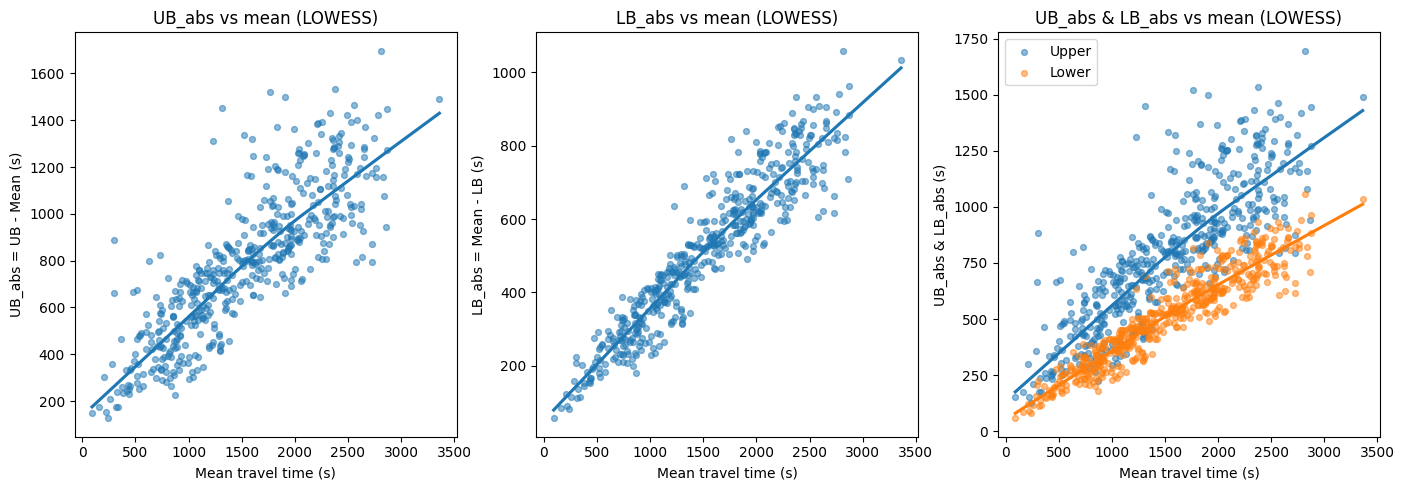

In [ ]:
# --------- 1) Scatter + LOWESS (curvatura/heteroscedasticidad) ----------
#  sns.regplot es una función de seaborn que sirve para:
#  • Graficar puntos dispersos (scatter plot).
#  • Ajustar y dibujar una línea de regresión encima.
#  • Mostrar opcionalmente una banda de confianza alrededor de esa línea.
#  Es básicamente un scatter plot + regresión lineal en una sola función.
#
#  ¿Qué implica lowess=True?
#  lowess = LOcally WEighted Scatterplot Smoothing.
#  Es un método no lineal que suaviza la relación entre X y Y sin suponer que es una línea recta.
#  Pasa esto:
#   • NO ajusta una regresión lineal global.
#   • Ajusta una curva suave local por tramos.
#   • La curva se adapta a la forma real de los datos.
#   • Sirve cuando la relación es curva, ondulada o no lineal.
#
#  En otras palabras:
#   • Regplot normal → línea recta (o polinómica si se lo pides).
#   • Regplot con lowess=True → línea suavizada flexible que sigue la forma del scatter.

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.regplot(x="Mean Travel Time (Seconds)", y="UB_abs", data=cfg_abs, lowess=True,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[0])
axes[0].set_title("UB_abs vs mean (LOWESS)")
axes[0].set_xlabel("Mean travel time (s)")
axes[0].set_ylabel("UB_abs = UB - Mean (s)")

sns.regplot(x="Mean Travel Time (Seconds)", y="LB_abs", data=cfg_abs, lowess=True,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[1])
axes[1].set_title("LB_abs vs mean (LOWESS)")
axes[1].set_xlabel("Mean travel time (s)")
axes[1].set_ylabel("LB_abs = Mean - LB (s)")

sns.regplot(x="Mean Travel Time (Seconds)", y="UB_abs", data=cfg_abs, lowess=True,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[2], label="Upper")
sns.regplot(x="Mean Travel Time (Seconds)", y="LB_abs", data=cfg_abs, lowess=True,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[2], label="Lower")
axes[2].set_title("UB_abs & LB_abs vs mean (LOWESS)")
axes[2].set_xlabel("Mean travel time (s)")
axes[2].set_ylabel("UB_abs & LB_abs (s)")
plt.legend()

plt.tight_layout(); plt.show()

Ay xDDDDDD, vemos que en ambos casos se curva para abajo i,e el 60% fallo, lo que daña la correlacion de los upper son eventos-escenarios anomalos que generan pequeños retrasos. Ya el LB si cumple el 60% i,e "lo que se espera".... o mejor aun, lo que gpt espera xD, y es que los eventos-escenarios anomalos que dañan la correlacion del lower son aquellos que generan recortez de tiempos altos i,e que llegadas muy rapidas.......

Conclusion: pesa mas LB que UB

Bueno, ahi el gpt se puso hablar paja y bueno dos cosas
- mire la teecera, szs, el men tiene razon, parece que si pesa mas UB que LB
- gpt hablando mierda me dice "pilla que la dispersion de UB se abre al final y hay valores mas outliers arriba que abajo" aish y mano, no se, el dice que el lowess tira la regresion para abajo, pero que eso es falla por como opera el lowess....... y men, pues no se, pues estamos en severo gray entonces.


aaaahhh bueno y que si hay mas dispersion a medida que aumenta el tiempo viaj promd y que vea que si se ve que los datos de UB son mas agrestes que los de LB

Igual vamos a ver mas cosas (en relacion con eso del gray):

In [ ]:
# --------- 2) Pearson en log–log (linealiza relaciones multiplicativas) ----------
#  Si tomás dos variables X y Y y graficás:
#  log(Y) vs log(X)
#
#  entonces estás verificando si existe una relación de potencia entre ellas:
#      Y = k * X**a
#
#  porque al hacer log en ambos lados:
#      log(Y) = log(k) + a * log(X)
#
#  Esto queda como una línea recta en un gráfico log–log.
df_logartimable = cfg_abs[(cfg_abs["Mean Travel Time (Seconds)"] > 0) & (cfg_abs["UB_abs"] > 0) & (cfg_abs["LB_abs"] > 0)].copy()

log_mean  = np.log(df_logartimable["Mean Travel Time (Seconds)"])
log_UBabs = np.log(df_logartimable["UB_abs"])
log_LBabs = np.log(df_logartimable["LB_abs"])

df_log = pd.DataFrame({
    "Destination Movement ID": df_logartimable["Destination Movement ID"],
    "log_mean": log_mean,
    "log_LBabs": log_LBabs,
    "log_UBabs": log_UBabs,
})

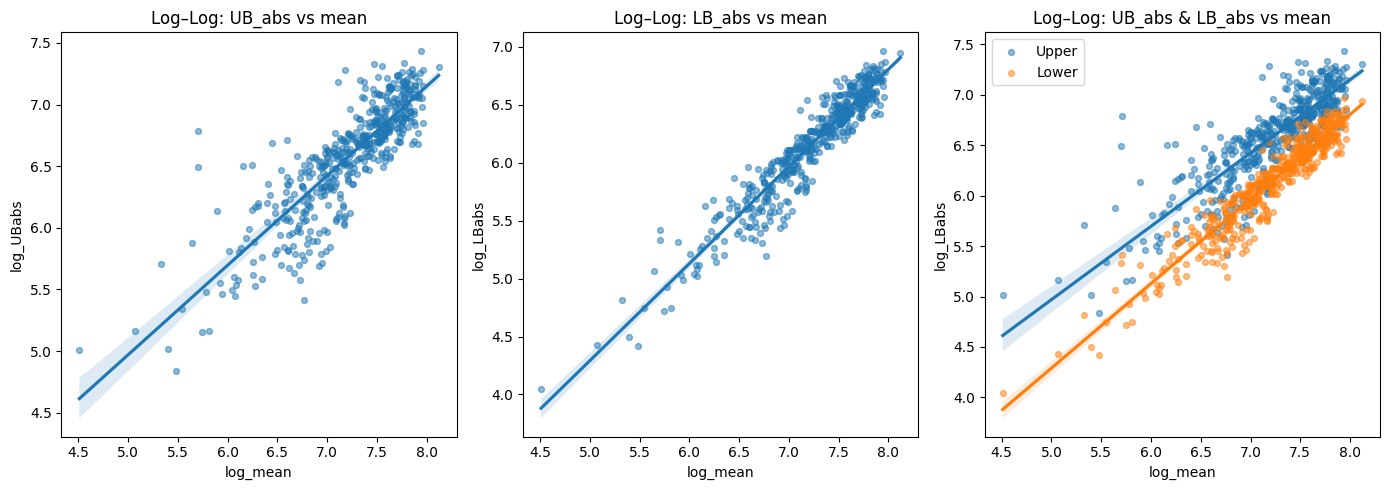

In [ ]:
# (Opcional) dibujar también los scatter en log–log:
fig, axes = plt.subplots(1, 3, figsize=(14,5))

sns.regplot(x="log_mean", y="log_UBabs", data=df_log,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[0])
axes[0].set_title("Log–Log: UB_abs vs mean")

sns.regplot(x="log_mean", y="log_LBabs", data=df_log,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[1])
axes[1].set_title("Log–Log: LB_abs vs mean")

sns.regplot(x="log_mean", y="log_UBabs", data=df_log,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[2], label="Upper")
sns.regplot(x="log_mean", y="log_LBabs", data=df_log,
            scatter_kws={"s":18, "alpha":0.5}, ax=axes[2], label="Lower")
axes[2].set_title("Log–Log: UB_abs & LB_abs vs mean")
plt.legend()

plt.tight_layout(); plt.show()

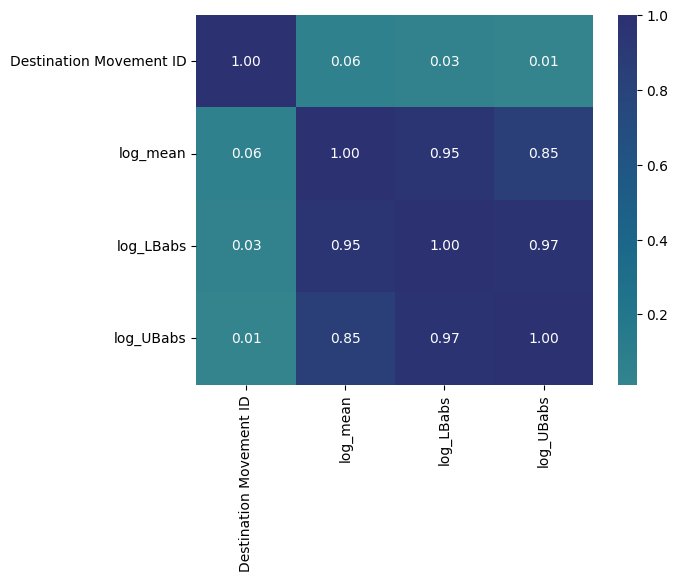

In [ ]:
#plt.figure(figsize=(8, 6))
cPear_log = df_log.select_dtypes("number").corr()
sns.heatmap(cPear_log, annot=True, fmt=".2f", cmap="crest", center=0)
plt.show()

CONCLUSIONES — LOG–LOG Y MATRIZ DE CORRELACIONES EN LOG

1) Escalamiento multiplicativo (ley de potencia).
   En los scatter log–log (log_mean vs. log_LBabs y log_UBabs) ambas curvas quedan casi rectas:
   
   la dispersión absoluta crece proporcionalmente con el tiempo medio:
     
     LB_abs ~ mean^β,  
     UB_abs ~ mean^α.

   Visualmente, el ajuste es muy bueno, especialmente para LB_abs.

2) Cola superior más inestable.
   La nube de UB_abs es más ancha que la de LB_abs incluso en log–log: hay más variabilidad y picos de congestión en la cola superior (llegar tarde) que en la inferior (llegar antes).

3) Correlaciones en log: fuertes y coherentes.
   Del heatmap:
     corr(log_mean, log_LBabs) ≈ 0.95
     corr(log_mean, log_UBabs) ≈ 0.85
     corr(log_LBabs, log_UBabs) ≈ 0.97
   Esto confirma: (i) relación multiplicativa fuerte, (ii) LB se acopla más a la media que UB, y (iii) ambos márgenes crecen casi en proporción (asimetría estable: UB > LB).

4) ID del destino no aporta como número.
   Destination Movement ID está ~no correlacionado con las variables en log (es un identificador categórico, no métrico).

5) Implicación sobre Pearson vs. Spearman (en escala original).
   Que en lineal vieras Spearman > Pearson se explica por curvatura y heterocedasticidad; al pasar a log, la relación se linealiza y las correlaciones suben (sobre todo para LB). -eso no subio, se matuvo casi igual, eso si, si dieron rectas, pero siento yo, es esperable que dieran rectas pues que tal si son mean^1 ._.-

6) Para el modelado.
   - Modela la dispersión con link log o trabaja con porcentuales (LB_pct, UB_pct) para estabilizar varianza.
   - Si ajustas regresiones, considera WLS/robust y variables exógenas que capturen congestión (clima, red vial).

Resumen ejecutivo:
La variabilidad de los tiempos de viaje escala multiplicativamente con la duración del trayecto; la cola superior (demoras) es sistemáticamente más volátil que la inferior, y esa asimetría se mantiene estable a lo largo de destinos.

En log–log, las relaciones se vuelven casi lineales (corrs 0.95 y 0.85), lo que respalda usar transformaciones log o métricas relativas en el análisis y el modelado.


In [ ]:
Log-escala (quita efectos de escala): mira
$S_\log = \log(\text{UB})-\log(\text{LB})$ vs. $\log(\text{mean})$.
Si $S_\log$ es ~constante, la dispersión es principalmente multiplicativa; si decrece con $\log(\text{mean})$, hay una componente aditiva potente
 (lo que sospechamos).

Define dispersión robusta:


spread_abs = upper - lower


spread_pct = (upper - lower) / mean


asym = (upper - mean) - (mean - lower) y su versión /mean




entonces nada aca acaba el cheat sheet que fue como lo que ya habia hecho, pero igual no entendia muy bien y que termine expandiendo a lo que presente, me lata mirar igual lo de S_log........... y nada, ojala poder dedicar mas tiempo y depronto ver si puedo sacar algo mas de J, pero me cogio el dia, la conclusion de esto es ¿porque se hizo todo esto?

### Conclusiones generales del proque se profundizo tanto en esto:



se hizo para demostrar como apartir del error uno no necesariamente quita avriables de un experiemnto para hacerlo mas puro sino que aca en ML puede dar pie a reconocer la naturaleza fenomenologica del modelo y reconocer variables importantes, pille que gracias a lo que observamos si no tuviesemos el paper que nos dice que exactamente poner sabriamos que
- el id de detino no basta, toca hacer la distancia
- el manejo de tiempo podria ser bueno hacerlo en escala logartimica para restarle dificultad al modelo de aprenderse alguna ecuacion o funcion mas compleja (mas facil hacer la regresion alli)
- como lo UB tiene mas peso que LB y dentro de UB tiene mas peso los eventos de gran retraso antes que los de corto, sabemos que debemos empezar por añadir variables que den jutificacion de precisamente retraso y retrasos largos antes que uno de por ejemplo recortes, eso iria despues
- incluso si no nos dicen de que son los datos, sabemos que nuestro fenomeno es multiplicativo que tiene cosas aditivas y de ahi podriamos hacer analogias..... igualmente sabiendo que es de trafico niuestro fenomeno, entonces nos podemos hacer una idea del trafico de la zona, si los eventos retrasatuvos son mas multiplicativos que aditivos y eso que significa y eso como lo podriamos modelar o etc (nos da mas vision de lo que tenemos para luego modelarlo)

1. Por qué todo este análisis sí sirve para proponer un modelo de ML

---

De lo que encontraste se desprenden varias cosas muy útiles:

1. Fenomenología multiplicativa + aditiva (A + C·mean^α + J)

* Ver que LB, UB y mean están casi en relaciones de potencia muy limpias y que los errores absolutos crecen sublinealmente (a ∈ (0,1)) te dice:

  “El fenómeno no es puramente lineal, pero en log–log sí se ve bastante lineal.”

* Eso justifica dos cosas:

  1. Trabajar con features logarítmicas (por ejemplo, log(distancia), log(mean_tt)) para que modelos lineales/árboles tengan la vida más fácil.

  2. Considerar modelos en log del objetivo: predecir log(tiempo de viaje) en lugar del tiempo bruto, para que la relación sea más lineal y la varianza sea más homogénea.

2. El “id de destino no basta, toca la distancia”

* El hecho de que casi todo se organice en una curva suave mean_tt vs LB/UB sugiere que hay una estructura física muy fuerte (distancia + tipo de vía) por debajo.
* Si solo metes “Destination ID” como categórica, estás forzando al modelo a aprender desde cero esa estructura geométrica.
* Tus hallazgos justifican decir en la propuesta:

  “Dado que las cotas LB/UB y el tiempo medio siguen patrones de potencia con la longitud del viaje, es natural incorporar variables de distancia/longitud de ruta y tratarlas quizá en escala logarítmica, en lugar de depender únicamente de IDs categóricos.”

---

2. Cómo esto alimenta un modelo de regresión / WLS / robust

---

2.1. Heterocedasticidad y pesos (WLS)

De tus fits:

* LB_abs ~ k_L · mean^(a_L)
* UB_abs ~ k_U · mean^(a_U)

con a_L, a_U ∈ (0,1).

Interpretando muy en bruto: el tamaño típico del error absoluto escala como mean^a.

Si asumes que la desviación estándar del ruido σ(mean) es proporcional a ese tamaño típico, entonces:

* σ(mean) ∝ mean^a
* Var(e | mean) ∝ mean^(2a).

Entonces, para Weighted Least Squares podrías proponer pesos tipo:

* w(mean) ∝ 1 / mean^(2a)

(o alguna aproximación gruesa usando el a que viste en los log–log).

Traducción práctica:

* Viajes largos tienen errores absolutos mayores → si quieres que todos los niveles de mean_tt aporten parecido en términos de información, los viajes largos deben ir con menor peso en la función de pérdida (porque su varianza es mayor).
* Esto sale directamente de tu análisis log–log; no es un invento arbitrario de pesos, sino que puedes justificarlo con las curvas que ya mostraste.

Si vas a hacer ML con un modelo lineal (o tipo GLM), esto es oro para argumentar una regresión heterocedástica:

“Observamos que el error crece sublinealmente con el tiempo promedio, luego usamos WLS con pesos función de mean^(-2a).”

2.2. Por qué el log ayuda (objetivo o features)

Por lo que encontraste:

* En escala original, los errores son heterocedásticos (abanicos que se abren con mean_tt).
* En escala log–log, la nube se aplasta y la relación se vuelve mucho más lineal.

Eso se traduce así:

1. Si predices log-tiempo

* Sea Y = log(tiempo).
* Si el verdadero proceso es algo como tiempo ≈ k · mean^a · exp(ε),
  entonces log(tiempo) ≈ log k + a · log(mean) + ε, con un ε mucho más homogéneo.
* Eso se adapta perfecto a regresión lineal, regresión ridge/LASSO, o como capa final de una red.

2. Si log-transformas ciertas variables de entrada

* Por ejemplo, tiempo histórico, distancia o alguna proxy de “longitud de ruta”.
* Esto permite que el modelo aprenda algo muy cercano a x ↦ x^a con un solo coeficiente, en vez de tener que aproximar la potencia vía combinaciones raras.

Con esto puedes decir en tu informe:

“El análisis en escala log–log muestra relaciones casi lineales entre el tiempo medio y las cotas LB/UB, así como un crecimiento sublineal de los errores absolutos. Esto motiva el uso de transformaciones logarítmicas tanto en variables explicativas como en el objetivo, para simplificar la estructura funcional y mitigar la heterocedasticidad.”

---

3. Qué aporta la distinción “retraso grande/pequeño” y “recorte grande/pequeño”

---

Tu idea de mirar puntos por encima/detrás de la curva ajustada se puede traducir directamente a decisiones de modelado:

1. Definir etiquetas fenomenológicas a partir del ajuste

Por ejemplo, sobre UB_abs:

* retraso pequeño: UB_abs ≤ k_U · mean^(a_U)
* retraso grande: UB_abs > k_U · mean^(a_U)

Y análogo para LB_abs (recorte pequeño/grande).

Eso te permite:

* Ver en qué rangos de mean_tt se concentran los retrasos grandes (¿más en Q2–Q3, Q4?).
* Ver si están más asociados a ciertos destinos, horarios, etc.

Aunque no llegues a entrenar un modelo aparte, ya te da una narrativa:

“La cola de retrasos grandes no es ruido blanco: se vuelve más probable a partir de cierto régimen de tiempos de viaje y afecta principalmente la cota UB.”

2. Motivar modelos “mixtos” o pérdidas robustas

Si ves que:

* el 80–90 % de los puntos están cerca de la curva de potencia,
* pero un 10–20 % son retrasos grandes que se disparan,

eso es literalmente el escenario clásico para:

* usar una pérdida robusta (Huber, Tukey, etc.) que no deje que los retrasos grandes dominen el ajuste del “caso típico”, o
* usar una combinación de modelos: uno para el régimen normal y otro (por ejemplo, un modelo de probabilidad de incidente) para J.

Entonces, tus “retraso grande vs pequeño” no son solo etiquetas bonitas:
sirven para justificar por qué una MSE simple (OLS puro) no es ideal y por qué introducir robustez / dos fases tiene sentido.


## **DataSet, inciamos la hibridacion i,e a añadir cosas i,e a unir lo de Kaggle con otros DataSets**